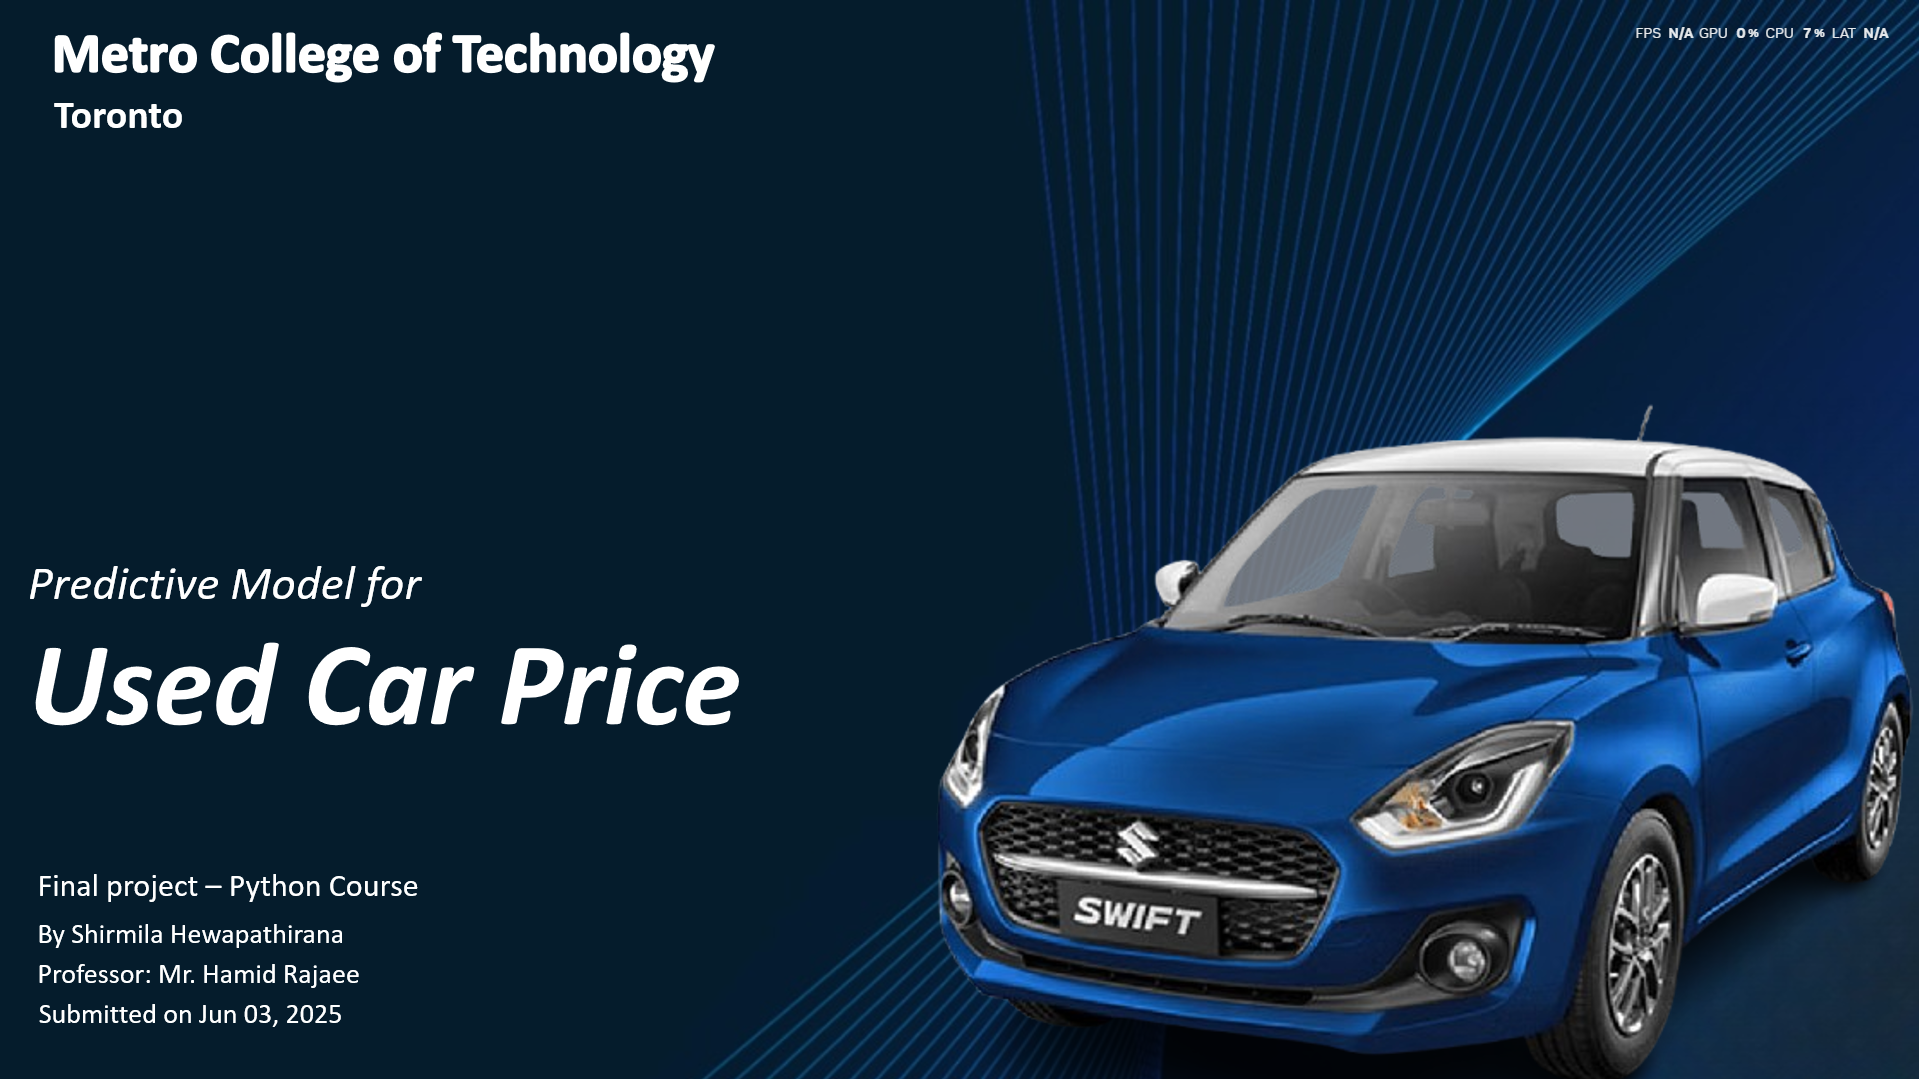

### Import Libraries

In [1]:
import os
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import shap
import xgboost as xgb
import warnings
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import PartialDependenceDisplay
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse
from sklearn import set_config
from statsmodels.stats.outliers_influence import variance_inflation_factor

warnings.filterwarnings('ignore')
shap.initjs()
set_config(transform_output="pandas")

### change directory

In [2]:
os.chdir(r'C:\Users\shirm\Data_Science\pythonCapstoneProj')
os.getcwd()

'C:\\Users\\shirm\\Data_Science\\pythonCapstoneProj'

### Import dataset

In [3]:
df = pd.read_csv('usedCarPriceRegression.csv')
df.shape

(7253, 14)

### Dictionary of features

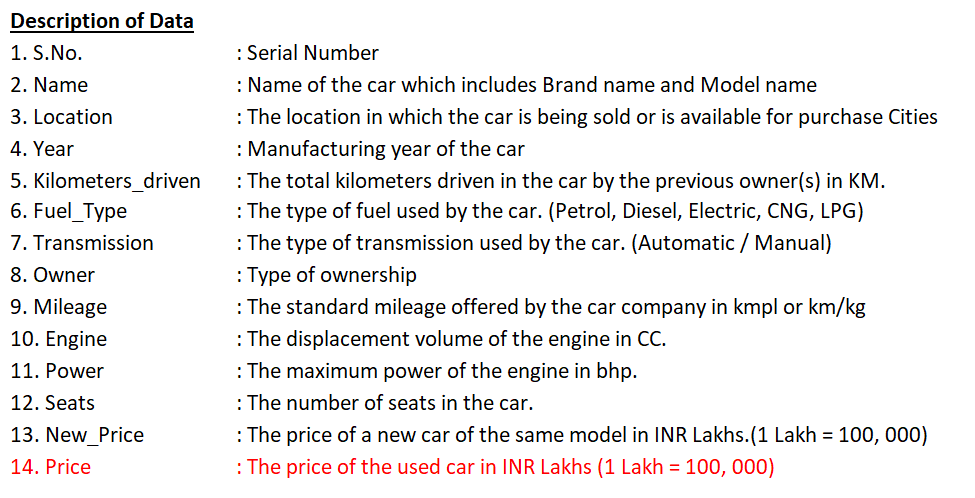

### Check head & tail of data

In [4]:
df.head()

S.No.                              Name    Location  Year  \
0      0            Maruti Wagon R LXI CNG      Mumbai  2010   
1      1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2      2                      Honda Jazz V     Chennai  2011   
3      3                 Maruti Ertiga VDI     Chennai  2012   
4      4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage   Engine  \
0              72000       CNG       Manual      First  26.6 km/kg   998 CC   
1              41000    Diesel       Manual      First  19.67 kmpl  1582 CC   
2              46000    Petrol       Manual      First   18.2 kmpl  1199 CC   
3              87000    Diesel       Manual      First  20.77 kmpl  1248 CC   
4              40670    Diesel    Automatic     Second   15.2 kmpl  1968 CC   

       Power  Seats  New_Price  Price  
0  58.16 bhp    5.0        NaN   1.75  
1  126.2 bhp    5.0        NaN  12.50  
2   88.7 bhp    5.0  8.61 Lakh   4.50  
3  88.76 bhp    7.0        NaN   6.00  
4  140.8 bhp    5.0        NaN  17.74

In [5]:
df.head()

S.No.                              Name    Location  Year  \
0      0            Maruti Wagon R LXI CNG      Mumbai  2010   
1      1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2      2                      Honda Jazz V     Chennai  2011   
3      3                 Maruti Ertiga VDI     Chennai  2012   
4      4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage   Engine  \
0              72000       CNG       Manual      First  26.6 km/kg   998 CC   
1              41000    Diesel       Manual      First  19.67 kmpl  1582 CC   
2              46000    Petrol       Manual      First   18.2 kmpl  1199 CC   
3              87000    Diesel       Manual      First  20.77 kmpl  1248 CC   
4              40670    Diesel    Automatic     Second   15.2 kmpl  1968 CC   

       Power  Seats  New_Price  Price  
0  58.16 bhp    5.0        NaN   1.75  
1  126.2 bhp    5.0        NaN  12.50  
2   88.7 bhp    5.0  8.61 Lakh   4.50  
3  88.76 bhp    7.0        NaN   6.00  
4  140.8 bhp    5.0        NaN  17.74

### Check a sample of the dataset

In [6]:
df.sample(10)

S.No.                                       Name    Location  Year  \
1904   1904  Mercedes-Benz New C-Class 250 CDI Classic   Hyderabad  2012   
4440   4440                Hyundai Verna 1.6 CRDi AT S     Chennai  2016   
2845   2845                     Hyundai i20 Sportz 1.2     Kolkata  2013   
5692   5692    Mercedes-Benz S Class 2005 2013 S 300 L        Pune  2013   
3028   3028         Ford Endeavour 3.2 Titanium AT 4X4  Coimbatore  2017   
1344   1344   Toyota Corolla Altis 2008-2013 1.8 VL AT      Mumbai  2008   
3836   3836                     Audi A6 35 TFSI Matrix       Delhi  2018   
1869   1869               Skoda Rapid 1.6 MPI Elegance   Hyderabad  2014   
4732   4732                           Honda Brio VX AT        Pune  2016   
2319   2319              Mercedes-Benz E-Class E 350 d  Coimbatore  2019   

      Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage  \
1904              41367    Diesel    Automatic      First   15.8 kmpl   
4440              33000    Diesel    Automatic      First  19.08 kmpl   
2845              40300    Petrol       Manual      First   18.5 kmpl   
5692              80000    Petrol    Automatic      First   13.0 kmpl   
3028              61108    Diesel    Automatic      First  10.91 kmpl   
1344              78000    Petrol    Automatic     Second  14.53 kmpl   
3836              22000    Petrol    Automatic      First  15.26 kmpl   
1869              56000    Petrol       Manual      First   15.0 kmpl   
4732              32198    Petrol    Automatic      First   16.5 kmpl   
2319               9312    Diesel    Automatic      First   18.0 kmpl   

       Engine       Power  Seats   New_Price  Price  
1904  2148 CC     170 bhp    5.0         NaN  18.49  
4440  1582 CC   126.2 bhp    5.0         NaN   8.70  
2845  1197 CC   82.85 bhp    5.0         NaN   2.80  
5692  2987 CC     210 bhp    5.0         NaN  25.00  
3028  3198 CC     197 bhp    7.0         NaN  28.88  
1344  1794 CC   138.1 bhp    5.0         NaN   3.41  
3836  1798 CC  187.74 bhp    5.0  56.97 Lakh  41.50  
1869  1598 CC  103.52 bhp    5.0         NaN   7.00  
4732  1198 CC    86.8 bhp    5.0         NaN   5.10  
2319  2987 CC     258 bhp    5.0   92.5 Lakh  78.80

### Check data types of varibles

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7170 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


#### Check unique levels of features in detail

In [8]:
for col in df.columns:
    print (f'\nFrequency of levels for {col} column')
    print('='*(len(col)+31))
    print(df[col].value_counts())


Frequency of levels for S.No. column
S.No.
0       1
4818    1
4844    1
4843    1
4842    1
       ..
2413    1
2412    1
2411    1
2410    1
7252    1
Name: count, Length: 7253, dtype: int64

Frequency of levels for Name column
Name
Mahindra XUV500 W8 2WD                  55
Maruti Swift VDI                        49
Maruti Swift Dzire VDI                  42
Honda City 1.5 S MT                     39
Maruti Swift VDI BSIV                   37
                                        ..
Chevrolet Beat LT Option                 1
Skoda Rapid 1.6 MPI AT Elegance Plus     1
Ford EcoSport 1.5 TDCi Ambiente          1
Hyundai i10 Magna 1.1 iTech SE           1
Hyundai Elite i20 Magna Plus             1
Name: count, Length: 2041, dtype: int64

Frequency of levels for Location column
Location
Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Nam

### Checking Missing values

In [9]:
df.isna().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                83
Engine                 46
Power                 175
Seats                  53
New_Price            6247
Price                1234
dtype: int64

#### Calculatin no. of missing values for each column and it's percentage 

In [10]:
def percentage_of_miss():
  df1=df[df.columns[df.isnull().sum()>=1]]# I get a subset of data that contain columns that have at least one missing values
  total_miss = df1.isnull().sum().sort_values(ascending=False)
  percent_miss = (df1.isnull().sum()/df.shape[0]).sort_values(ascending=False).round(2)

  missing_data = pd.concat([total_miss, percent_miss], axis=1, keys=['Number of Missing', 'Percentage'])
  return(missing_data)

percentage_of_miss()

Number of Missing  Percentage
New_Price               6247        0.86
Price                   1234        0.17
Power                    175        0.02
Mileage                   83        0.01
Seats                     53        0.01
Engine                    46        0.01

### Check duplicated values

In [11]:
df.duplicated().sum()

0

### Check descriptive statistics of the dataset

In [12]:
df.describe().T

count          mean           std      min      25%  \
S.No.              7253.0   3626.000000   2093.905084     0.00   1813.0   
Year               7253.0   2013.365366      3.254421  1996.00   2011.0   
Kilometers_Driven  7253.0  58699.063146  84427.720583   171.00  34000.0   
Seats              7200.0      5.279722      0.811660     0.00      5.0   
Price              6019.0      9.479468     11.187917     0.44      3.5   

                        50%       75%        max  
S.No.               3626.00   5439.00     7252.0  
Year                2014.00   2016.00     2019.0  
Kilometers_Driven  53416.00  73000.00  6500000.0  
Seats                  5.00      5.00       10.0  
Price                  5.64      9.95      160.0

In [13]:
df.describe(include='all').T

count unique                     top  freq          mean  \
S.No.              7253.0    NaN                     NaN   NaN        3626.0   
Name                 7253   2041  Mahindra XUV500 W8 2WD    55           NaN   
Location             7253     11                  Mumbai   949           NaN   
Year               7253.0    NaN                     NaN   NaN   2013.365366   
Kilometers_Driven  7253.0    NaN                     NaN   NaN  58699.063146   
Fuel_Type            7253      5                  Diesel  3852           NaN   
Transmission         7253      2                  Manual  5204           NaN   
Owner_Type           7253      4                   First  5952           NaN   
Mileage              7170    449               17.0 kmpl   207           NaN   
Engine               7207    150                 1197 CC   732           NaN   
Power                7078    385                  74 bhp   280           NaN   
Seats              7200.0    NaN                     NaN   NaN      5.279722   
New_Price            1006    625              63.71 Lakh     6           NaN   
Price              6019.0    NaN                     NaN   NaN      9.479468   

                            std     min      25%      50%      75%        max  
S.No.               2093.905084     0.0   1813.0   3626.0   5439.0     7252.0  
Name                        NaN     NaN      NaN      NaN      NaN        NaN  
Location                    NaN     NaN      NaN      NaN      NaN        NaN  
Year                   3.254421  1996.0   2011.0   2014.0   2016.0     2019.0  
Kilometers_Driven  84427.720583   171.0  34000.0  53416.0  73000.0  6500000.0  
Fuel_Type                   NaN     NaN      NaN      NaN      NaN        NaN  
Transmission                NaN     NaN      NaN      NaN      NaN        NaN  
Owner_Type                  NaN     NaN      NaN      NaN      NaN        NaN  
Mileage                     NaN     NaN      NaN      NaN      NaN        NaN  
Engine                      NaN     NaN      NaN      NaN      NaN        NaN  
Power                       NaN     NaN      NaN      NaN      NaN        NaN  
Seats                   0.81166     0.0      5.0      5.0      5.0       10.0  
New_Price                   NaN     NaN      NaN      NaN      NaN        NaN  
Price                 11.187917    0.44      3.5     5.64     9.95      160.0

In [14]:
df.describe(include='object').T

count unique                     top  freq
Name          7253   2041  Mahindra XUV500 W8 2WD    55
Location      7253     11                  Mumbai   949
Fuel_Type     7253      5                  Diesel  3852
Transmission  7253      2                  Manual  5204
Owner_Type    7253      4                   First  5952
Mileage       7170    449               17.0 kmpl   207
Engine        7207    150                 1197 CC   732
Power         7078    385                  74 bhp   280
New_Price     1006    625              63.71 Lakh     6

### Observations
- As noted above, 'S.No' is not important for the analysis. We can drop it 
- A feature with 86% missing value is worthless for any analysis. We need to drop 'New_Price'
- 17% of data is missing in 'Price' which is the target. We need to investigate this.
- 53 of 'Seats' is missing and in the market, number of seats is one of the key features in deciding car price.
- 'Power' has 175 missing values.
- 'Engine' has 46 missing values.
- 'Milage' is having 83 missing values.
- Maximum car being sold have fuel type as Diesel.
- Mumbai has highest numbers of car availabe for purchase.
- 5204 vehicles with Manual transmission are available for purchase.
- Most of the cars are 5 seaters and First owned.
- Years of car ranges form 1996- 2019
- 'Mileage', 'Engine', 'Power' fetures are recognized as object type due to the unit assigned to it. We need to rectify this

### Preprocessing Data

In [15]:
df.drop(columns=['S.No.', 'New_Price'], axis=1, inplace=True)
df.head()

Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type     Mileage   Engine      Power  Seats  \
0       CNG       Manual      First  26.6 km/kg   998 CC  58.16 bhp    5.0   
1    Diesel       Manual      First  19.67 kmpl  1582 CC  126.2 bhp    5.0   
2    Petrol       Manual      First   18.2 kmpl  1199 CC   88.7 bhp    5.0   
3    Diesel       Manual      First  20.77 kmpl  1248 CC  88.76 bhp    7.0   
4    Diesel    Automatic     Second   15.2 kmpl  1968 CC  140.8 bhp    5.0   

   Price  
0   1.75  
1  12.50  
2   4.50  
3   6.00  
4  17.74

In [16]:
df[['Engine','Power','Mileage']].head(5)

Engine      Power     Mileage
0   998 CC  58.16 bhp  26.6 km/kg
1  1582 CC  126.2 bhp  19.67 kmpl
2  1199 CC   88.7 bhp   18.2 kmpl
3  1248 CC  88.76 bhp  20.77 kmpl
4  1968 CC  140.8 bhp   15.2 kmpl

### Remove 'bhp' from 'Power' values

In [17]:
df["Power"] = df["Power"].str.rstrip(" bhp")

### Remove 'CC' from 'Engine' values

In [18]:
df["Engine"] = df["Engine"].str.rstrip(" CC")

### Remove 'kmpl' and 'km/kg' from 'Milage' values
For fuel types, mileage for CNG and LPG is measured in km/kg, whereas for other fuel types, it is measured in kmpl. \
Since both units represent distance traveled per unit of fuel, no conversion is required.

In [19]:
df["Mileage"] = df["Mileage"].str.rstrip(" kmpl")
df["Mileage"] = df["Mileage"].str.rstrip(" km/g")

In [20]:
df[['Engine','Power','Mileage']].nunique()

Engine     150
Power      385
Mileage    437
dtype: int64

In [21]:
df[['Engine','Power','Mileage']].isna().sum()

Engine      46
Power      175
Mileage     83
dtype: int64

### seats cannot be 0 so changing it to nan

In [22]:
df.query("Seats == 0.0")['Seats']

3999    0.0
Name: Seats, dtype: float64

In [23]:
# df['Seats'].isna().sum()
df.loc[3999,'Seats'] =np.nan

## Feature Enginering

### converting datatype

In [24]:
df["Fuel_Type"] = df["Fuel_Type"].astype("category")
df["Transmission"] = df["Transmission"].astype("category")
df["Owner_Type"] = df["Owner_Type"].astype("category")
#converting datatype  
df["Mileage"] = df["Mileage"].astype(float)
df["Power"] = df["Power"].astype(float)
df["Engine"]=df["Engine"].astype(float)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               7253 non-null   object  
 1   Location           7253 non-null   object  
 2   Year               7253 non-null   int64   
 3   Kilometers_Driven  7253 non-null   int64   
 4   Fuel_Type          7253 non-null   category
 5   Transmission       7253 non-null   category
 6   Owner_Type         7253 non-null   category
 7   Mileage            7170 non-null   float64 
 8   Engine             7207 non-null   float64 
 9   Power              7078 non-null   float64 
 10  Seats              7199 non-null   float64 
 11  Price              6019 non-null   float64 
dtypes: category(3), float64(5), int64(2), object(2)
memory usage: 531.9+ KB


In [26]:
df.describe().T

count          mean           std      min      25%  \
Year               7253.0   2013.365366      3.254421  1996.00   2011.0   
Kilometers_Driven  7253.0  58699.063146  84427.720583   171.00  34000.0   
Mileage            7170.0     18.346527      4.157910     6.40     15.3   
Engine             7207.0   1616.573470    595.285137    72.00   1198.0   
Power              7078.0    112.765214     53.493553    34.20     75.0   
Seats              7199.0      5.280456      0.809327     2.00      5.0   
Price              6019.0      9.479468     11.187917     0.44      3.5   

                        50%       75%         max  
Year                2014.00   2016.00     2019.00  
Kilometers_Driven  53416.00  73000.00  6500000.00  
Mileage               18.20     21.10       33.54  
Engine              1493.00   1968.00     5998.00  
Power                 94.00    138.10      616.00  
Seats                  5.00      5.00       10.00  
Price                  5.64      9.95      160.00

### With feature 'Year' column we can calculate age of the car.
create a new column 'Ageofcar'

In [27]:
df['Ageofcar']=2025-df['Year']
df.sample(10)

Name    Location  Year  \
4079  Land Rover Range Rover 3.0 Diesel LWB Vogue   Hyderabad  2017   
2452                Hyundai Xcent 1.2 CRDi E Plus      Mumbai  2017   
1190              Hyundai i10 Magna Optional 1.1L     Kolkata  2010   
2789                      Maruti Baleno Delta 1.2  Coimbatore  2018   
1891                        Maruti Swift Ldi BSIV       Delhi  2014   
6987                  Maruti Swift Dzire Vdi BSIV     Chennai  2016   
4855            Skoda Octavia Elegance 2.0 TDI AT   Hyderabad  2014   
660    Toyota Innova 2.5 ZX Diesel 7 Seater BSIII      Mumbai  2014   
44               Hyundai Elantra 2.0 SX Option AT   Bangalore  2014   
4431                         Hyundai EON Era Plus       Kochi  2013   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
4079              25000    Diesel    Automatic      First    13.33  2993.0   
2452              69000    Diesel       Manual      First    25.40  1186.0   
1190              27089    Petrol       Manual      First    16.00  1086.0   
2789              25093    Petrol       Manual      First    21.40  1197.0   
1891              62000    Diesel       Manual      First    17.80  1248.0   
6987              90000    Diesel       Manual      First    19.30  1248.0   
4855              36000    Diesel    Automatic      First    19.30  1968.0   
660               35000    Diesel       Manual      First    12.99  2494.0   
44                46374    Petrol    Automatic      First    14.62  1999.0   
4431              57759    Petrol       Manual      First    21.10   814.0   

       Power  Seats   Price  Ageofcar  
4079  255.00    5.0  160.00         8  
2452   73.97    5.0    3.55         8  
1190   66.70    5.0    1.95        15  
2789   83.10    5.0    7.76         7  
1891   75.00    5.0    3.75        11  
6987   73.90    5.0     NaN         9  
4855  141.00    5.0   16.00        11  
660   100.60    7.0   12.75        11  
44    149.92    5.0    8.85        11  
4431   55.20    5.0    3.84        12

### Since vehicle name includes Make and Model, we can create new features for them

In [28]:
df['Name'].unique()

array(['Maruti Wagon R LXI CNG', 'Hyundai Creta 1.6 CRDi SX Option',
       'Honda Jazz V', ..., 'Ford EcoSport 1.5 Petrol Ambiente',
       'Jeep Compass 1.4 Sport', 'Hyundai Elite i20 Magna Plus'],
      dtype=object)

In [29]:
df['Brand'] = df['Name'].str.split(' ').str[0] #Separating Brand name from the Name
df['Model'] = df['Name'].str.split(' ').str[1] + df['Name'].str.split(' ').str[2]

In [30]:
df.Brand.unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini', 'Hindustan', 'OpelCorsa'], dtype=object)

In [31]:
col=['ISUZU','Isuzu','Mini','Land']
# We need to update these 'makes' as it had part of the brand name as second word in the name column
df[df.Brand.isin(col)].sample(5)

Name    Location  Year  \
4466                  Land Rover Freelander 2 SE       Kochi  2014   
1568       Land Rover Discovery Sport TD4 HSE 7S      Mumbai  2017   
2139  Land Rover Range Rover Evoque 2.0 TD4 Pure       Kochi  2016   
410             Land Rover Range Rover 2.2L Pure  Coimbatore  2014   
365                        Mini Clubman Cooper S        Pune  2017   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
4466              61730    Diesel    Automatic      First    12.39  2179.0   
1568              40000    Diesel    Automatic      First    12.81  1999.0   
2139              29022    Diesel    Automatic     Second    15.68  1999.0   
410               95649    Diesel    Automatic      First    12.70  2179.0   
365                8350    Petrol       Manual      First    13.80  1998.0   

       Power  Seats  Price  Ageofcar Brand            Model  
4466  147.51    5.0  19.94        11  Land  RoverFreelander  
1568  148.31    7.0  41.50         8  Land   RoverDiscovery  
2139  177.00    5.0  34.08         9  Land       RoverRange  
410   187.70    5.0  29.67        11  Land       RoverRange  
365   192.00    5.0  35.00         8  Mini    ClubmanCooper

In [32]:
#Updating above 
df.loc[df.Brand == 'ISUZU','Brand']='Isuzu'
df.loc[df.Brand=='Mini','Brand']='Mini Cooper'
df.loc[df.Brand=='Land','Brand']='Land Rover'
#cars['Brand']=cars["Brand"].astype("category")

In [33]:
df.Brand.nunique()

32

In [34]:
df.groupby(df.Brand).size().sort_values(ascending =False)

Brand
Maruti           1444
Hyundai          1340
Honda             743
Toyota            507
Mercedes-Benz     380
Volkswagen        374
Ford              351
Mahindra          331
BMW               312
Audi              285
Tata              228
Skoda             202
Renault           170
Chevrolet         151
Nissan            117
Land Rover         67
Jaguar             48
Fiat               38
Mitsubishi         36
Mini Cooper        31
Volvo              28
Jeep               19
Porsche            19
Datsun             17
Isuzu               5
Force               3
Bentley             2
Lamborghini         1
OpelCorsa           1
Hindustan           1
Smart               1
Ambassador          1
dtype: int64

In [35]:
df.Model.isnull().sum()

1

In [36]:
#drop row with no model
df.dropna(subset=['Model'],axis=0,inplace=True)

In [37]:
df['Model'].nunique()

726

In [38]:
# df['Model'].value_counts()
df.groupby('Model')['Model'].size().nlargest(30)

Model
SwiftDzire      189
Grandi10        179
WagonR          178
Innova2.5       145
Verna1.6        127
City1.5         122
Cityi           115
Creta1.6        110
NewC-Class      110
3Series         109
SwiftVDI         96
5Series          86
i201.2           78
SantroXing       76
XUV500W8         75
i10Sportz        75
AmazeS           69
i10Magna         69
Alto800          63
CorollaAltis     63
FigoDiesel       61
Ecosport1.5      59
A42.0            56
AltoK10          56
VitaraBrezza     55
i20Asta          54
InnovaCrysta     53
i20Sportz        53
Duster110PS      51
Fortuner4x2      50
Name: Model, dtype: int64

# EDA

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7252 entries, 0 to 7252
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               7252 non-null   object  
 1   Location           7252 non-null   object  
 2   Year               7252 non-null   int64   
 3   Kilometers_Driven  7252 non-null   int64   
 4   Fuel_Type          7252 non-null   category
 5   Transmission       7252 non-null   category
 6   Owner_Type         7252 non-null   category
 7   Mileage            7169 non-null   float64 
 8   Engine             7206 non-null   float64 
 9   Power              7077 non-null   float64 
 10  Seats              7198 non-null   float64 
 11  Price              6019 non-null   float64 
 12  Ageofcar           7252 non-null   int64   
 13  Brand              7252 non-null   object  
 14  Model              7252 non-null   object  
dtypes: category(3), float64(5), int64(3), object(4)
memory usage

### The statistical summary of the dataset

In [40]:
df.describe()

Year  Kilometers_Driven      Mileage       Engine        Power  \
count  7252.000000       7.252000e+03  7169.000000  7206.000000  7077.000000   
mean   2013.366520       5.870026e+04    18.347106  1616.605051   112.768713   
std       3.253162       8.443348e+04     4.157912   595.320408    53.496523   
min    1996.000000       1.710000e+02     6.400000    72.000000    34.200000   
25%    2011.000000       3.400000e+04    15.300000  1198.000000    75.000000   
50%    2014.000000       5.342900e+04    18.200000  1493.000000    94.000000   
75%    2016.000000       7.300000e+04    21.100000  1968.000000   138.100000   
max    2019.000000       6.500000e+06    33.540000  5998.000000   616.000000   

             Seats        Price     Ageofcar  
count  7198.000000  6019.000000  7252.000000  
mean      5.280495     9.479468    11.633480  
std       0.809376    11.187917     3.253162  
min       2.000000     0.440000     6.000000  
25%       5.000000     3.500000     9.000000  
50%       5.000000     5.640000    11.000000  
75%       5.000000     9.950000    14.000000  
max      10.000000   160.000000    29.000000

### Finding unique values

In [41]:
df.describe(include='all').T

count unique                     top  freq          mean  \
Name                 7252   2040  Mahindra XUV500 W8 2WD    55           NaN   
Location             7252     11                  Mumbai   949           NaN   
Year               7252.0    NaN                     NaN   NaN    2013.36652   
Kilometers_Driven  7252.0    NaN                     NaN   NaN  58700.262686   
Fuel_Type            7252      5                  Diesel  3852           NaN   
Transmission         7252      2                  Manual  5203           NaN   
Owner_Type           7252      4                   First  5952           NaN   
Mileage            7169.0    NaN                     NaN   NaN     18.347106   
Engine             7206.0    NaN                     NaN   NaN   1616.605051   
Power              7077.0    NaN                     NaN   NaN    112.768713   
Seats              7198.0    NaN                     NaN   NaN      5.280495   
Price              6019.0    NaN                     NaN   NaN      9.479468   
Ageofcar           7252.0    NaN                     NaN   NaN      11.63348   
Brand                7252     31                  Maruti  1444           NaN   
Model                7252    726              SwiftDzire   189           NaN   

                           std     min      25%      50%      75%        max  
Name                       NaN     NaN      NaN      NaN      NaN        NaN  
Location                   NaN     NaN      NaN      NaN      NaN        NaN  
Year                  3.253162  1996.0   2011.0   2014.0   2016.0     2019.0  
Kilometers_Driven  84433.48037   171.0  34000.0  53429.0  73000.0  6500000.0  
Fuel_Type                  NaN     NaN      NaN      NaN      NaN        NaN  
Transmission               NaN     NaN      NaN      NaN      NaN        NaN  
Owner_Type                 NaN     NaN      NaN      NaN      NaN        NaN  
Mileage               4.157912     6.4     15.3     18.2     21.1      33.54  
Engine              595.320408    72.0   1198.0   1493.0   1968.0     5998.0  
Power                53.496523    34.2     75.0     94.0    138.1      616.0  
Seats                 0.809376     2.0      5.0      5.0      5.0       10.0  
Price                11.187917    0.44      3.5     5.64     9.95      160.0  
Ageofcar              3.253162     6.0      9.0     11.0     14.0       29.0  
Brand                      NaN     NaN      NaN      NaN      NaN        NaN  
Model                      NaN     NaN      NaN      NaN      NaN        NaN

- Years is slightly left skewed (mean<median). Years ranges from 1996- 2019 . Age of cars 6 year old to 29 years old
- Kilometer driven , median is ~53k Km and mean is ~58K. Max values seems to be 6,500 K. This is very high , and seems to be an outlier. Need to analyze further.
- Mileage is almost Normally distrubuited (mean is almost equalto median)
- Engine and power are right skewed (mean>median).
- Price is left skewed.
- Price 160 Lakh is too much for a used car. Seems to be an outlier.
- We need to consider seats as a catogery as it has a limited discrete levels

### check extreme milage veicle

In [42]:
df[df['Kilometers_Driven'] > 6_000_000]

Name Location  Year  Kilometers_Driven Fuel_Type  \
2328  BMW X5 xDrive 30d M Sport  Chennai  2017            6500000    Diesel   

     Transmission Owner_Type  Mileage  Engine  Power  Seats  Price  Ageofcar  \
2328    Automatic      First    15.97  2993.0  258.0    5.0   65.0         8   

     Brand     Model  
2328   BMW  X5xDrive

In [43]:
# Lets drop this as it is an extreme outlier
df = df[~(df['Kilometers_Driven'] > 6_000_000)]

In [44]:
df[df['Kilometers_Driven'] > 6_000_000]

Empty DataFrame
Columns: [Name, Location, Year, Kilometers_Driven, Fuel_Type, Transmission, Owner_Type, Mileage, Engine, Power, Seats, Price, Ageofcar, Brand, Model]
Index: []

### Handling missing values

In [45]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                83
Engine                 46
Power                 175
Seats                  54
Price                1233
Ageofcar                0
Brand                   0
Model                   0
dtype: int64

Lets start with 'Milage', 'Engine' and 'Power' features\
we can treat missing values of these features based on the 'year' and its 'name' (make/model)\
So, best option here is to inpute these missing values with its median values as follows;
- 'Milage' : median by name and year of the vehicle
- 'Engine' : median by name and year of the vehicle
- 'Power'  : median by name and year of the vehicle

In [46]:
df.groupby(['Brand', 'Model', 'Year'])['Engine'].median()

Brand       Model          Year
Ambassador  ClassicNova    2003    1489.0
Audi        A335           2014    1968.0
                           2015    1968.0
                           2016    1968.0
                           2017    1968.0
                                    ...  
Volvo       XC60D5         2011    2400.0
                           2014    2400.0
                           2015    2400.0
            XC902007-2015  2014    2400.0
                           2016    2400.0
Name: Engine, Length: 2353, dtype: float64

In [47]:
# df['Engine']=df.groupby(['Name','Year'])['Engine'].apply(lambda x:x.fillna(x.median()))
df['Engine']=df.groupby(['Brand', 'Model', 'Year'])['Engine'].transform(lambda x:x.fillna(x.median()))

In [48]:
df.groupby(['Brand', 'Model', 'Year'])['Power'].median().head(10)

Brand       Model        Year
Ambassador  ClassicNova  2003     35.50
Audi        A335         2014    143.00
                         2015    143.00
                         2016    143.00
                         2017    143.00
            A41.8        2010    163.20
                         2011    163.20
                         2012    167.62
            A42.0        2009    147.51
                         2010    140.00
Name: Power, dtype: float64

In [49]:
df['Power']=df.groupby(['Brand', 'Model', 'Year'])['Power'].transform(lambda x:x.fillna(x.median()))

In [50]:
df.groupby(['Brand', 'Model', 'Year'])['Mileage'].median().head(10)

Brand       Model        Year
Ambassador  ClassicNova  2003    12.80
Audi        A335         2014    20.38
                         2015    20.38
                         2016    20.38
                         2017    20.38
            A41.8        2010    12.30
                         2011    12.30
                         2012    15.64
            A42.0        2009    16.55
                         2010    16.55
Name: Mileage, dtype: float64

In [51]:
df['Mileage']=df.groupby(['Brand', 'Model', 'Year'])['Mileage'].transform(lambda x:x.fillna(x.median()))

In [52]:
f=['Engine','Power','Mileage']
df[f].isnull().sum()

Engine      28
Power      116
Mileage     41
dtype: int64

we still have missing values.\
Downsize above method and apply. Let's remove year from the logic

In [53]:
df['Engine']=df.groupby(['Brand', 'Model'])['Engine'].transform(lambda x:x.fillna(x.median()))
df['Power']=df.groupby(['Brand', 'Model'])['Power'].transform(lambda x:x.fillna(x.median()))
df['Mileage']=df.groupby(['Brand', 'Model'])['Mileage'].transform(lambda x:x.fillna(x.median()))

In [54]:
f1=['Engine','Power','Mileage']
df[f1].isnull().sum()

Engine     18
Power      63
Mileage    32
dtype: int64

we still have missing values.

In [55]:
df['Engine'] = df.groupby(['Brand', 'Transmission'], observed=True)['Engine'].transform(lambda x: x.fillna(x.median()))
# df['Engine']=df.groupby(['Brand','Transmission'])['Engine'].transform(lambda x:x.fillna(x.median())) # changed as warnig notified

In [56]:
df['Power']=df.groupby(['Brand','Transmission'], observed=True)['Power'].transform(lambda x:x.fillna(x.median()))

In [57]:
df['Mileage']=df.groupby(['Brand','Transmission'], observed=True)['Mileage'].transform(lambda x:x.fillna(x.median()))

In [58]:
col=['Engine','Power','Mileage']
df[col].isnull().sum()

Engine     0
Power      3
Mileage    1
dtype: int64

In [59]:
df['Seats'] = df.groupby(['Brand', 'Model', 'Year'])['Seats'].transform(lambda x: x.fillna(x.median()))
df.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 1
Engine                  0
Power                   3
Seats                  34
Price                1233
Ageofcar                0
Brand                   0
Model                   0
dtype: int64

In [60]:
df['Seats'] = df.groupby(['Model', 'Year'])['Seats'].transform(lambda x: x.fillna(x.median()))
df['Seats'].isna().sum()

34

In [61]:
df['Seats'] = df.groupby(['Model'])['Seats'].transform(lambda x: x.fillna(x.median()))
df['Seats'].isna().sum()

23

In [62]:
df['Seats'] = df['Seats'].fillna(df['Seats'].median())
df['Seats'].isna().sum()

0

In [63]:
df['Mileage'] = df['Mileage'].fillna(df['Mileage'].median())
df['Power'] = df['Power'].fillna(df['Power'].median())


In [64]:
df=df.dropna()

In [65]:
df.isna().sum().sum()

0

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6018 entries, 0 to 6018
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               6018 non-null   object  
 1   Location           6018 non-null   object  
 2   Year               6018 non-null   int64   
 3   Kilometers_Driven  6018 non-null   int64   
 4   Fuel_Type          6018 non-null   category
 5   Transmission       6018 non-null   category
 6   Owner_Type         6018 non-null   category
 7   Mileage            6018 non-null   float64 
 8   Engine             6018 non-null   float64 
 9   Power              6018 non-null   float64 
 10  Seats              6018 non-null   float64 
 11  Price              6018 non-null   float64 
 12  Ageofcar           6018 non-null   int64   
 13  Brand              6018 non-null   object  
 14  Model              6018 non-null   object  
dtypes: category(3), float64(5), int64(3), object(4)
memory usage

In [67]:
df.groupby(['Brand'])['Price'].agg({'median','mean','max'})

median        mean     max
Brand                                     
Ambassador       1.350    1.350000    1.35
Audi            23.500   25.537712   72.94
BMW             21.000   25.093684   93.67
Bentley         59.000   59.000000   59.00
Chevrolet        2.500    3.044463    9.87
Datsun           3.100    3.049231    3.95
Fiat             2.600    3.269286    7.71
Force            8.000    9.333333   12.00
Ford             5.345    6.889400   56.80
Honda            4.950    5.411743   17.50
Hyundai          4.600    5.343433   23.00
Isuzu           16.090   14.696667   20.00
Jaguar          31.900   37.632250  100.00
Jeep            18.500   18.718667   23.91
Lamborghini    120.000  120.000000  120.00
Land Rover      35.000   39.259500  160.00
Mahindra         7.570    8.045919   17.63
Maruti           4.150    4.517267   11.50
Mercedes-Benz   24.000   26.809874   90.00
Mini Cooper     24.285   26.896923   39.75
Mitsubishi       9.950   11.058889   28.00
Nissan           4.300    4.738352    8.92
Porsche         47.020   48.348333   75.00
Renault          5.490    5.799034   14.01
Skoda            6.000    7.559075   27.30
Smart            3.000    3.000000    3.00
Tata             2.900    3.562849   17.85
Toyota          10.750   11.580024   35.82
Volkswagen       4.890    5.307270   24.90
Volvo           18.250   18.802857   32.50

### Based on industry knowledge, let's check how best can we segment vehicles based on the make

In [68]:
df[df.Price>=25].Brand.value_counts()

Brand
Mercedes-Benz    150
BMW              111
Audi             102
Land Rover        42
Jaguar            33
Ford              20
Toyota            17
Porsche           16
Mini Cooper       12
Skoda              3
Mitsubishi         3
Volvo              2
Bentley            1
Lamborghini        1
Name: count, dtype: int64

In [69]:
df[df.Price<25].Brand.value_counts()

Brand
Maruti           1211
Hyundai          1107
Honda             608
Toyota            394
Volkswagen        315
Ford              280
Mahindra          272
Tata              186
Skoda             170
Mercedes-Benz     168
BMW               155
Renault           145
Audi              134
Chevrolet         121
Nissan             91
Fiat               28
Mitsubishi         24
Volvo              19
Land Rover         18
Jeep               15
Mini Cooper        14
Datsun             13
Jaguar              7
Isuzu               3
Force               3
Porsche             2
Smart               1
Ambassador          1
Name: count, dtype: int64

In [70]:
#using business knowledge to create class 
Low=['Maruti', 'Hyundai', 'Ambassador', 'Hindustan', 'Force', 'Chevrolet', 'Fiat', 'Tata', 'Smart', 'Renault', 'Datsun', 'Mahindra', 'Skoda', 'Ford', 'Isuzu']
High=['Audi','Mini Cooper', 'Bentley', 'Mercedes-Benz', 'Lamborghini', 'Volkswagen', 'Porsche', 'Land Rover', 'Nissan', 'Volvo', 'Jeep', 'Jaguar','BMW','Toyota', 'Mitsubishi','Honda']

In [71]:
df['Brand_Class'] = df['Brand'].apply(lambda x: "Low" if x in Low else "High" if x in High else x)

In [72]:
df.head()

Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type  Mileage  Engine   Power  Seats  Price  \
0       CNG       Manual      First    26.60   998.0   58.16    5.0   1.75   
1    Diesel       Manual      First    19.67  1582.0  126.20    5.0  12.50   
2    Petrol       Manual      First    18.20  1199.0   88.70    5.0   4.50   
3    Diesel       Manual      First    20.77  1248.0   88.76    7.0   6.00   
4    Diesel    Automatic     Second    15.20  1968.0  140.80    5.0  17.74   

   Ageofcar    Brand      Model Brand_Class  
0        15   Maruti     WagonR         Low  
1        10  Hyundai   Creta1.6         Low  
2        14    Honda      JazzV        High  
3        13   Maruti  ErtigaVDI         Low  
4        12     Audi      A4New        High

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6018 entries, 0 to 6018
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               6018 non-null   object  
 1   Location           6018 non-null   object  
 2   Year               6018 non-null   int64   
 3   Kilometers_Driven  6018 non-null   int64   
 4   Fuel_Type          6018 non-null   category
 5   Transmission       6018 non-null   category
 6   Owner_Type         6018 non-null   category
 7   Mileage            6018 non-null   float64 
 8   Engine             6018 non-null   float64 
 9   Power              6018 non-null   float64 
 10  Seats              6018 non-null   float64 
 11  Price              6018 non-null   float64 
 12  Ageofcar           6018 non-null   int64   
 13  Brand              6018 non-null   object  
 14  Model              6018 non-null   object  
 15  Brand_Class        6018 non-null   object  
dtypes: category

In [74]:
df[['Brand_Class', 'Model', 'Brand', 'Seats']] = df[['Brand_Class', 'Model', 'Brand', 'Seats']].astype('category')

In [75]:
catFeatures=['Location','Fuel_Type','Transmission', 'Owner_Type', 'Seats', 'Brand', 'Brand_Class'] # name, model not considered due to high frequency
numFeatures = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Price', 'Ageofcar']
print(f'Numerical Features:\n{numFeatures}\n\nCategorical Features:\n{catFeatures}')
# plt.figure(figsize=(20,25))

Numerical Features:
['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Price', 'Ageofcar']

Categorical Features:
['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats', 'Brand', 'Brand_Class']


In [76]:
df[catFeatures].describe().T

count unique     top    freq
Location        6018     11  Mumbai     790
Fuel_Type       6018      5  Diesel    3204
Transmission    6018      2  Manual    4299
Owner_Type      6018      4   First    4928
Seats         6018.0    8.0     5.0  5055.0
Brand           6018     30  Maruti    1211
Brand_Class     6018      2     Low    3564

In [77]:
df[numFeatures].describe().T

count          mean           std      min       25%  \
Year               6018.0   2013.357594      3.269677  1998.00   2011.00   
Kilometers_Driven  6018.0  57668.047690  37878.783175   171.00  34000.00   
Mileage            6018.0     18.315222      4.167398     6.40     15.29   
Engine             6018.0   1619.894068    600.338371    72.00   1198.00   
Power              6018.0    112.612612     53.668956    34.20     74.00   
Price              6018.0      9.470243     11.165926     0.44      3.50   
Ageofcar           6018.0     11.642406      3.269677     6.00      9.00   

                        50%       75%        max  
Year                2014.00   2016.00    2019.00  
Kilometers_Driven  53000.00  73000.00  775000.00  
Mileage               18.19     21.10      33.54  
Engine              1493.00   1984.00    5998.00  
Power                 93.70    138.10     560.00  
Price                  5.64      9.95     160.00  
Ageofcar              11.00     14.00      27.00

### Categorical Features - Univariate

In [78]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd

def plot_catFeatures(catFeatures, df):
    # Sort features by ascending number of unique levels
    sorted_features = sorted(catFeatures, key=lambda x: df[x].nunique())

    for feature in sorted_features:  # Loop through sorted features
        print(f"Value counts for {feature}:\n")
        result = pd.concat([df[feature].value_counts().sort_values(ascending=False),
                            df[feature].value_counts(normalize=True).round(3) * 100], axis=1)
        result.columns = ['Count', 'Percentage (%)']
        print(result.T)

        # Create subplots: Bar chart on the left and Pie chart on the right
        fig, axes = plt.subplots(1, 2, figsize=(14, 6))

        # Bar chart
        ax = sns.countplot(x=df[feature], data=df, hue=df[feature],
                           palette=sns.color_palette("viridis", len(df[feature].unique())), ax=axes[0])
        axes[0].set_title(f'Distribution of "{feature}"')

        # Conditionally rotate x-axis labels
        if df[feature].nunique() > 5:  
            axes[0].tick_params(axis='x', rotation=45)

        # Add values on top of bars
        for bar in ax.patches:
            count = int(bar.get_height())
            percentage = (count / len(df)) * 100
            ax.annotate(f'{count}\n({percentage:.1f}%)',
                        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                        ha='center', va='bottom', fontsize=10)
        ax.set_ylim(0, ax.get_ylim()[1] * 1.03)

        # Pie chart enhancements
        labels = df[feature].value_counts().index.tolist()
        values = df[feature].value_counts()

        # Find the largest category
        largest_category = values.idxmax()
        largest_index = labels.index(largest_category)

        # Explode only the largest slice
        explode = [0.2 if i == largest_index else 0 for i in range(len(labels))]

        wedges, texts, autotexts = axes[1].pie(values, autopct='%1.1f%%', startangle=75,
                                               colors=sns.color_palette("viridis", len(values)),
                                               labels=labels, explode=explode, shadow=True, counterclock=False)

        axes[1].set_title(f'Distribution of "{feature}"')
        axes[1].set_ylabel('')

        # Enhanced legend positioning
        axes[1].legend(labels, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8)

        sns.despine(top=True, right=True)  # Remove side lines from graph
        plt.tight_layout()
        plt.show()
        print("\n")

Value counts for Transmission:

Transmission    Manual  Automatic
Count           4299.0     1719.0
Percentage (%)    71.4       28.6


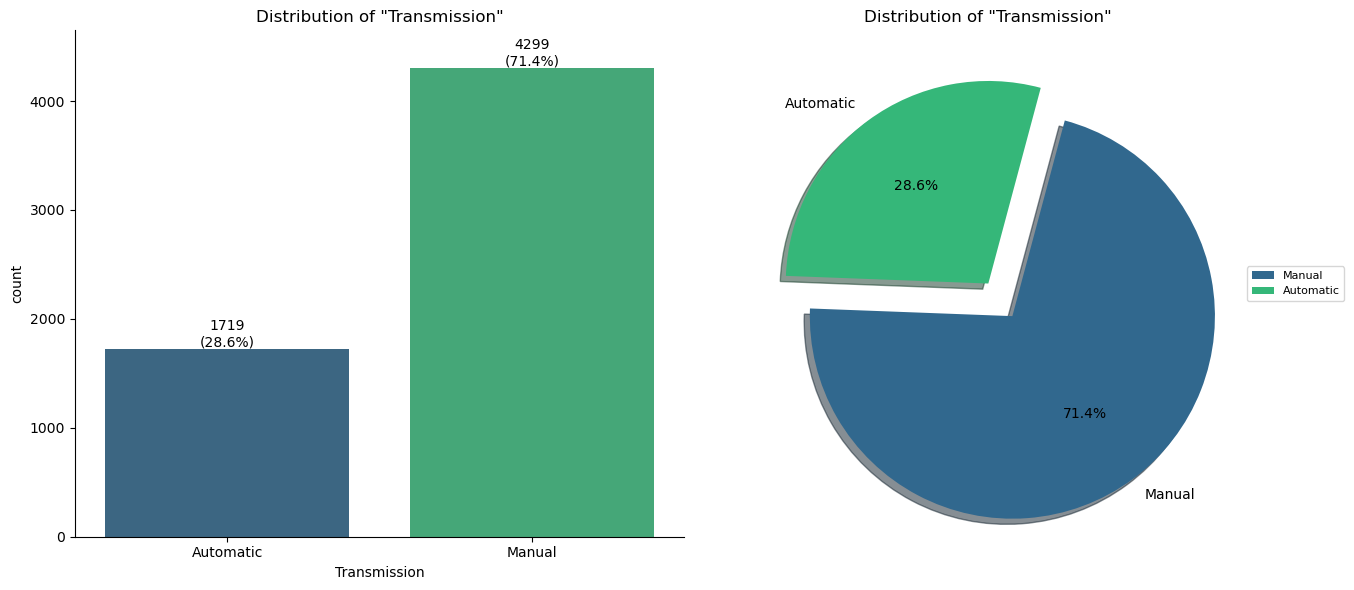



Value counts for Brand_Class:

Brand_Class        Low    High
Count           3564.0  2454.0
Percentage (%)    59.2    40.8


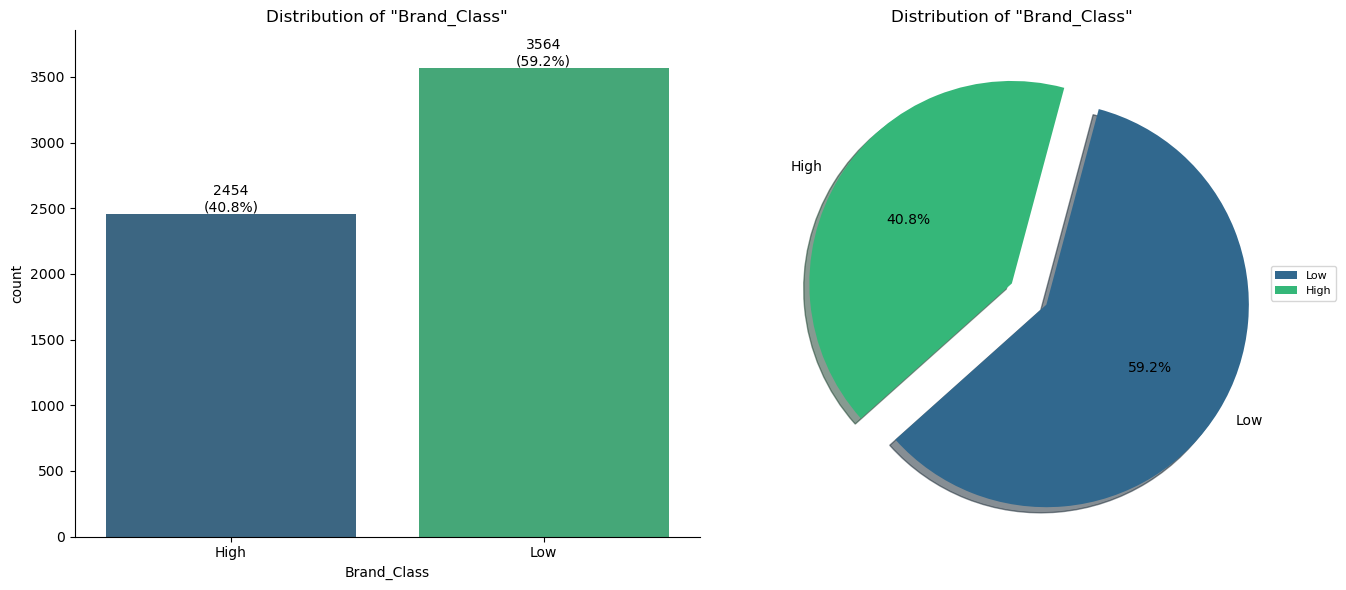



Value counts for Owner_Type:

Owner_Type       First  Second  Third  Fourth & Above
Count           4928.0   968.0  113.0             9.0
Percentage (%)    81.9    16.1    1.9             0.1


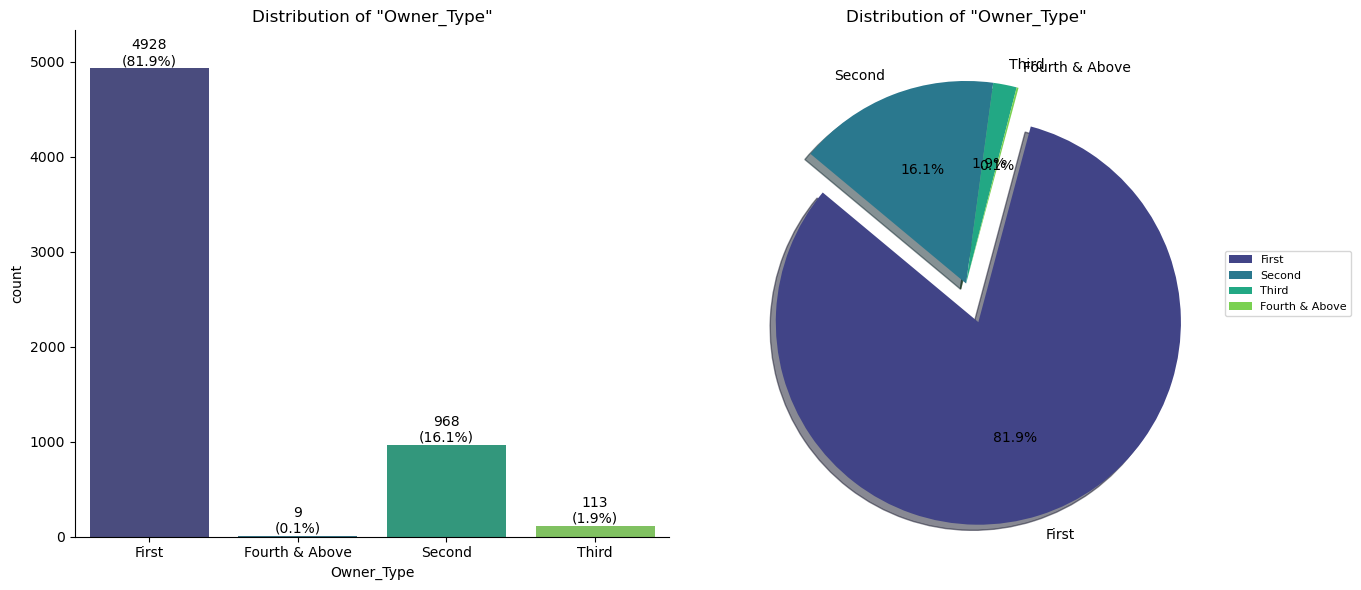



Value counts for Fuel_Type:

Fuel_Type       Diesel  Petrol   CNG   LPG  Electric
Count           3204.0  2746.0  56.0  10.0       2.0
Percentage (%)    53.2    45.6   0.9   0.2       0.0


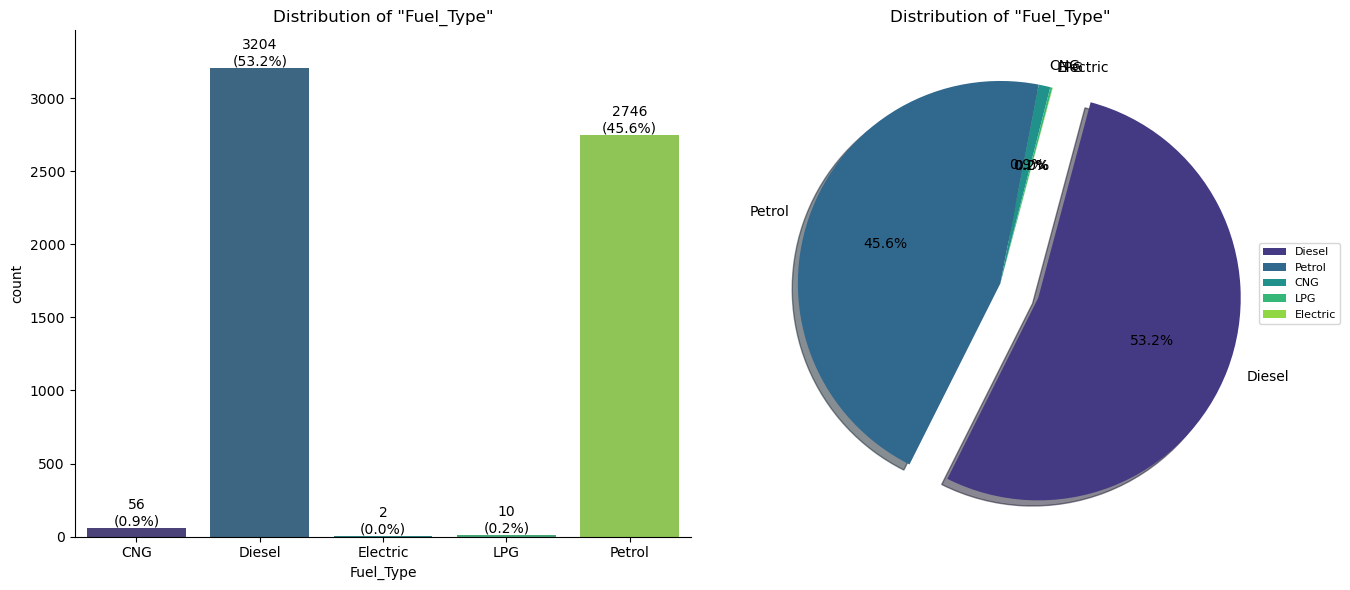



Value counts for Seats:

Seats              5.0    7.0    8.0   4.0   6.0   2.0  10.0  9.0
Count           5055.0  675.0  134.0  99.0  31.0  16.0   5.0  3.0
Percentage (%)    84.0   11.2    2.2   1.6   0.5   0.3   0.1  0.0


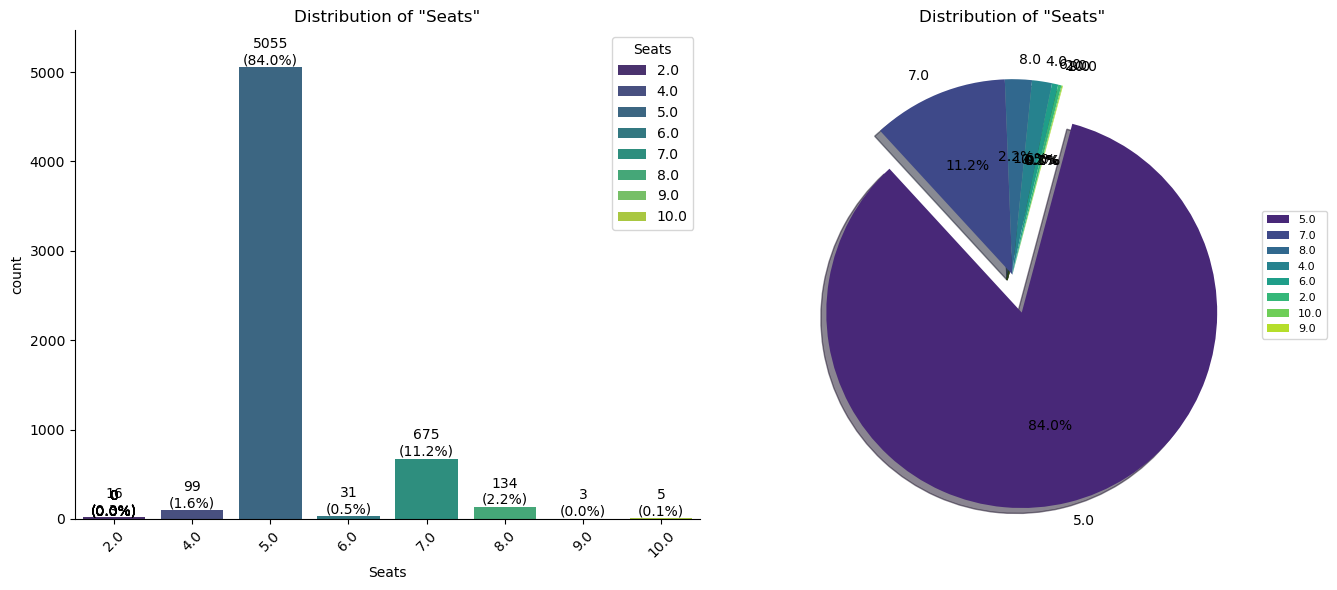



Value counts for Location:

Location        Mumbai  Hyderabad  Kochi  Coimbatore   Pune  Delhi  Kolkata  \
Count            790.0      742.0  651.0       636.0  622.0  554.0    535.0   
Percentage (%)    13.1       12.3   10.8        10.6   10.3    9.2      8.9   

Location        Chennai  Jaipur  Bangalore  Ahmedabad  
Count             493.0   413.0      358.0      224.0  
Percentage (%)      8.2     6.9        5.9        3.7  


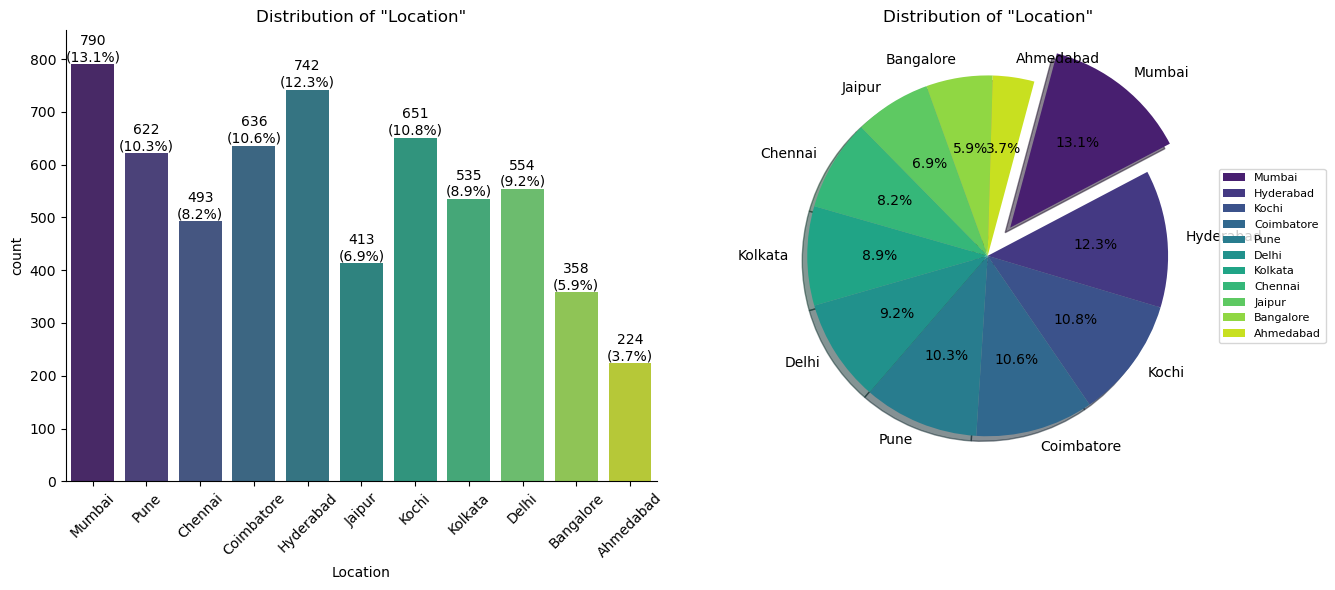

In [79]:
feat = ['Location','Fuel_Type','Transmission', 'Owner_Type', 'Seats', 'Brand_Class']
plot_catFeatures(feat, df)

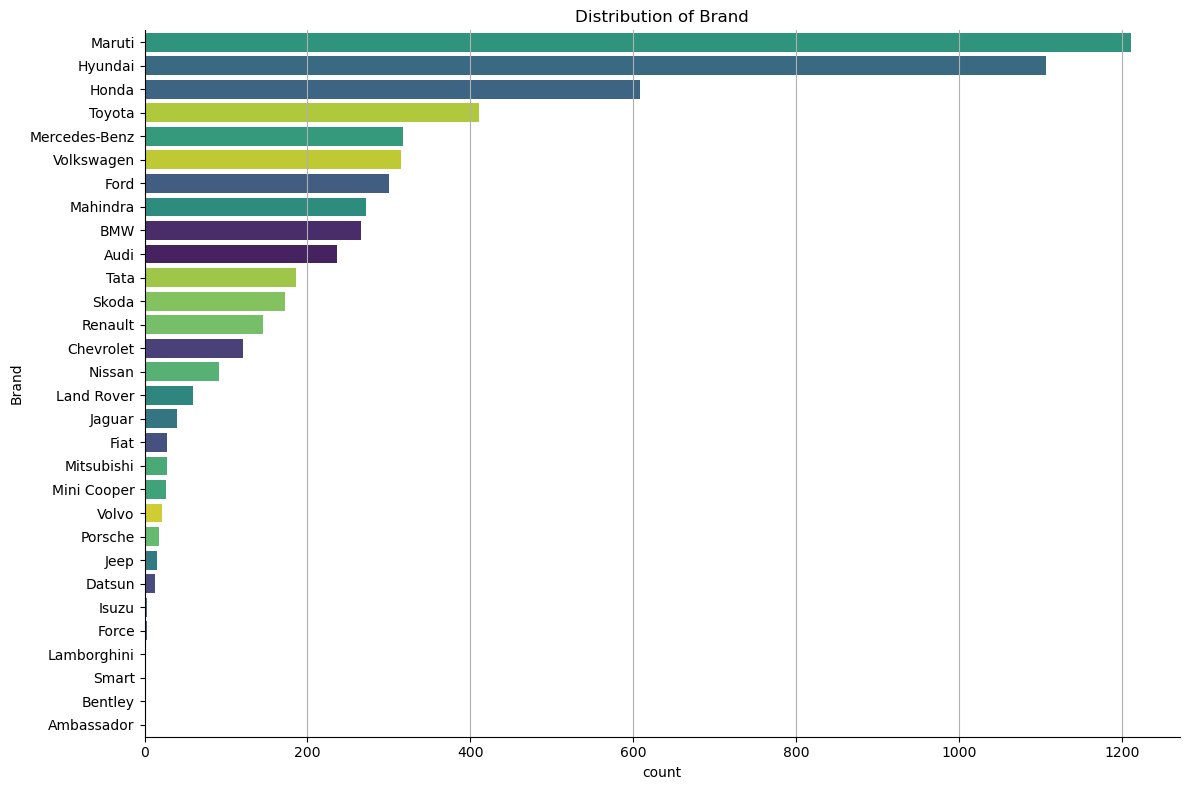

In [80]:
plt.figure(figsize=(12, 8))
sns.countplot(y=df['Brand'], hue = df['Brand'], order=df['Brand'].value_counts().index, palette="viridis")
plt.title(f"Distribution of Brand")
sns.despine(top=True, right=True)  # Remove side lines from graph
plt.tight_layout()
plt.grid(axis='x')
plt.show()

### Observations

In [81]:
df.describe().T

count          mean           std      min       25%  \
Year               6018.0   2013.357594      3.269677  1998.00   2011.00   
Kilometers_Driven  6018.0  57668.047690  37878.783175   171.00  34000.00   
Mileage            6018.0     18.315222      4.167398     6.40     15.29   
Engine             6018.0   1619.894068    600.338371    72.00   1198.00   
Power              6018.0    112.612612     53.668956    34.20     74.00   
Price              6018.0      9.470243     11.165926     0.44      3.50   
Ageofcar           6018.0     11.642406      3.269677     6.00      9.00   

                        50%       75%        max  
Year                2014.00   2016.00    2019.00  
Kilometers_Driven  53000.00  73000.00  775000.00  
Mileage               18.19     21.10      33.54  
Engine              1493.00   1984.00    5998.00  
Power                 93.70    138.10     560.00  
Price                  5.64      9.95     160.00  
Ageofcar              11.00     14.00      27.00

### Numerical Features - Univariate

In [82]:
def plots(feature, df):
    plt.figure(figsize=(14, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    color_hist = sns.color_palette("viridis", 5)[2]
    sns.histplot(df[feature], bins=40, color=color_hist, kde=True, edgecolor='black')
    plt.title(f'Distribution of "{feature}"', fontsize=16, fontweight='bold')
    plt.xlabel(feature, fontsize=12, fontweight='bold', color='#012141')
    plt.ylabel('Count', fontsize=12, fontweight='bold', color='#012141')
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    # Boxplot
    plt.subplot(1, 2, 2)
    color_box = sns.color_palette("viridis", 5)[4]
    sns.boxplot(y=df[feature], color=color_box, width=0.5, fliersize=4)
    plt.title(f'Boxplot for Feature "{feature}"', fontsize=16, fontweight='bold')
    plt.ylabel(feature, fontsize=12, fontweight='bold', color='#012141')
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    sns.despine(top=True,right=True) # to remove side line from graph
    plt.tight_layout()
    plt.show()

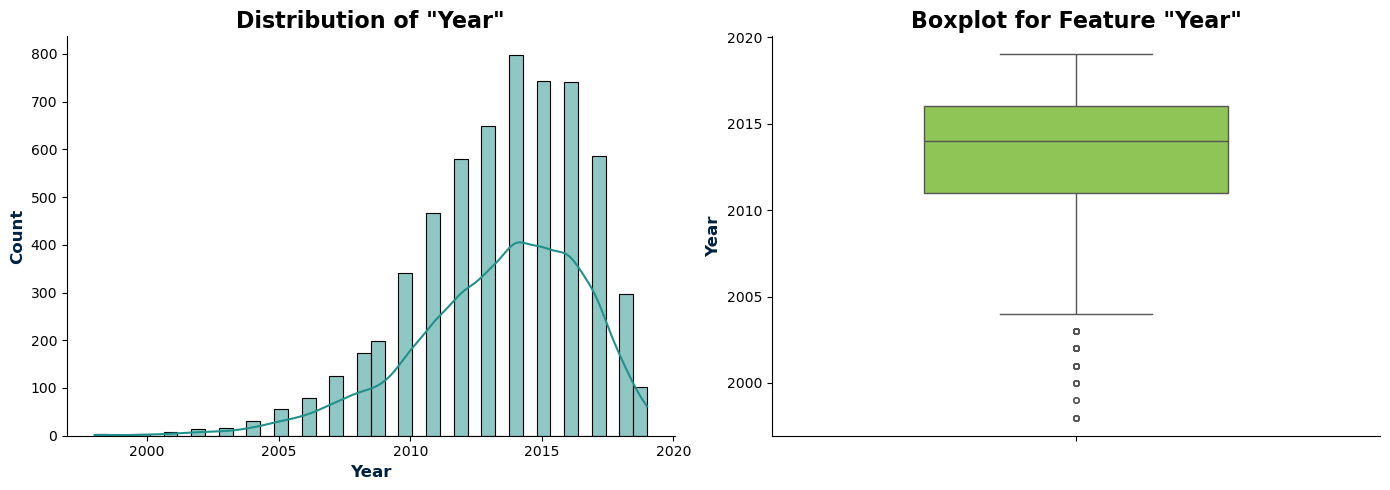

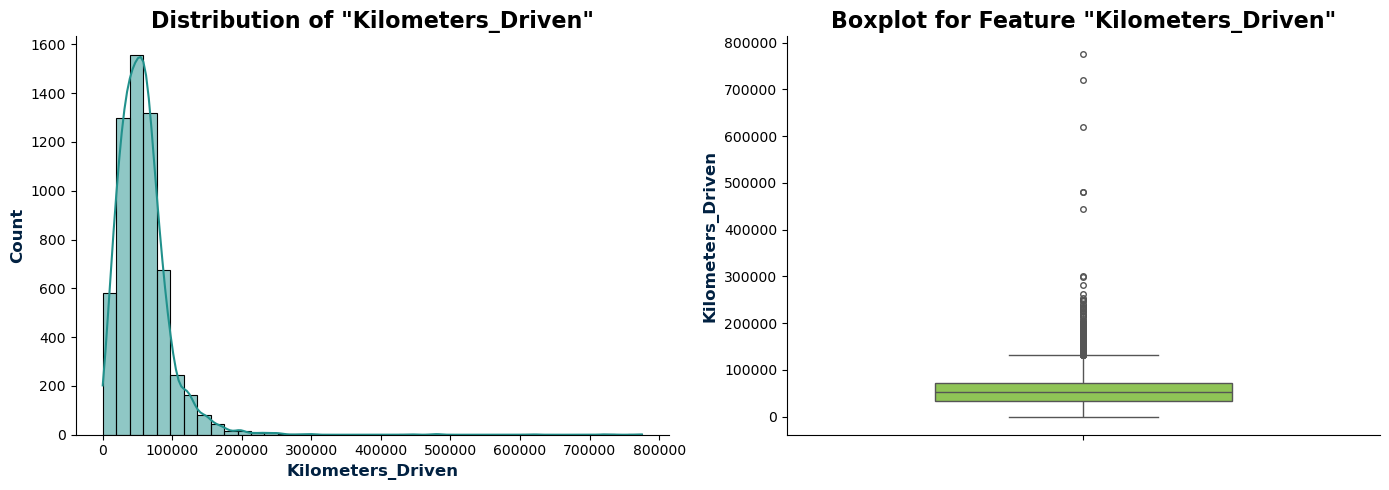

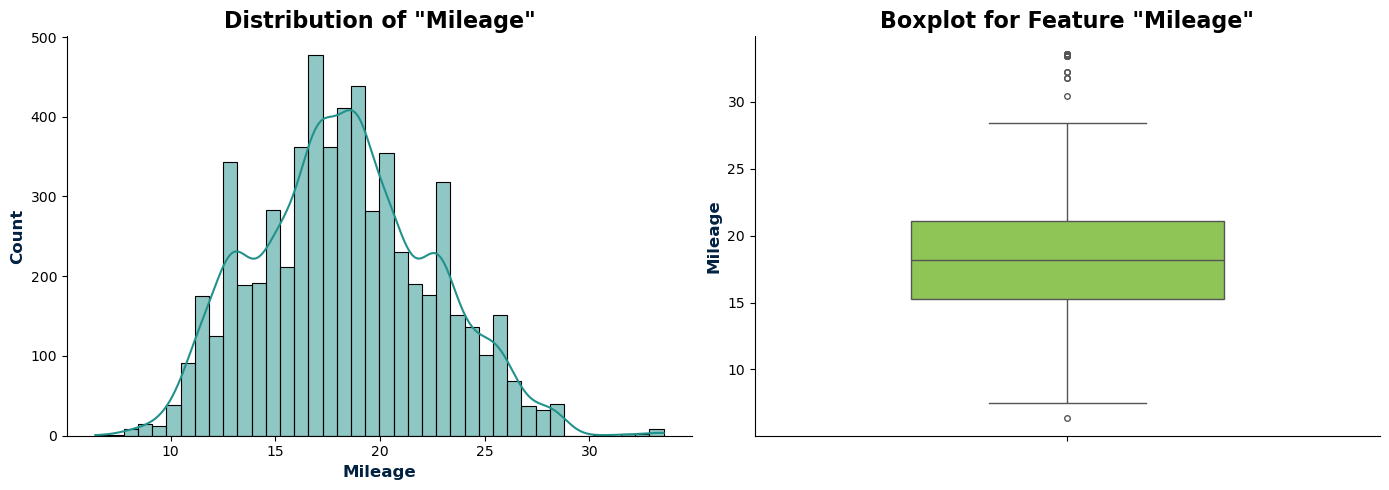

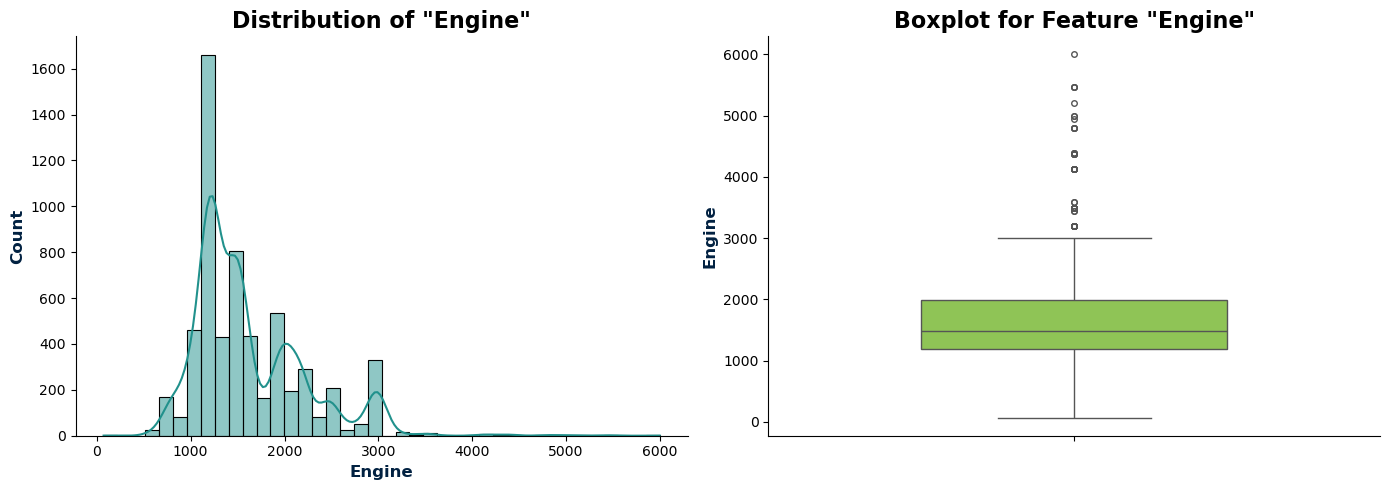

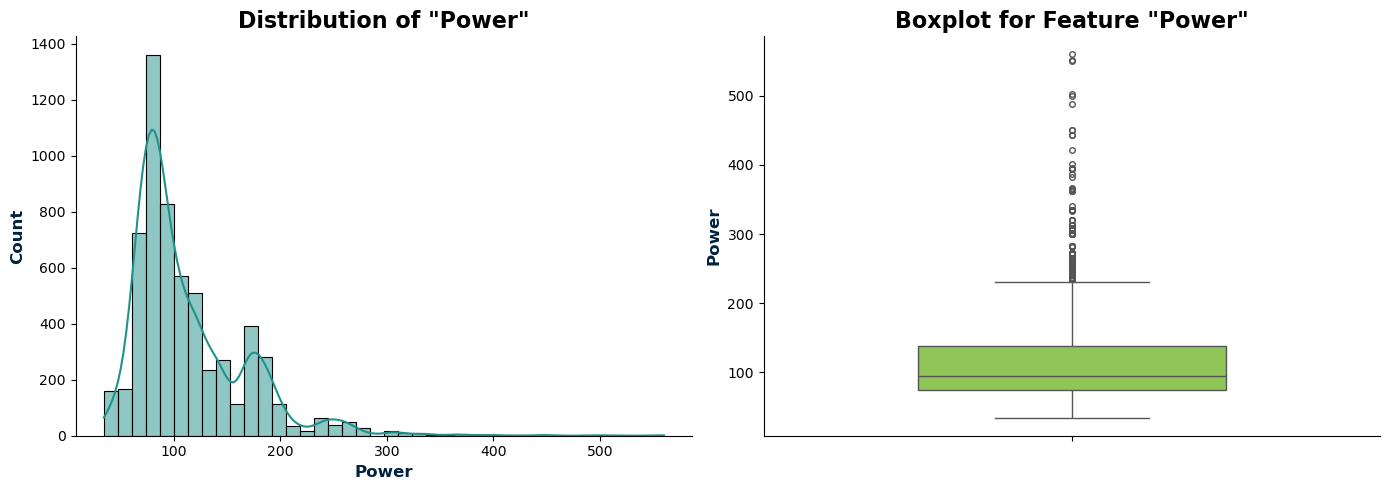

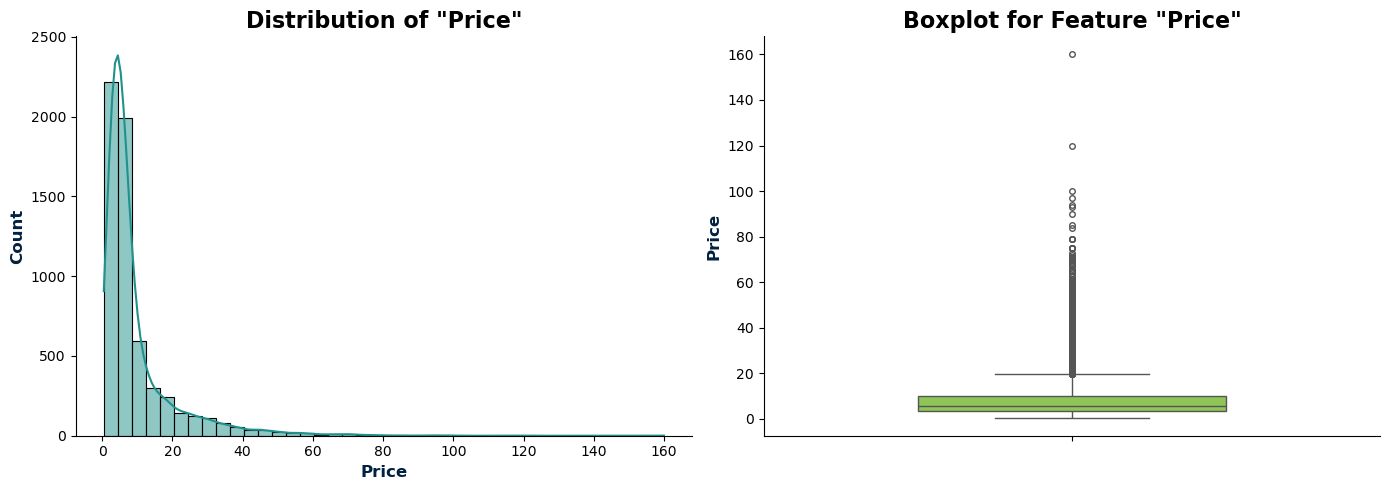

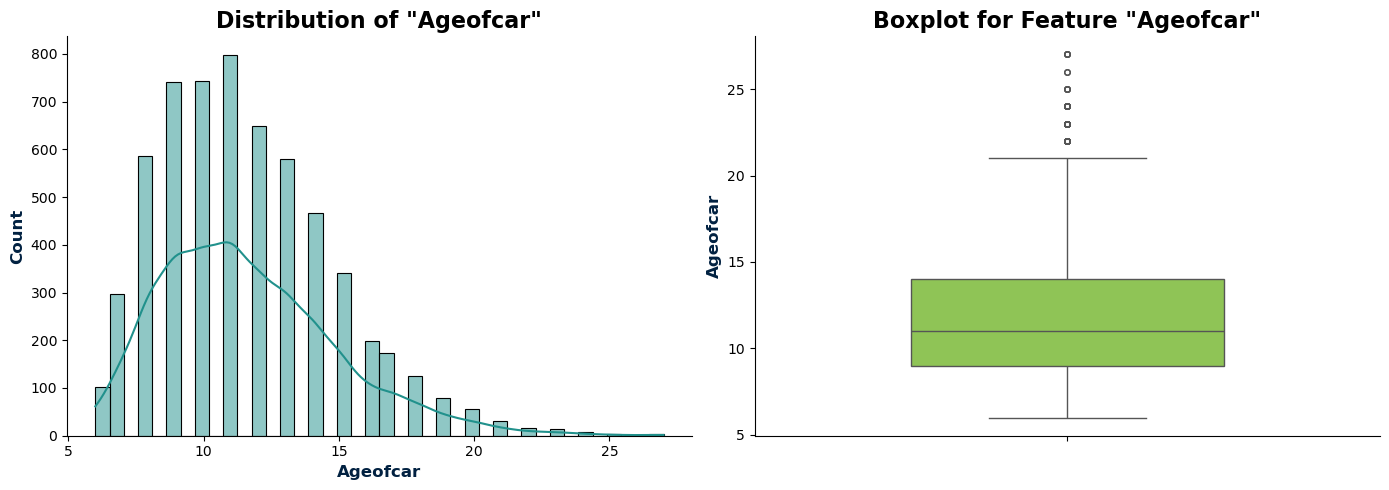

In [83]:
# Apply function for all numerical features
for col in numFeatures:
    plots(col, df)

### 'Kilometers_Driven' and 'Price are highly right skewed. Before split data for modeling try log-transformation.

## Bivariate & Multivariate Analysis

### Cramer's V

The formula for Cramer’s V is:

$V = \sqrt{\frac{\chi^2}{n \times \min(k-1, r-1)} } $

Where:
- $ \chi^2 \$ is the chi-squared statistic from the test of independence.
- n  is the total number of cases (observations).
-  k  is the number of columns in the contingency table.
-  r  is the number of rows in the contingency table.

In [84]:
from scipy.stats import chi2_contingency

In [85]:
def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return np.sqrt((stat/(obs*mini)))

In [86]:
rows= []
# cat_features
for var1 in df[catFeatures]:
  col = []
  for var2 in df[catFeatures] :
    cramers =cramers_V(df[var1], df[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
    
cramers = np.array(rows)
df_cramers = pd.DataFrame(cramers, columns = df[catFeatures].columns, index =df[catFeatures].columns)
df_cramers


Location  Fuel_Type  Transmission  Owner_Type  Seats  Brand  \
Location          1.00       0.10          0.19        0.17   0.05   0.11   
Fuel_Type         0.10       1.00          0.15        0.03   0.16   0.25   
Transmission      0.19       0.15          1.00        0.03   0.15   0.70   
Owner_Type        0.17       0.03          0.03        1.00   0.05   0.11   
Seats             0.05       0.16          0.15        0.05   1.00   0.39   
Brand             0.11       0.25          0.70        0.11   0.39   1.00   
Brand_Class       0.12       0.17          0.43        0.02   0.08   1.00   

              Brand_Class  
Location             0.12  
Fuel_Type            0.17  
Transmission         0.43  
Owner_Type           0.02  
Seats                0.08  
Brand                1.00  
Brand_Class          1.00

### Let's plot heatmap for Cateforical Features to visualize their level of assocition

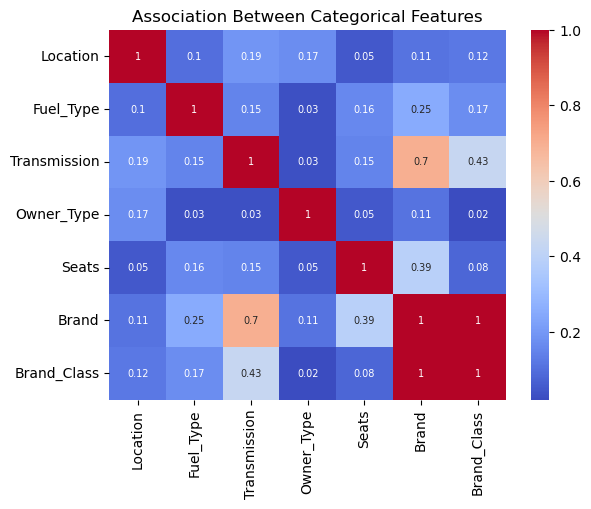

In [87]:
sns.heatmap(df_cramers ,cmap="coolwarm", annot=True, annot_kws={"size": 7}) #Blues
plt.title('Association Between Categorical Features')
plt.show()

### Observations

### Correlation Between Numwric Features

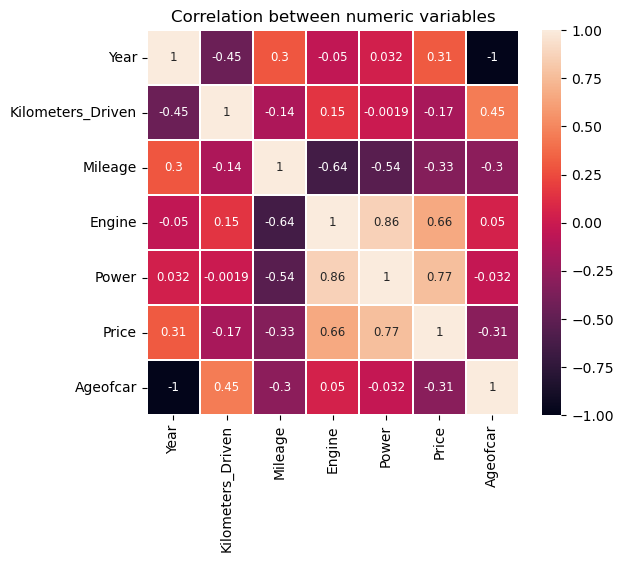

In [88]:
corr=df[numFeatures].corr()
plt.figure(figsize=(6,5))
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=0.2, cmap="rocket",annot=True, annot_kws={"size": 8.5})
plt.title("Correlation between numeric variables")
plt.show()

### Pairplot for Numerical Features

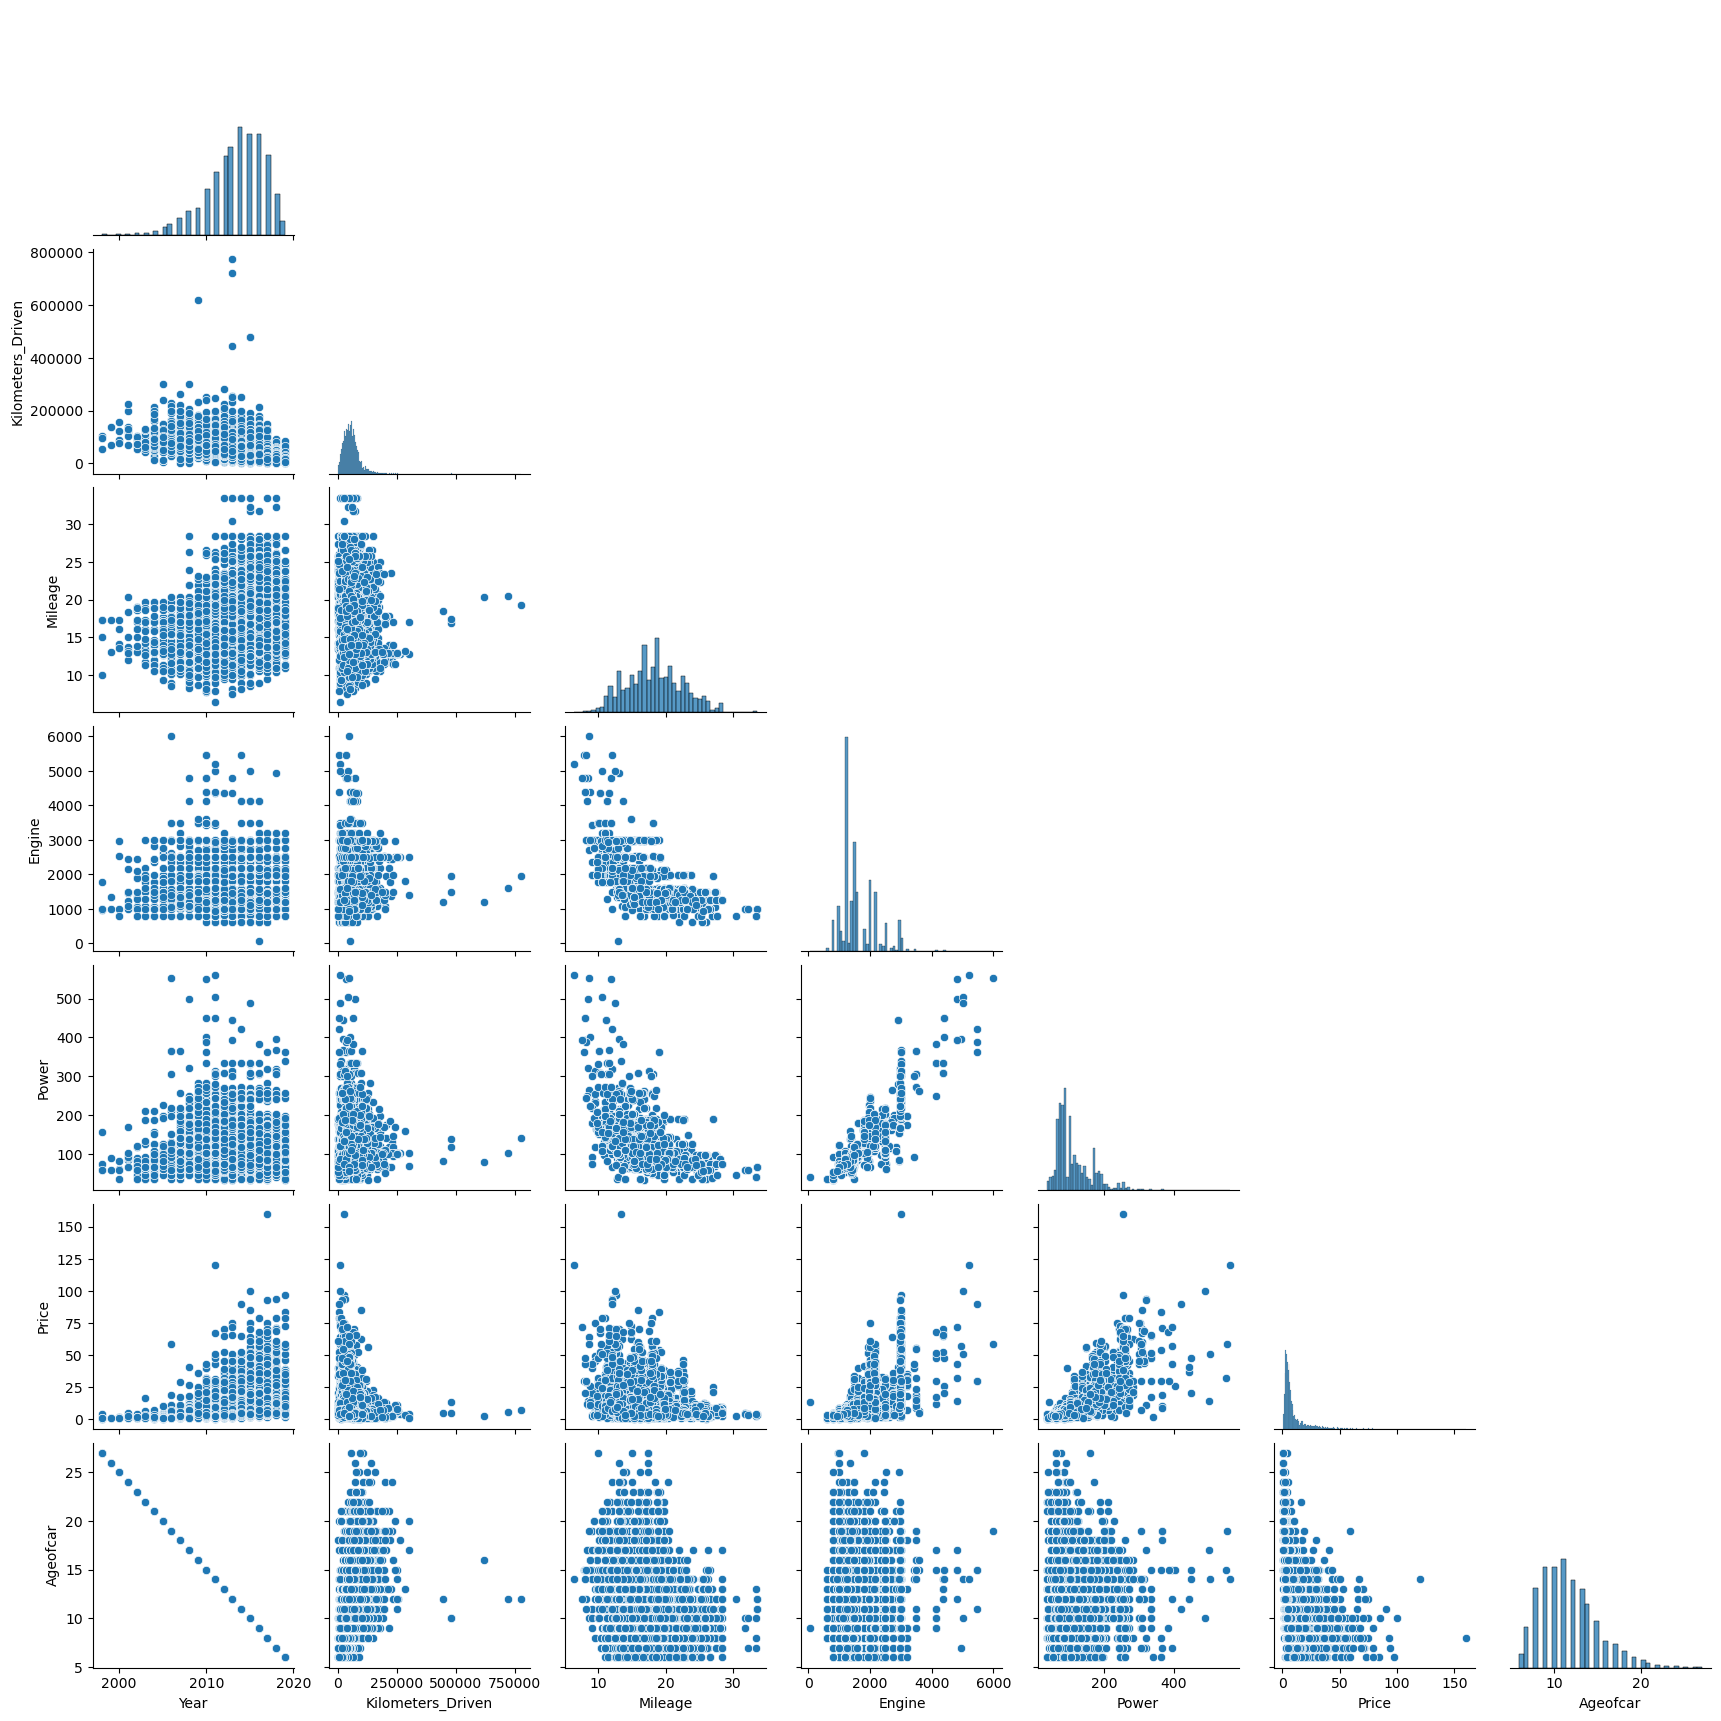

In [89]:
sns.pairplot(df[numFeatures], corner=True)

### Observations
- Kilometer driven  does not have high impact on  Price . 
- As power increase mileage decrease.
- Car with recent make sell at higher prices.
- Engine and Power increase , price of the car seems to increase.

Pearson Correlation between Year and Price: 0.30507


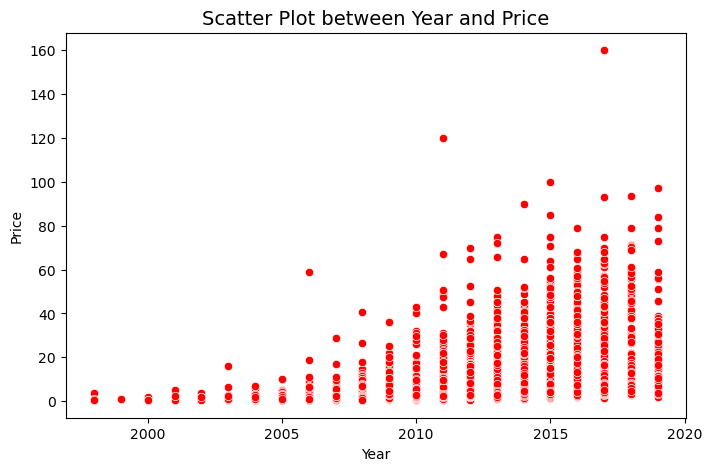

Pearson Correlation between Kilometers_Driven and Price: -0.16830


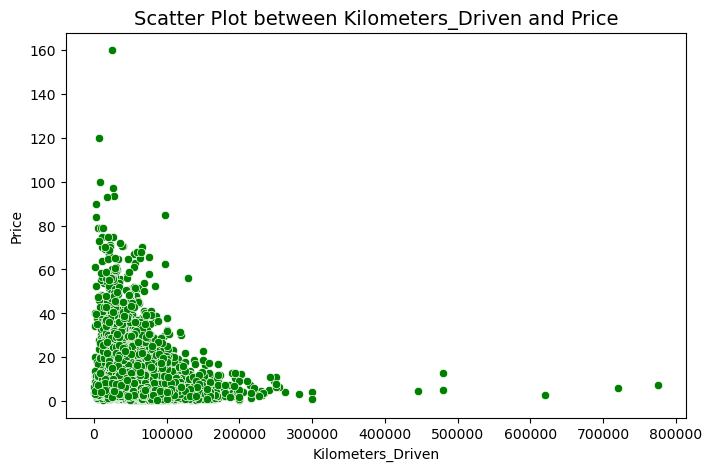

Pearson Correlation between Mileage and Price: -0.33438


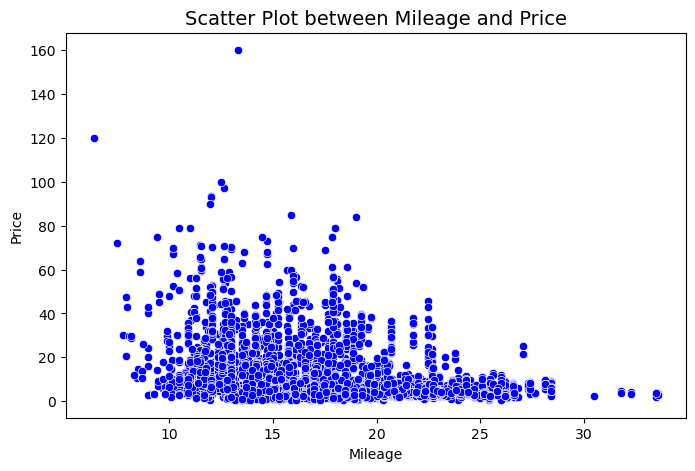

Pearson Correlation between Engine and Price: 0.65866


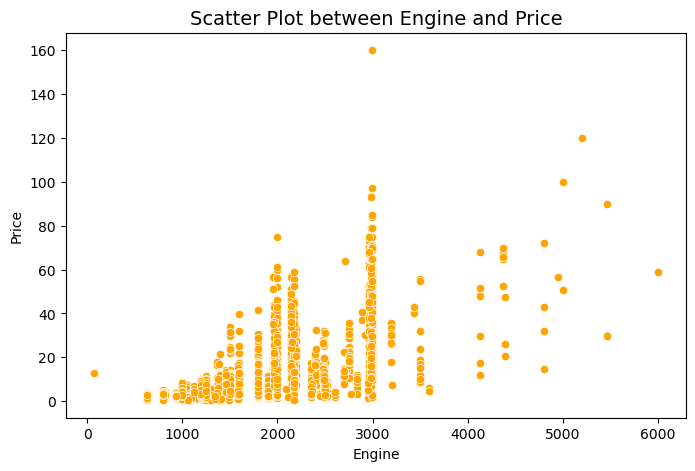

Pearson Correlation between Power and Price: 0.77306


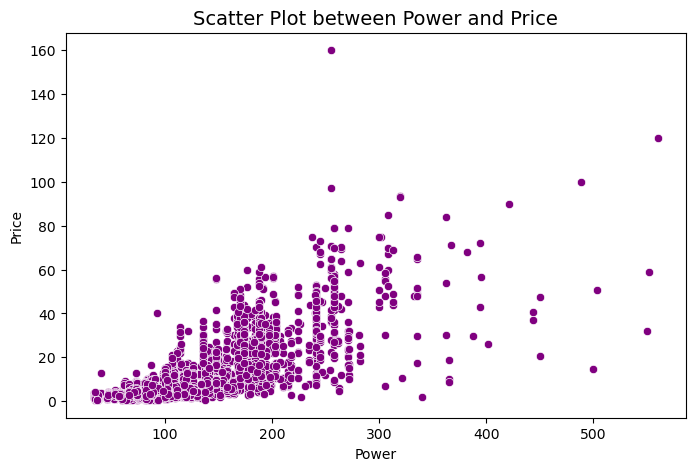

Pearson Correlation between Ageofcar and Price: -0.30507


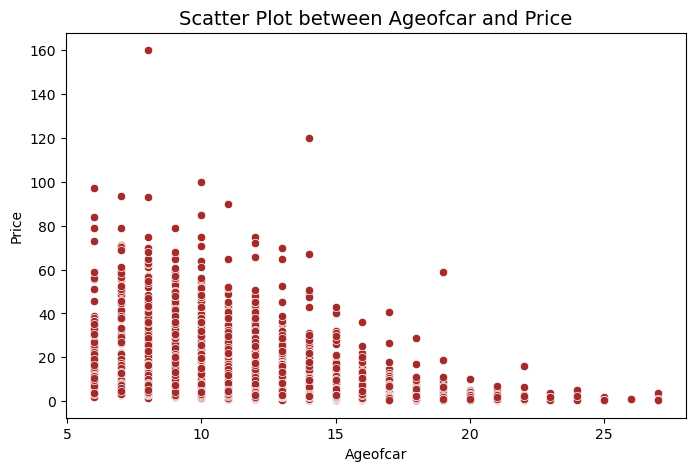

In [90]:
# Scatter plots for all combinations of numerical variables
numFeatures = ['Year','Kilometers_Driven','Mileage','Engine','Power','Ageofcar']

for i in range(len(numFeatures)):
    plt.figure(figsize=(8, 5))       

    correlation = df[numFeatures[i]].corr(df['Price'])  # Correct correlation calculation
    print(f"Pearson Correlation between {numFeatures[i]} and Price: {correlation:.5f}")

    # Create scatter plot with a unique color
    colors = ['red', 'green', 'blue','orange', 'purple', 'brown', 'olive', 'black']
    sns.scatterplot(x=numFeatures[i], y='Price', data=df, color=colors[i % len(colors)])  # Correct indexing
    
    plt.title(f'Scatter Plot between {numFeatures[i]} and Price', fontsize=14)
    plt.xlabel(numFeatures[i])
    plt.ylabel('Price')
    plt.show()

### Observations

- "Year" and "Age of Car" exhibit strong correlation, as "Age of Car" is derived from "Year."
- Engine has strong positive correlation to Power [0.86]. 
- Price has positive correlation to Engine[0.66] as well Power [0.77].
- Mileage is negative correlated to Engine,Power,Price.,Ageofcar
- Price has negative  correlation to age of car and Mileage.
- Kilometer driven has a slight negetive impact Price


### Handilig Outliers

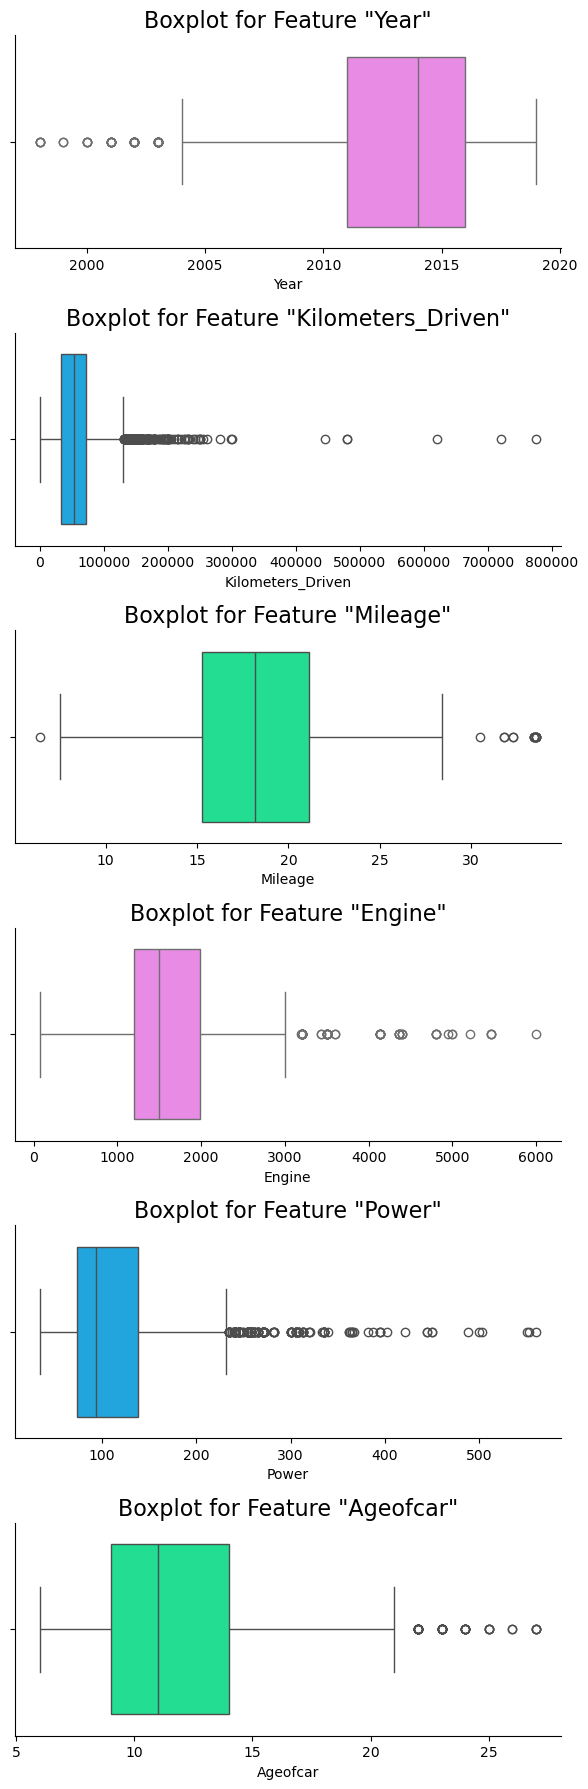

In [91]:
# List of features for boxplots
features = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Ageofcar']

# Create a vertically stacked plot
fig, ax = plt.subplots(len(features), 1, figsize=(6, 18))  # 7 rows, 1 column

# Loop through features to create boxplots
colors = ['#F67CF2', '#03B1FC', '#03fc98', '#F67CF2', '#03B1FC', '#03fc98', '#03fc98']
for i, feature in enumerate(features):
    sns.boxplot(x=df[feature], ax=ax[i], color=colors[i])
    ax[i].set_title(f'Boxplot for Feature "{feature}"', fontsize=16)

# Remove unnecessary spines
sns.despine(top=True, right=True)
plt.tight_layout()  # Ensure plots are properly arranged
plt.show()

#### we can observe outliers in each numerical feature

### Outlier Analysis: Tukey method

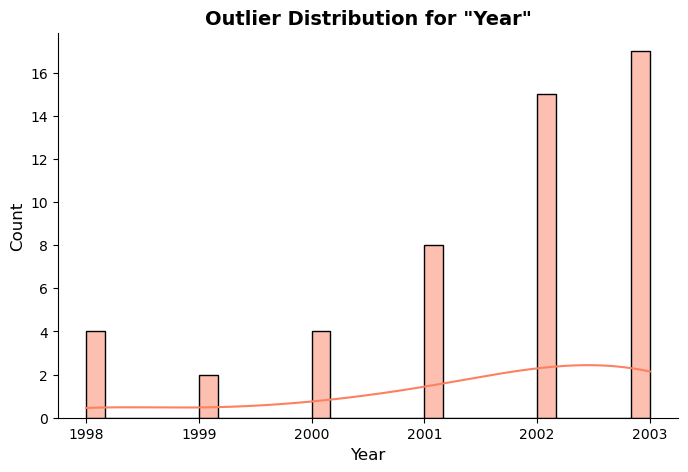

count      50.000000
mean     2001.580000
std         1.526501
min      1998.000000
25%      2001.000000
50%      2002.000000
75%      2003.000000
max      2003.000000
Name: Year, dtype: float64
------------------------------------------------------------------------------------------------


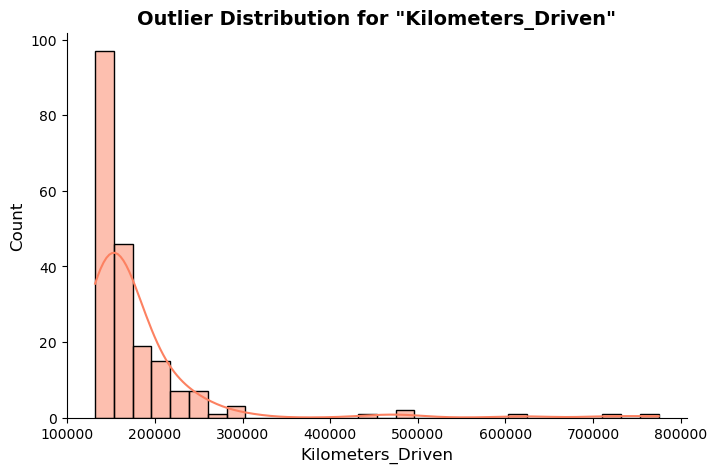

count       201.000000
mean     178616.417910
std       82111.498313
min      131765.000000
25%      143275.000000
50%      155566.000000
75%      180000.000000
max      775000.000000
Name: Kilometers_Driven, dtype: float64
------------------------------------------------------------------------------------------------


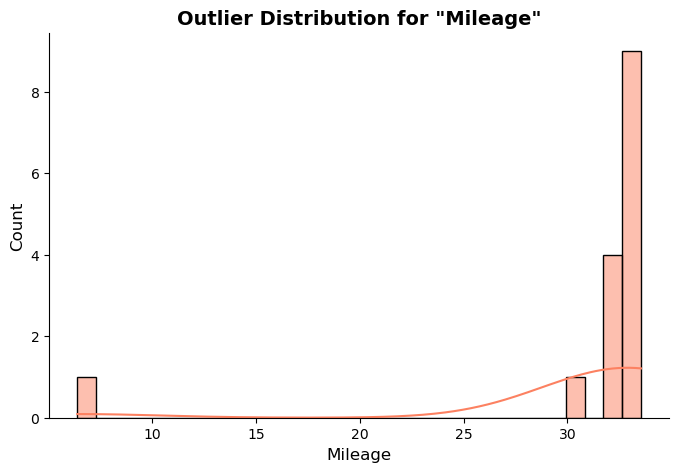

count    15.000000
mean     31.094667
std       6.896236
min       6.400000
25%      32.025000
50%      33.440000
75%      33.540000
max      33.540000
Name: Mileage, dtype: float64
------------------------------------------------------------------------------------------------


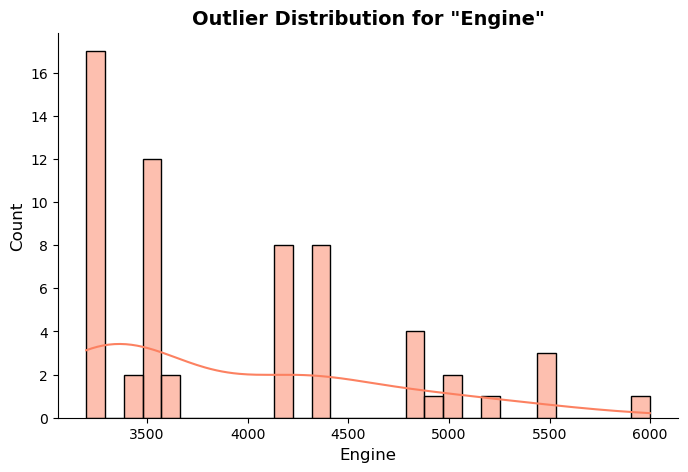

count      61.000000
mean     3938.704918
std       745.229726
min      3197.000000
25%      3198.000000
50%      3498.000000
75%      4367.000000
max      5998.000000
Name: Engine, dtype: float64
------------------------------------------------------------------------------------------------


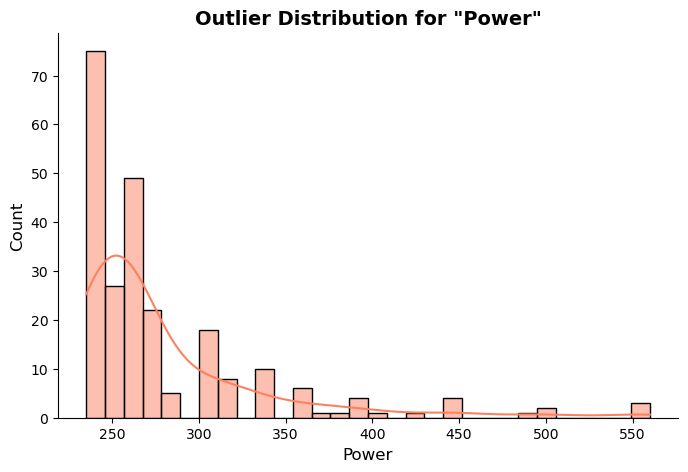

count    238.000000
mean     279.983277
std       59.255510
min      235.000000
25%      241.400000
50%      258.000000
75%      295.500000
max      560.000000
Name: Power, dtype: float64
------------------------------------------------------------------------------------------------


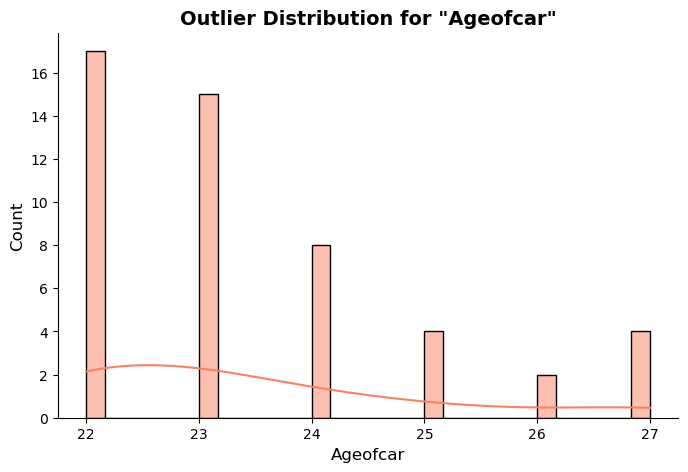

count    50.000000
mean     23.420000
std       1.526501
min      22.000000
25%      22.000000
50%      23.000000
75%      24.000000
max      27.000000
Name: Ageofcar, dtype: float64
------------------------------------------------------------------------------------------------


In [92]:
def outlier_analysis(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    UIF = Q3 + 1.5 * IQR  # Upper Inner Fence
    LIF = Q1 - 1.5 * IQR  # Lower Inner Fence
    
    df_out = df[(df[col] < LIF) | (df[col] > UIF)]  # Filter potential outliers
    
    # Create a separate figure for each feature
    plt.figure(figsize=(8, 5))  
    
    color = sns.color_palette("Reds")[2]  # Pick a specific color from the palette
    sns.histplot(df_out[col], kde=True, bins=30, color=color, edgecolor="black")
    # sns.histplot(df_out[col], kde=True, bins=30, palette='colorblind', edgecolor="black")  # Use histplot instead of distplot
    plt.title(f'Outlier Distribution for "{col}"', fontsize=14, fontweight='bold')
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    sns.despine()  # Remove unnecessary plot borders
    plt.show()

    return df_out[col].describe()  # Display summary statistics

# Apply function to each numerical feature separately
numFeatures1 = features
for feature in numFeatures1:
    # print(f"\nOutlier analysis for {feature}:")
    print(outlier_analysis(feature))
    print('-' * 96)  # Separator for clarity

### Impute extreme outliers using Tukey's method with 3×IQR boundaries.

In [93]:
def impute_outliers_tukey(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    LIF = Q1 - 3 * IQR  # Lower Inner Fence
    UIF = Q3 + 3 * IQR  # Upper Inner Fence
    
    # Replace outliers below LIF with LIF, and above UIF with UIF
    df[col] = np.where(df[col] < LIF, LIF, df[col])
    df[col] = np.where(df[col] > UIF, UIF, df[col])
    
    return df[col]

In [94]:
df.shape

(6018, 16)

In [95]:
# Apply Tukey's outlier imputation to all numerical features
numFeatures = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Ageofcar']

for feature in numFeatures:
    df[feature] = impute_outliers_tukey(feature)

df.shape

(6018, 16)

In [96]:
df.describe().T

count          mean           std      min       25%  \
Year               6018.0   2013.357594      3.269677  1998.00   2011.00   
Kilometers_Driven  6018.0  57059.360253  32980.641001   171.00  34000.00   
Mileage            6018.0     18.315222      4.167398     6.40     15.29   
Engine             6018.0   1618.242356    591.485845    72.00   1198.00   
Power              6018.0    112.215979     51.506711    34.20     74.00   
Price              6018.0      9.470243     11.165926     0.44      3.50   
Ageofcar           6018.0     11.642406      3.269677     6.00      9.00   

                        50%       75%        max  
Year                2014.00   2016.00    2019.00  
Kilometers_Driven  53000.00  73000.00  190000.00  
Mileage               18.19     21.10      33.54  
Engine              1493.00   1984.00    4342.00  
Power                 93.70    138.10     330.40  
Price                  5.64      9.95     160.00  
Ageofcar              11.00     14.00      27.00

### LETS VISUALIZE SOME OF THE FEATURES WITH TARGET GEATURE 'PRICE'

#### Price Vs Power vs Transmission

<Axes: title={'center': 'Price vs Power based on Transmission'}, xlabel='Price', ylabel='Power'>

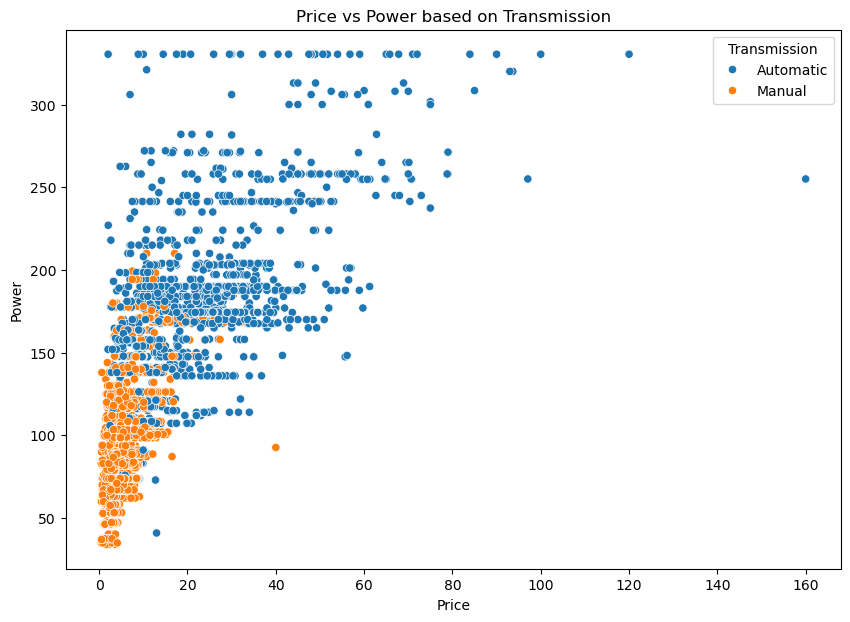

In [97]:
 #understand relationship betweem Price and Power
plt.figure(figsize=(10,7))
plt.title("Price vs Power based on Transmission")
sns.scatterplot(y='Power', x='Price', hue='Transmission', data=df)

#### Price Vs Engine Vs Transmission

<Axes: title={'center': 'Price vs Engine based on Transmission'}, xlabel='Price', ylabel='Engine'>

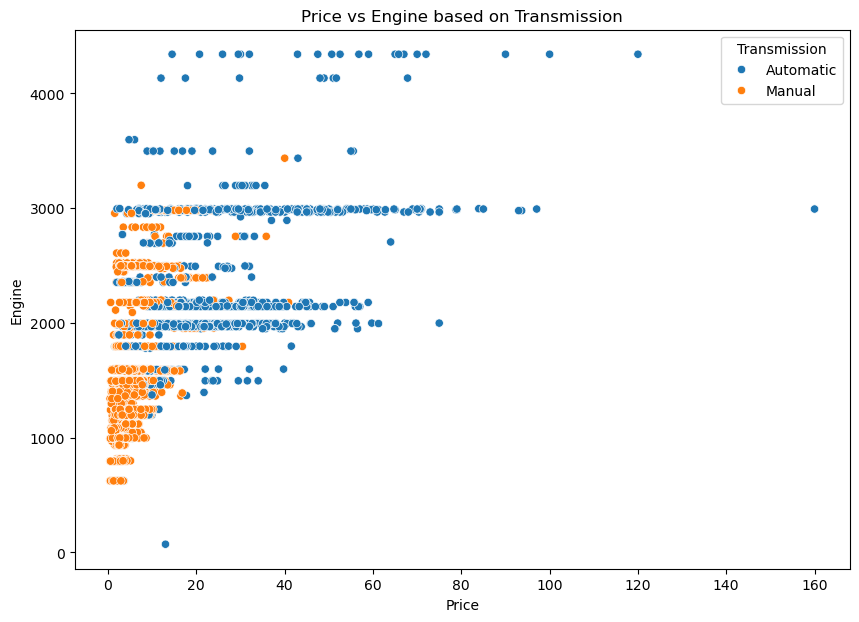

In [98]:
plt.figure(figsize=(10,7))

plt.title("Price vs Engine based on Transmission")
sns.scatterplot(y ='Engine', x ='Price', hue ='Transmission', data=df)

#### Price Vs Mileage Vs Transmission

Text(0.5, 1.0, 'Price Vs Mileage Vs Transmission')

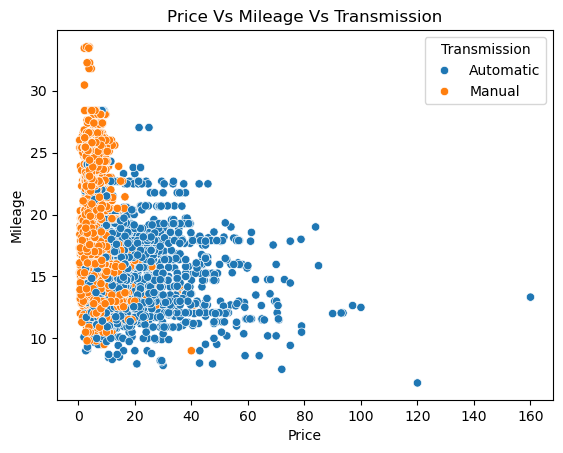

In [99]:
# Understand the relationships  between mileage and Price
sns.scatterplot(y='Mileage', x='Price', hue='Transmission', data=df)
plt.title("Price Vs Mileage Vs Transmission")

#### Price Vs Year Vs Transmission

<Axes: title={'center': 'Price based on manufacturing Year of model'}, xlabel='Year', ylabel='Price'>

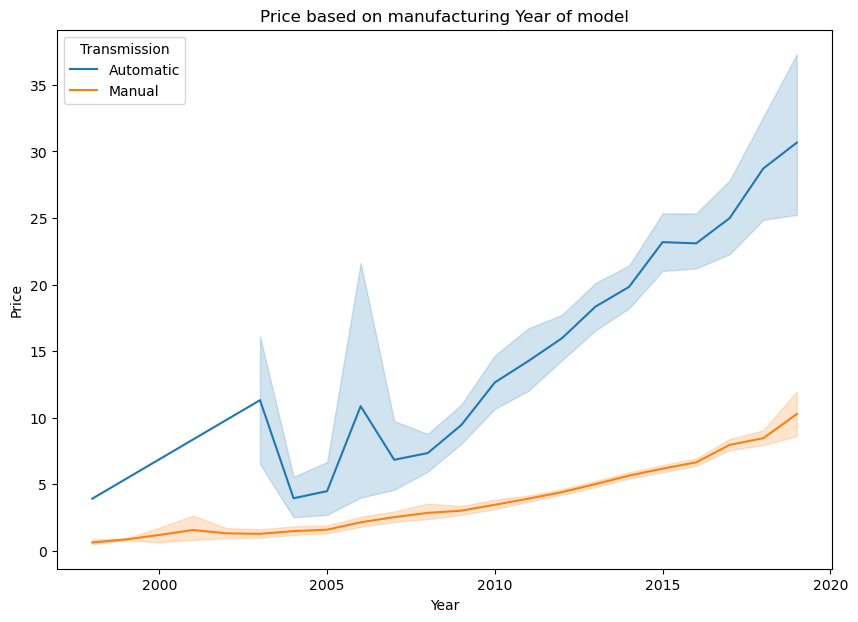

In [100]:
plt.figure(figsize=(10,7))
plt.title("Price based on manufacturing Year of model")
sns.lineplot(x='Year', y='Price',hue='Transmission', data=df)

#### Price Vs Year VS Fuel Type

<Axes: title={'center': 'Price Vs Year VS FuelType'}, xlabel='Year', ylabel='Price'>

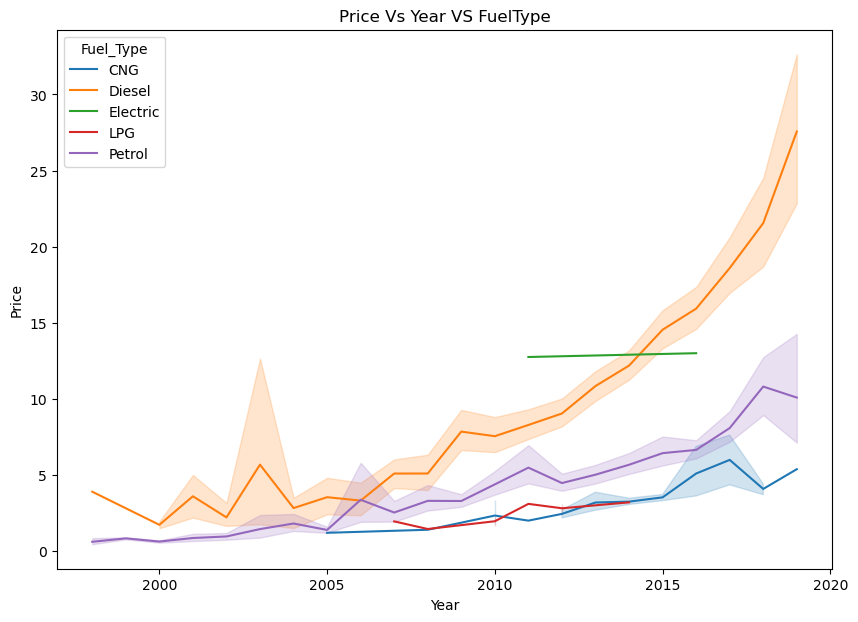

In [101]:
# Impact of years on price 
plt.figure(figsize=(10,7))
plt.title("Price Vs Year VS FuelType")
sns.lineplot(x='Year', y='Price',hue='Fuel_Type',data=df)

#### Year Vs Price Vs Owner_Type

<Axes: title={'center': 'Price Vs Year VS Owner_Type'}, xlabel='Year', ylabel='Price'>

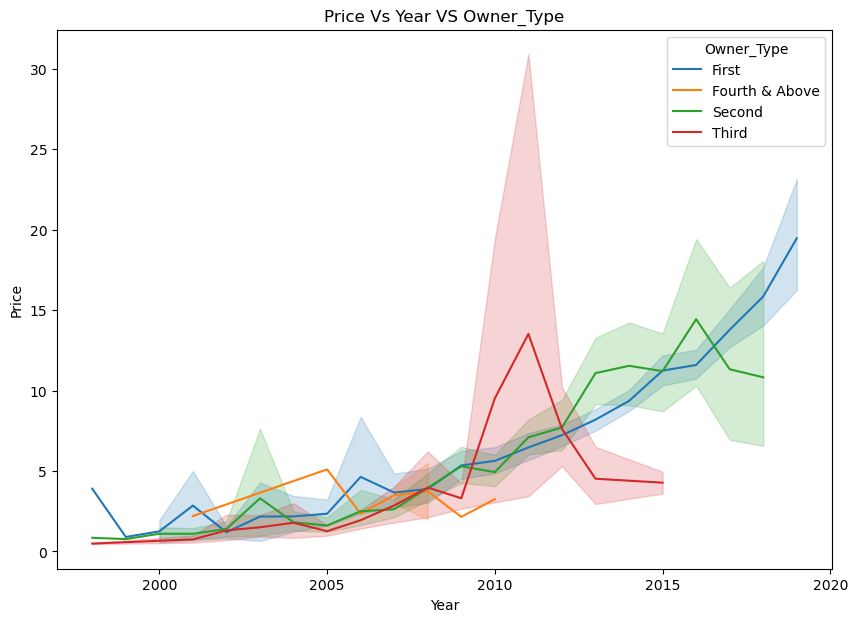

In [102]:
plt.figure(figsize=(10,7))
plt.title("Price Vs Year VS Owner_Type")
sns.lineplot(x='Year', y='Price',hue='Owner_Type', data=df)

The pink peak in year 2011 explains the price uncertainity for third owner vehicles. We can investigate this.

In [103]:
df[(df["Owner_Type"]=='Third') & (df["Year"].isin([2011]))].sort_values(by='Price',ascending =False)

Name   Location    Year  \
5781                  Lamborghini Gallardo Coupe      Delhi  2011.0   
2288                     Audi A6 3.0 TDI quattro  Bangalore  2011.0   
4871                     Ford Endeavour 2.5L 4X2  Bangalore  2011.0   
3275                      Mahindra XUV500 W8 2WD    Chennai  2011.0   
5942                  Ford Endeavour 2.5L 4X2 MT     Jaipur  2011.0   
4870                      Mahindra XUV500 W8 2WD    Chennai  2011.0   
753                          Chevrolet Cruze LTZ    Chennai  2011.0   
1158                              Maruti SX4 ZDI    Chennai  2011.0   
1282         Volkswagen Vento Petrol Highline AT       Pune  2011.0   
368                              Maruti Alto VXi  Bangalore  2011.0   
2272                   Ford Figo Diesel Titanium       Pune  2011.0   
2291               Mahindra Logan Diesel 1.5 DLS    Chennai  2011.0   
257   Maruti Omni MPI CARGO BSIII W/ IMMOBILISER     Jaipur  2011.0   
1060                    Chevrolet Beat Diesel LT    Chennai  2011.0   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
5781             6500.0    Petrol    Automatic      Third     6.40  4342.0   
2288            50000.0    Diesel    Automatic      Third    16.77  2967.0   
4871            71000.0    Diesel       Manual      Third    13.10  2499.0   
3275           126000.0    Diesel       Manual      Third    16.00  2179.0   
5942           119000.0    Diesel       Manual      Third    13.10  2499.0   
4870           128000.0    Diesel       Manual      Third    16.00  2179.0   
753             73000.0    Diesel       Manual      Third    18.30  1991.0   
1158            80000.0    Diesel       Manual      Third    21.50  1248.0   
1282            42000.0    Petrol    Automatic      Third    14.40  1598.0   
368             11000.0    Petrol       Manual      Third    18.90   796.0   
2272            95000.0    Diesel       Manual      Third    20.00  1399.0   
2291           128000.0    Diesel       Manual      Third    19.20  1461.0   
257             35000.0    Petrol       Manual      Third    19.70   796.0   
1060           109500.0    Diesel       Manual      Third    25.44   936.0   

       Power Seats   Price  Ageofcar        Brand          Model Brand_Class  
5781  330.40   2.0  120.00      14.0  Lamborghini  GallardoCoupe        High  
2288  241.38   5.0   21.00      14.0         Audi          A63.0        High  
4871  141.00   7.0    6.95      14.0         Ford  Endeavour2.5L         Low  
3275  140.00   7.0    6.70      14.0     Mahindra       XUV500W8         Low  
5942  141.00   7.0    6.50      14.0         Ford  Endeavour2.5L         Low  
4870  140.00   7.0    6.40      14.0     Mahindra       XUV500W8         Low  
753   147.90   5.0    4.20      14.0    Chevrolet       CruzeLTZ         Low  
1158   88.80   5.0    3.50      14.0       Maruti         SX4ZDI         Low  
1282  103.60   5.0    3.40      14.0   Volkswagen    VentoPetrol        High  
368    47.00   5.0    2.90      14.0       Maruti        AltoVXi         Low  
2272   68.00   5.0    2.35      14.0         Ford     FigoDiesel         Low  
2291   65.00   5.0    2.00      14.0     Mahindra    LoganDiesel         Low  
257    35.00   5.0    1.85      14.0       Maruti        OmniMPI         Low  
1060   57.60   5.0    1.50      14.0    Chevrolet     BeatDiesel         Low

The observation is for The Lamborghini car which is expensive (120 laks) and luxury. Hence we consider the data as valid.

#### Price Vs Mileage vs Fuel_type

<Axes: title={'center': 'Price Vs Mielage vs Fuel Type'}, xlabel='Mileage', ylabel='Price'>

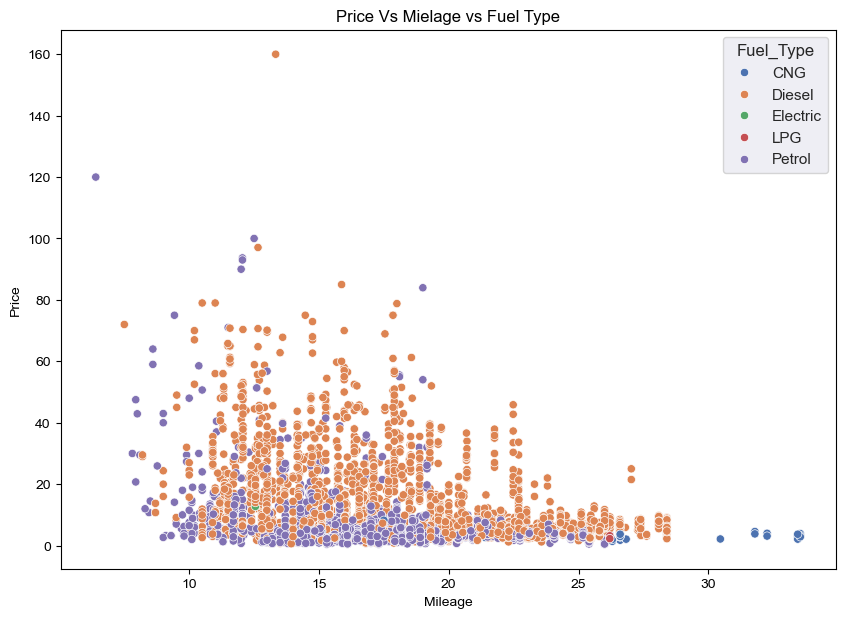

In [104]:
# Understand relationships  between price and mileage
plt.figure(figsize=(10,7))
plt.title("Price Vs Mielage vs Fuel Type")
sns.set(font_scale=1)
sns.scatterplot(y='Price', x='Mileage', hue='Fuel_Type', data=df)

#### Price Vs Seat

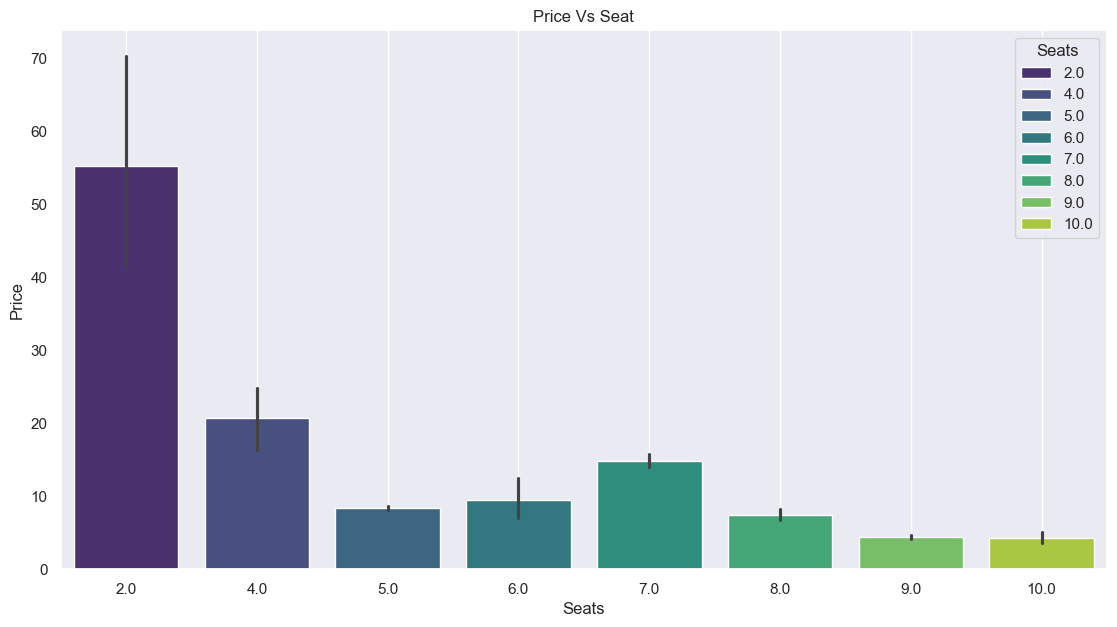

In [105]:
#Price and seats 
plt.figure(figsize=(13.5,7))
sns.set(font_scale=1)
sns.barplot(x='Seats', y='Price', data=df, hue='Seats', palette="viridis")
plt.title("Price Vs Seat")
plt.grid()

note: lines show the variability or uncertainty in the measured values

#### Price Vs Location

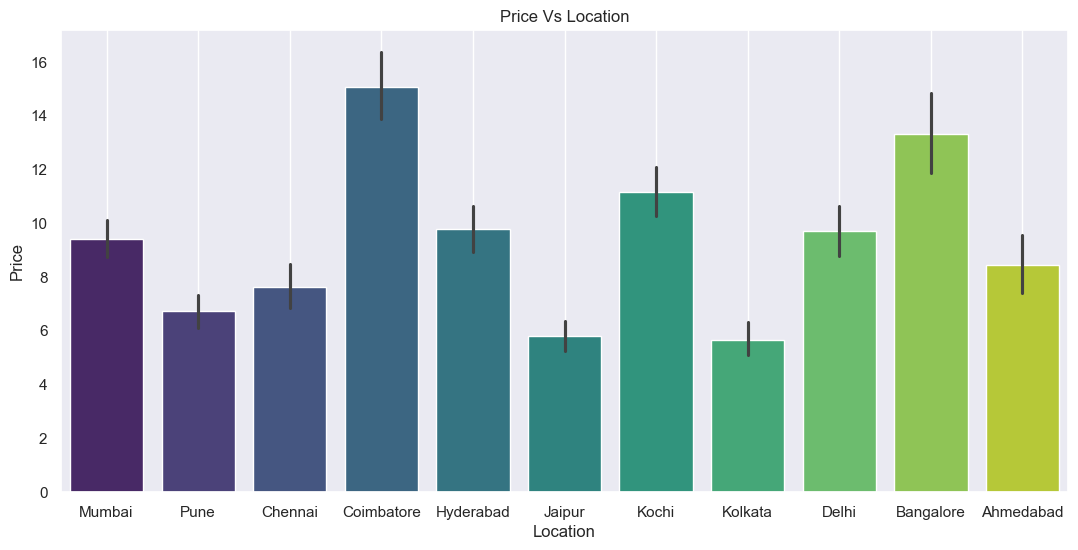

In [106]:
#Price and LOcation 
plt.figure(figsize=(13,6))
sns.set(font_scale=1)
sns.barplot(x='Location', y='Price', data=df, hue='Location', palette="viridis")
plt.title("Price Vs Location")
plt.grid()

#### Price Vs Brand

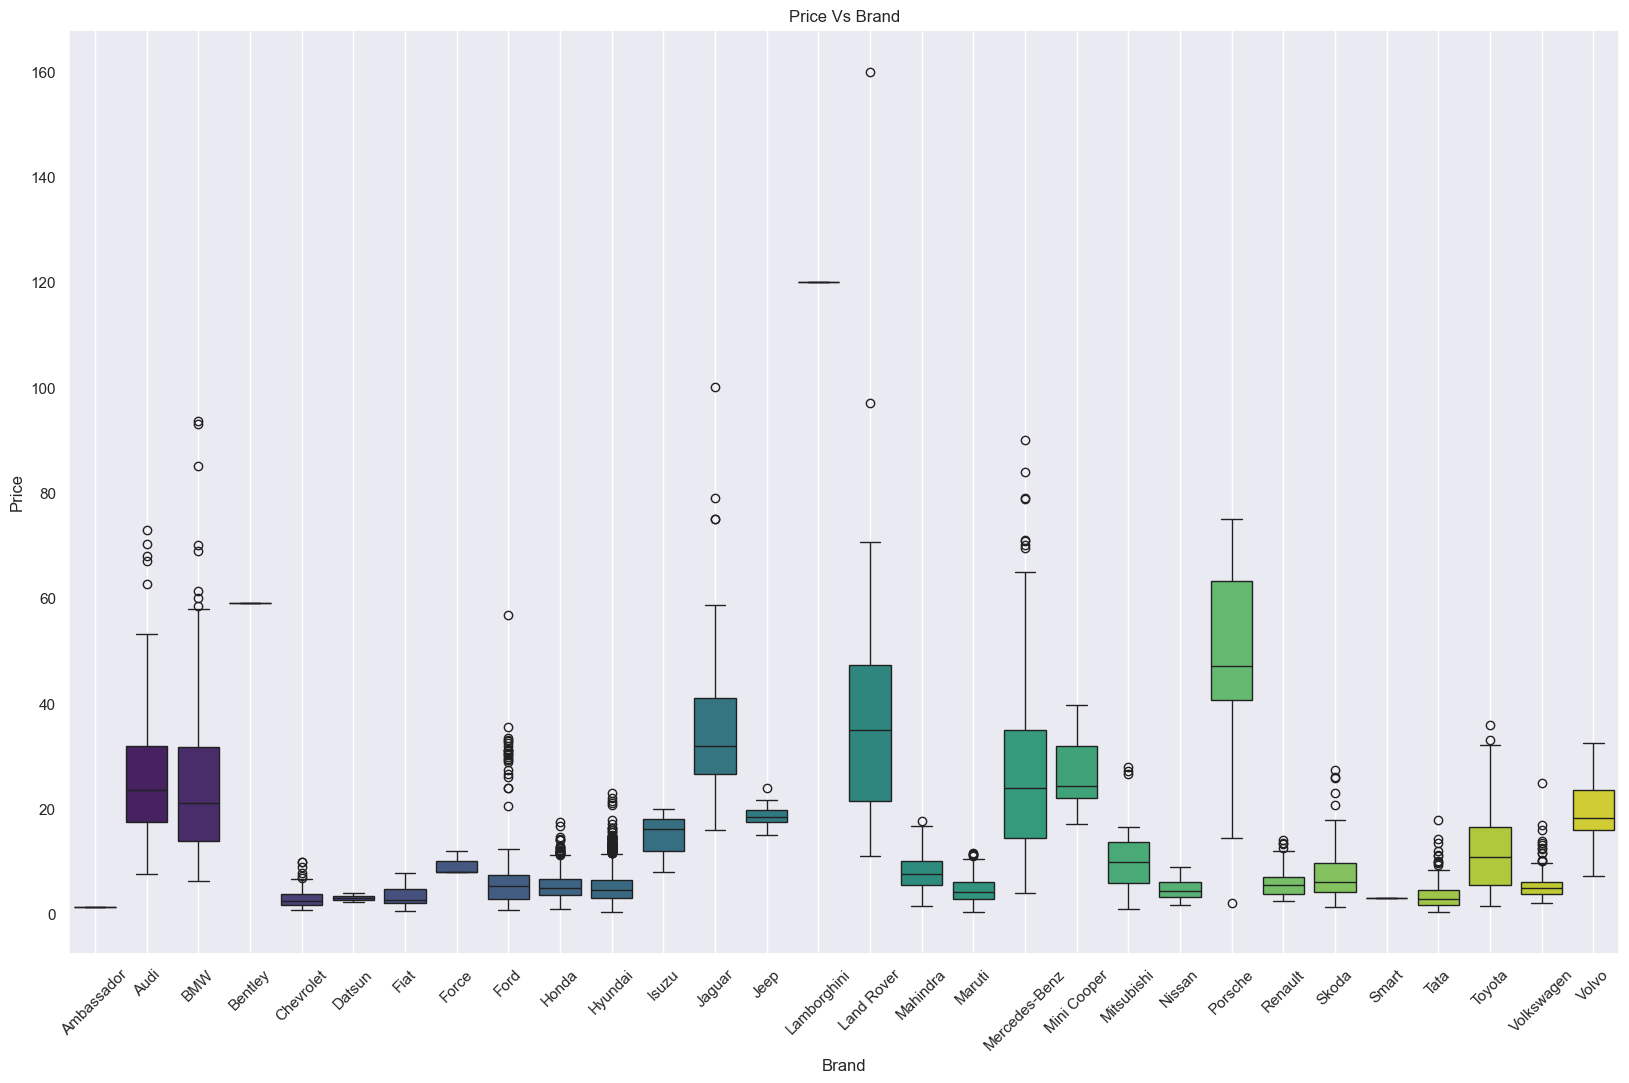

In [107]:
#Price and band 
plt.figure(figsize=(20,12))
sns.set(font_scale=1)
sns.boxplot(y='Price', x='Brand', data=df, hue='Brand', palette="viridis")
plt.title("Price Vs Brand")
plt.tick_params(axis='x', rotation=45)
plt.grid()

#### Price Vs Year by Owner_Type

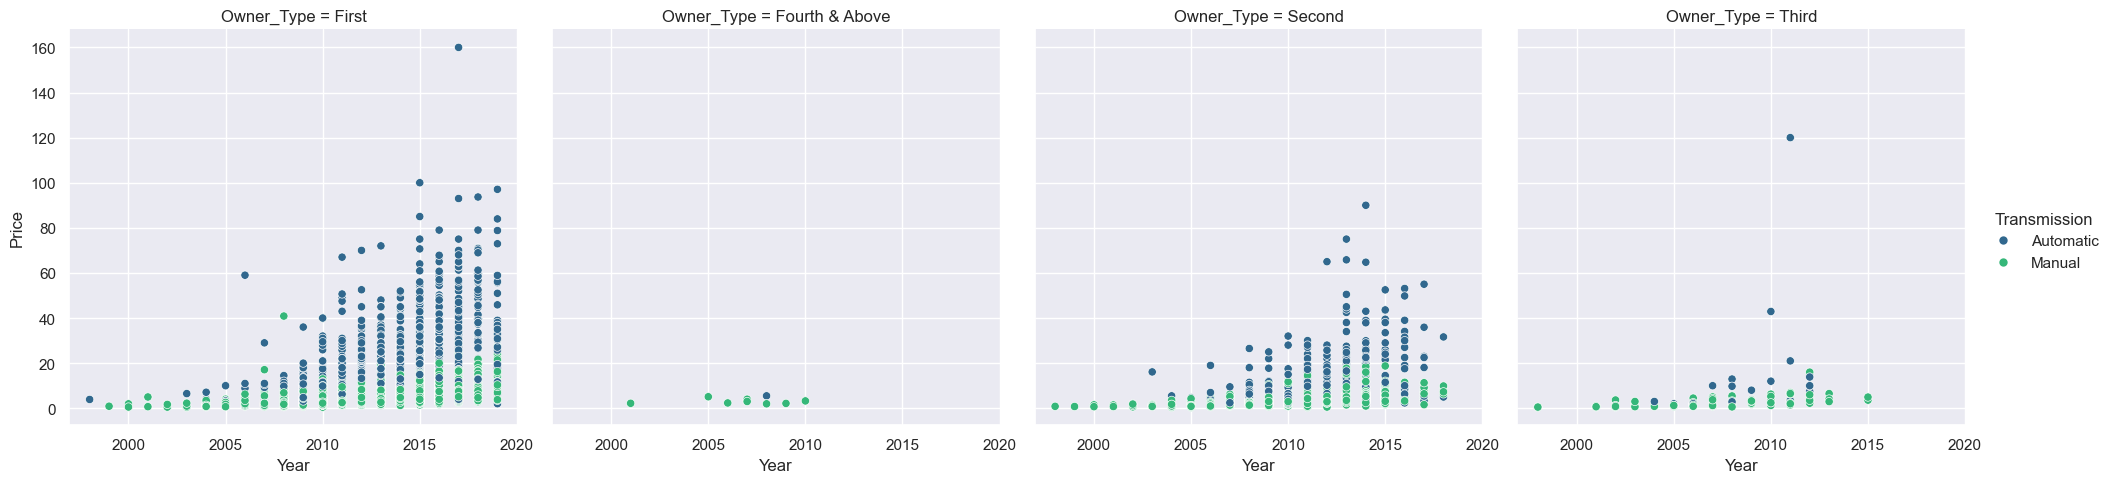

In [108]:
sns.relplot(data=df, y='Price',x='Year', col='Owner_Type',hue='Transmission',aspect=1,height=5, palette="viridis")
plt.show()

#### Price Vs Milage by Transmission

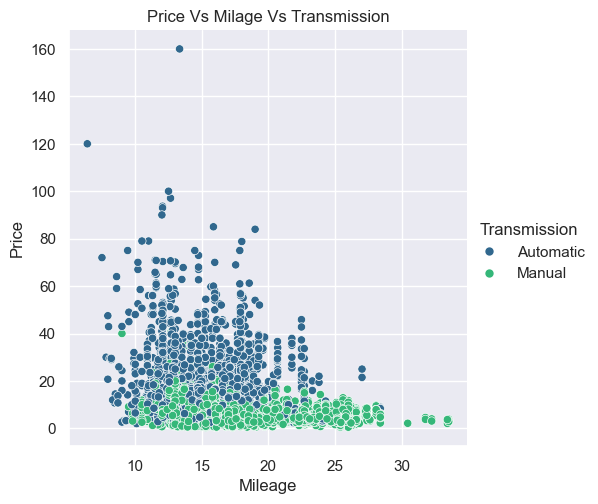

In [109]:
sns.relplot(data=df, y='Price',x='Mileage',hue='Transmission',aspect=1,height=5, palette="viridis")
plt.title("Price Vs Milage Vs Transmission")
plt.show()

#### Price Vs Age of car by Transmission

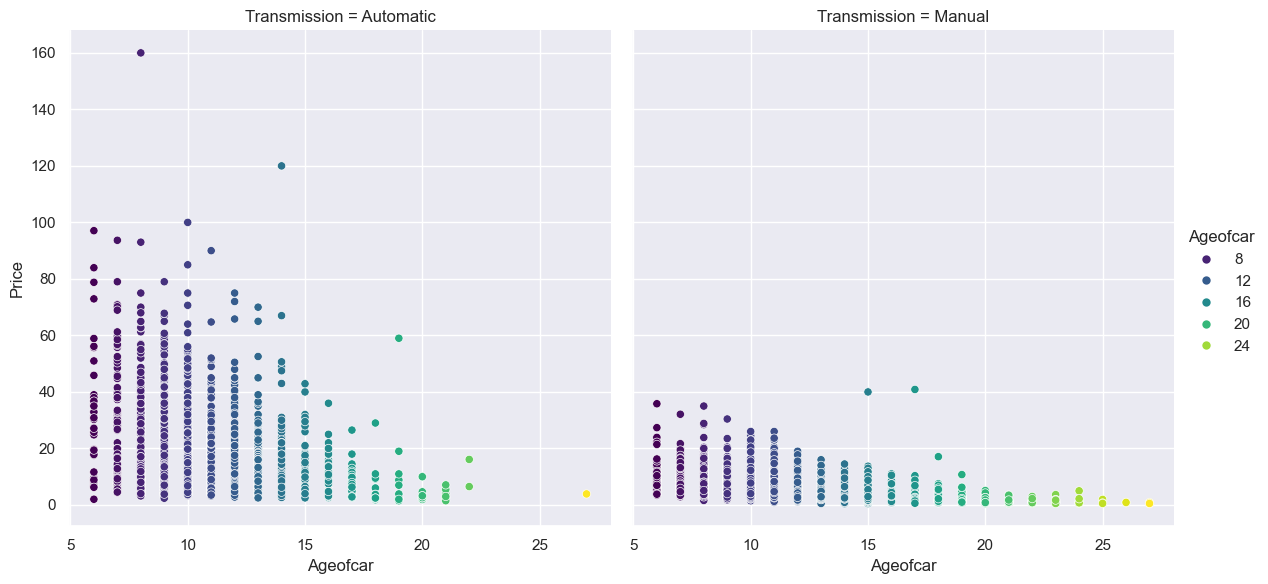

In [110]:
sns.relplot(data=df, y='Price',x='Ageofcar',col='Transmission',aspect=1,height=6, hue = 'Ageofcar', palette="viridis")

#### Price Vs Engine by Transmission

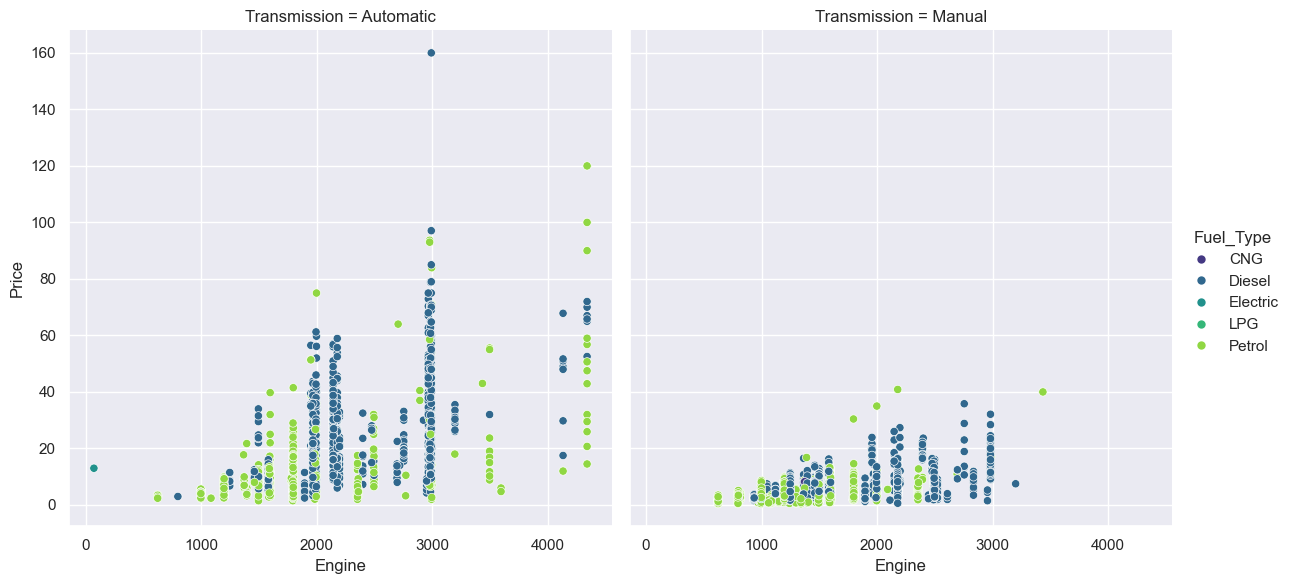

In [111]:
sns.relplot(data=df, y='Price',x='Engine',col='Transmission',aspect=1,height=6,hue="Fuel_Type", palette="viridis")
plt.show()

- Expensive cars are in Coimbatore and Banglore.
- 2 Seater cars are more expensive.
- Deisel Fuel type car are more expensive compared to other fuel type.
- As expected, Older model are sold cheaper compared to latest model
- Automatic transmission vehicle have a higher price than manual transmission vehicles.
- Vehicles with more engine capacity have higher prices.
- Price decreases as number of owner increases.
- Automatic transmission require high engine and power.
- Prices for Cars with fuel type as Deisel has increased with recent models
- Engine,Power, Age oof the car, Mileage, Fuel type, location, Transmission affect the price.

### Chi-squared test of independence
- The Chi-square test statistic can be used if the following conditions are satisfied:
1. N, the total frequency, should be reasonably large, say greater than 50. (MET)
2. The sample observations should be independent. (This implies that no individual item should be included twice or more in the sample.) (MET)
3. No expected frequencies should be small. (Small is a relative term. Preferably each expected frequencies should be larger than 10 but in any case not less than 5.)(MET-see test results)


In [112]:
# from scipy.stats import chi2_contingency
def chi_square_(c1 ,c2):
    print(f"\nChi-square test of independence: {c1} and {c2}")
    print("-"*(len(c1)+len(c2)+38))
    print(f'\nTest Hypothesis')
    print("-"*16)
    print(f"H0: THE VARIABLES ARE INDEPENDENT(There is no association between {c1} and {c2});")
    print(f"H1: THE VARIABLES ARE DEPENDENT(There is an association between {c1} and {c2});")
    
    # print('-'*42)
    chi_2, p_val, dof, exp_val = chi2_contingency(pd.crosstab(df[c1],df[c2],margins = False))# make sure margins = False
    print(f"\nActual values: ")
    print("-"*15)
    print(pd.crosstab(df[c1],df[c2],margins = False))
    print(f"\nExpected values: ")
    print("-"*16)    
    print(exp_val)

    #print('\nChi-square is : %f'%chi_2, '\n\np_value is : %f'%p_val, '\n\ndegree of freedom is : %i'%dof)
    print(f'\nChi-square is        :{chi_2:.4f}\np_value is           :{p_val:.4f}\nDegree of freedom is :{dof}')
    print(f'\nInterpritation of test result: \n{'-'*31}')
    
    if exp_val.min()<5 or np.sum(exp_val)<50 : 
        print("********************************************\nWarning :We have some small expected \
        values or the total number of observations is not enough to get any conclusion\n******************************************** ")
        #Note for sum of all values in dataframe use df.values.sum() and for numpy.ndarray use np.sum(arr)
    elif p_val < 0.05:# consider significan level is 5%
        print(F"There is a statistically significant correlation between {c1} and {c2} at 0.05 significant level")
    else:
        print(F"There is no correlation between the two variables(we don't have enough evidence to conclude there is a statistically significant relationship between {c1} and {c2}")        

In [113]:
def stacked_plot(x, feature_name, target_variable):
    sns.set_palette(sns.color_palette("Dark2", 8))  # Set color palette
    
    tab1 = pd.crosstab(x, df[target_variable], margins=True)  # Dynamically use target_variable
    print(tab1)
    print('-' * 90)
    
    tab = pd.crosstab(x, df[target_variable], normalize='index')  # Normalize values for percentages
    ax = tab.plot(kind='bar', stacked=False, figsize=(8, 4), width=0.8)  # Store plot axes

    plt.xticks(rotation=30)
        
    # Add text labels on bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1%}', 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom', fontsize=9, color='black', fontweight='bold')

    # Set legend properties dynamically
    labels = list(df[target_variable].unique())
    plt.legend(labels=labels, title=target_variable, loc="upper left", bbox_to_anchor=(1, 1))
    
    sns.despine(top=True, right=True, left=True)  # Remove side lines
    plt.tight_layout()  # Adjust layout to prevent overlap
    
    # Dynamically set the title
    plt.title(f'{target_variable} vs {feature_name}', fontsize=14, fontweight='bold')
    plt.show()

#### Apply Chi-square function and visualizations for following categorical features

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6018 entries, 0 to 6018
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               6018 non-null   object  
 1   Location           6018 non-null   object  
 2   Year               6018 non-null   float64 
 3   Kilometers_Driven  6018 non-null   float64 
 4   Fuel_Type          6018 non-null   category
 5   Transmission       6018 non-null   category
 6   Owner_Type         6018 non-null   category
 7   Mileage            6018 non-null   float64 
 8   Engine             6018 non-null   float64 
 9   Power              6018 non-null   float64 
 10  Seats              6018 non-null   category
 11  Price              6018 non-null   float64 
 12  Ageofcar           6018 non-null   float64 
 13  Brand              6018 non-null   category
 14  Model              6018 non-null   category
 15  Brand_Class        6018 non-null   category
dtypes: category

In [115]:
df["Name"] = df["Name"].astype("category")
df["Location"] = df["Location"].astype("category")

df.describe(include='category')

Name Location Fuel_Type Transmission Owner_Type  \
count                     6018     6018      6018         6018       6018   
unique                    1876       11         5            2          4   
top     Mahindra XUV500 W8 2WD   Mumbai    Diesel       Manual      First   
freq                        49      790      3204         4299       4928   

         Seats   Brand   Model Brand_Class  
count   6018.0    6018    6018        6018  
unique     8.0      30     689           2  
top        5.0  Maruti  WagonR         Low  
freq    5055.0    1211     154        3564

Brand_Class  High   Low   All
Location                     
Ahmedabad      92   132   224
Bangalore     169   189   358
Chennai       195   298   493
Coimbatore    271   365   636
Delhi         259   295   554
Hyderabad     283   459   742
Jaipur        108   305   413
Kochi         266   385   651
Kolkata       200   335   535
Mumbai        385   405   790
Pune          226   396   622
All          2454  3564  6018
------------------------------------------------------------------------------------------


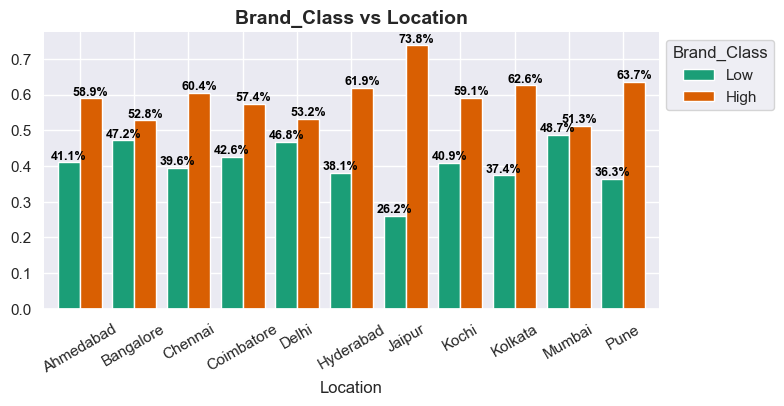


Chi-square test of independence: Location and Brand_Class
---------------------------------------------------------

Test Hypothesis
----------------
H0: THE VARIABLES ARE INDEPENDENT(There is no association between Location and Brand_Class);
H1: THE VARIABLES ARE DEPENDENT(There is an association between Location and Brand_Class);

Actual values: 
---------------
Brand_Class  High  Low
Location              
Ahmedabad      92  132
Bangalore     169  189
Chennai       195  298
Coimbatore    271  365
Delhi         259  295
Hyderabad     283  459
Jaipur        108  305
Kochi         266  385
Kolkata       200  335
Mumbai        385  405
Pune          226  396

Expected values: 
----------------
[[ 91.34197408 132.65802592]
 [145.98404786 212.01595214]
 [201.03389831 291.96610169]
 [259.34596211 376.65403789]
 [225.90827517 328.09172483]
 [302.57028913 439.42971087]
 [168.41176471 244.58823529]
 [265.46261216 385.53738784]
 [218.16051844 316.83948156]
 [322.14356929 467.85643071]
 [253.6

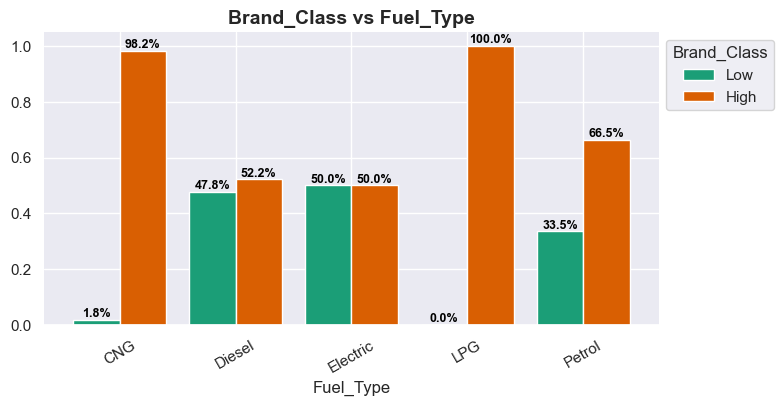


Chi-square test of independence: Fuel_Type and Brand_Class
----------------------------------------------------------

Test Hypothesis
----------------
H0: THE VARIABLES ARE INDEPENDENT(There is no association between Fuel_Type and Brand_Class);
H1: THE VARIABLES ARE DEPENDENT(There is an association between Fuel_Type and Brand_Class);

Actual values: 
---------------
Brand_Class  High   Low
Fuel_Type              
CNG             1    55
Diesel       1531  1673
Electric        1     1
LPG             0    10
Petrol        921  1825

Expected values: 
----------------
[[2.28354935e+01 3.31645065e+01]
 [1.30651645e+03 1.89748355e+03]
 [8.15553340e-01 1.18444666e+00]
 [4.07776670e+00 5.92223330e+00]
 [1.11975474e+03 1.62624526e+03]]

Chi-square is        :166.9097
p_value is           :0.0000
Degree of freedom is :4

Interpritation of test result: 
-------------------------------
********************************************
******************************************** 
Brand_Class   Hig

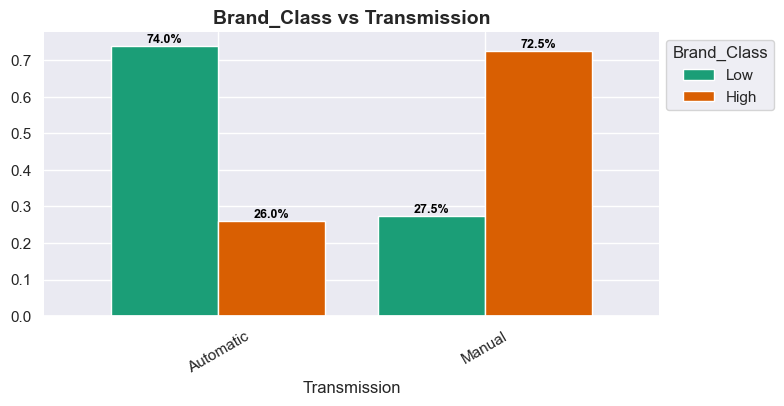


Chi-square test of independence: Transmission and Brand_Class
-------------------------------------------------------------

Test Hypothesis
----------------
H0: THE VARIABLES ARE INDEPENDENT(There is no association between Transmission and Brand_Class);
H1: THE VARIABLES ARE DEPENDENT(There is an association between Transmission and Brand_Class);

Actual values: 
---------------
Brand_Class   High   Low
Transmission            
Automatic     1272   447
Manual        1182  3117

Expected values: 
----------------
[[ 700.96809571 1018.03190429]
 [1753.03190429 2545.96809571]]

Chi-square is        :1097.6423
p_value is           :0.0000
Degree of freedom is :1

Interpritation of test result: 
-------------------------------
There is a statistically significant correlation between Transmission and Brand_Class at 0.05 significant level
Brand_Class  High   Low   All
Seats                        
2.0            15     1    16
4.0            51    48    99
5.0          1999  3056  5055
6.0 

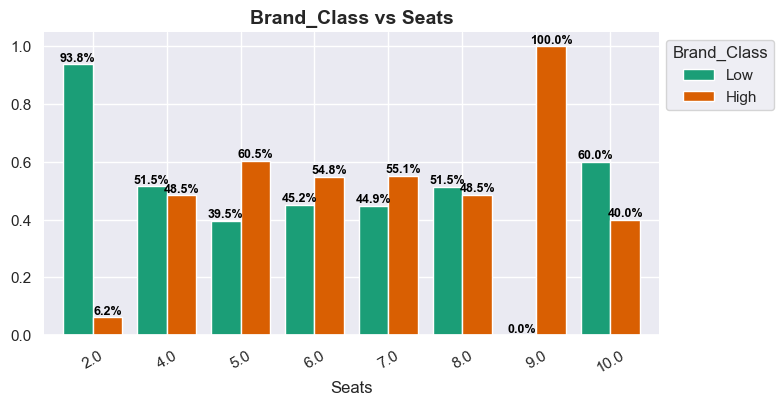


Chi-square test of independence: Seats and Brand_Class
------------------------------------------------------

Test Hypothesis
----------------
H0: THE VARIABLES ARE INDEPENDENT(There is no association between Seats and Brand_Class);
H1: THE VARIABLES ARE DEPENDENT(There is an association between Seats and Brand_Class);

Actual values: 
---------------
Brand_Class  High   Low
Seats                  
2.0            15     1
4.0            51    48
5.0          1999  3056
6.0            14    17
7.0           303   372
8.0            69    65
9.0             0     3
10.0            3     2

Expected values: 
----------------
[[6.52442672e+00 9.47557328e+00]
 [4.03698903e+01 5.86301097e+01]
 [2.06131107e+03 2.99368893e+03]
 [1.26410768e+01 1.83589232e+01]
 [2.75249252e+02 3.99750748e+02]
 [5.46420738e+01 7.93579262e+01]
 [1.22333001e+00 1.77666999e+00]
 [2.03888335e+00 2.96111665e+00]]

Chi-square is        :40.6704
p_value is           :0.0000
Degree of freedom is :7

Interpritation of 

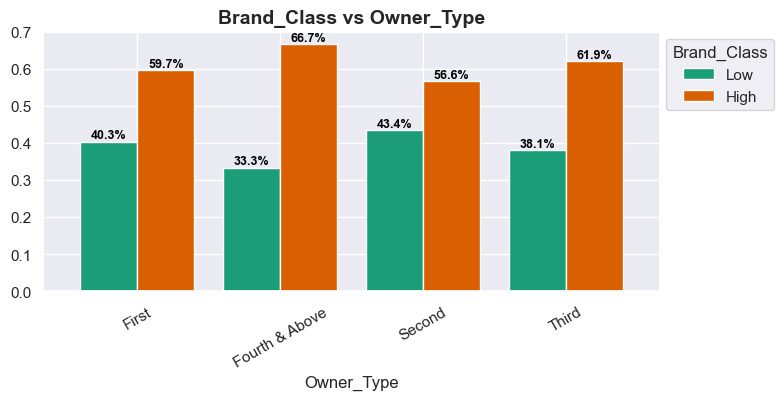


Chi-square test of independence: Owner_Type and Brand_Class
-----------------------------------------------------------

Test Hypothesis
----------------
H0: THE VARIABLES ARE INDEPENDENT(There is no association between Owner_Type and Brand_Class);
H1: THE VARIABLES ARE DEPENDENT(There is an association between Owner_Type and Brand_Class);

Actual values: 
---------------
Brand_Class     High   Low
Owner_Type                
First           1988  2940
Fourth & Above     3     6
Second           420   548
Third             43    70

Expected values: 
----------------
[[2009.52342971 2918.47657029]
 [   3.66999003    5.33000997]
 [ 394.72781655  573.27218345]
 [  46.07876371   66.92123629]]

Chi-square is        :3.6753
p_value is           :0.2987
Degree of freedom is :3

Interpritation of test result: 
-------------------------------
********************************************
******************************************** 
Brand_Class  High   Low   All
Model                        
10

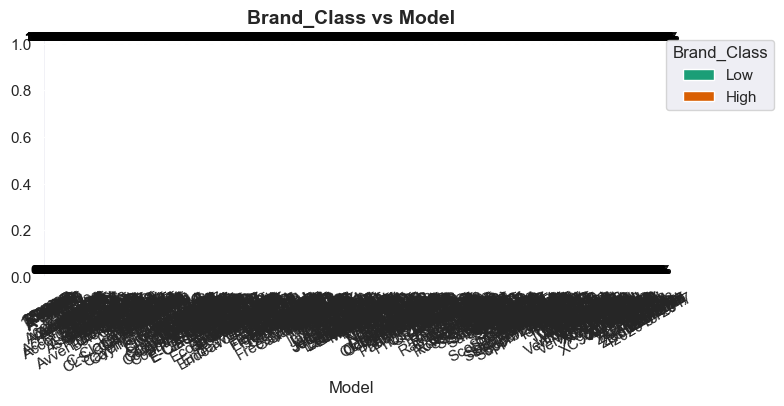


Chi-square test of independence: Model and Brand_Class
------------------------------------------------------

Test Hypothesis
----------------
H0: THE VARIABLES ARE INDEPENDENT(There is no association between Model and Brand_Class);
H1: THE VARIABLES ARE DEPENDENT(There is an association between Model and Brand_Class);

Actual values: 
---------------
Brand_Class  High  Low
Model                 
1000AC          0    1
1Series         3    0
3Series        98    0
5Series        68    0
6Series         7    0
...           ...  ...
i20Era          0    1
i20Magna        0   37
i20Sportz       0   47
redi-GOS        0    1
redi-GOT        0    5

[689 rows x 2 columns]

Expected values: 
----------------
[[ 0.40777667  0.59222333]
 [ 1.22333001  1.77666999]
 [39.96211366 58.03788634]
 ...
 [19.16550349 27.83449651]
 [ 0.40777667  0.59222333]
 [ 2.03888335  2.96111665]]

Chi-square is        :6018.0000
p_value is           :0.0000
Degree of freedom is :688

Interpritation of test resul

In [116]:
catFeatures_ = ['Location', 'Fuel_Type', 'Transmission', 'Seats', 'Owner_Type', 'Model']
# I take above two functions and did below for loop to get all above features to gothrough chi-square test at once
c2 = 'Brand_Class'
for variable in catFeatures_:
    stacked_plot(df[variable], variable, c2)
    chi_square_(variable, c2)

Fuel_Type   CNG  Diesel  Electric  LPG  Petrol   All
Location                                            
Ahmedabad     3     138         0    0      83   224
Bangalore     0     219         0    0     139   358
Chennai       2     288         1    0     202   493
Coimbatore    0     356         0    0     280   636
Delhi        10     306         0    0     238   554
Hyderabad     3     506         0    6     227   742
Jaipur        0     230         0    2     181   413
Kochi         8     304         0    0     339   651
Kolkata       0     256         0    0     279   535
Mumbai       17     313         1    1     458   790
Pune         13     288         0    1     320   622
All          56    3204         2   10    2746  6018
------------------------------------------------------------------------------------------


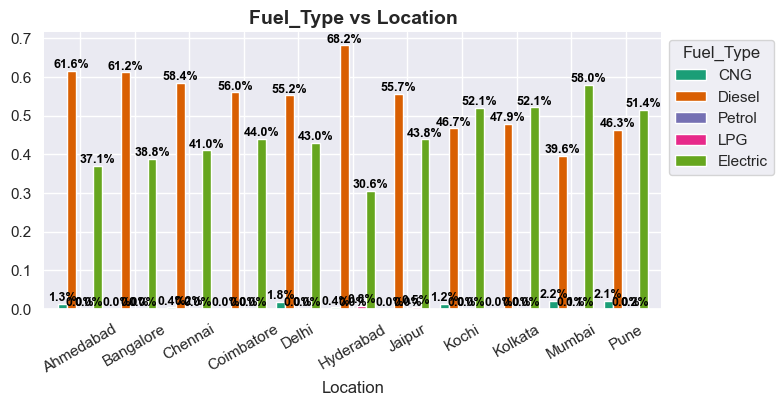


Chi-square test of independence: Location and Fuel_Type
-------------------------------------------------------

Test Hypothesis
----------------
H0: THE VARIABLES ARE INDEPENDENT(There is no association between Location and Fuel_Type);
H1: THE VARIABLES ARE DEPENDENT(There is an association between Location and Fuel_Type);

Actual values: 
---------------
Fuel_Type   CNG  Diesel  Electric  LPG  Petrol
Location                                      
Ahmedabad     3     138         0    0      83
Bangalore     0     219         0    0     139
Chennai       2     288         1    0     202
Coimbatore    0     356         0    0     280
Delhi        10     306         0    0     238
Hyderabad     3     506         0    6     227
Jaipur        0     230         0    2     181
Kochi         8     304         0    0     339
Kolkata       0     256         0    0     279
Mumbai       17     313         1    1     458
Pune         13     288         0    1     320

Expected values: 
----------

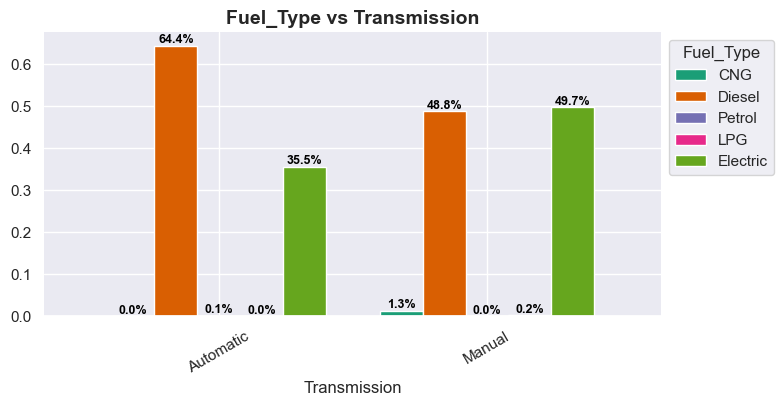


Chi-square test of independence: Transmission and Fuel_Type
-----------------------------------------------------------

Test Hypothesis
----------------
H0: THE VARIABLES ARE INDEPENDENT(There is no association between Transmission and Fuel_Type);
H1: THE VARIABLES ARE DEPENDENT(There is an association between Transmission and Fuel_Type);

Actual values: 
---------------
Fuel_Type     CNG  Diesel  Electric  LPG  Petrol
Transmission                                    
Automatic       0    1107         2    0     610
Manual         56    2097         0   10    2136

Expected values: 
----------------
[[1.59960120e+01 9.15200399e+02 5.71286142e-01 2.85643071e+00
  7.84375872e+02]
 [4.00039880e+01 2.28879960e+03 1.42871386e+00 7.14356929e+00
  1.96162413e+03]]

Chi-square is        :141.9275
p_value is           :0.0000
Degree of freedom is :4

Interpritation of test result: 
-------------------------------
********************************************
************************************

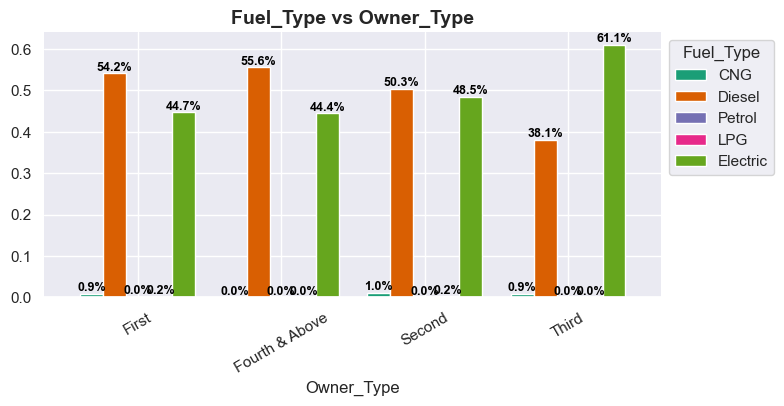


Chi-square test of independence: Owner_Type and Fuel_Type
---------------------------------------------------------

Test Hypothesis
----------------
H0: THE VARIABLES ARE INDEPENDENT(There is no association between Owner_Type and Fuel_Type);
H1: THE VARIABLES ARE DEPENDENT(There is an association between Owner_Type and Fuel_Type);

Actual values: 
---------------
Fuel_Type       CNG  Diesel  Electric  LPG  Petrol
Owner_Type                                        
First            45    2669         2    8    2204
Fourth & Above    0       5         0    0       4
Second           10     487         0    2     469
Third             1      43         0    0      69

Expected values: 
----------------
[[4.58570954e+01 2.62368096e+03 1.63775341e+00 8.18876703e+00
  2.24863543e+03]
 [8.37487537e-02 4.79162512e+00 2.99102692e-03 1.49551346e-02
  4.10667996e+00]
 [9.00764374e+00 5.15365902e+02 3.21701562e-01 1.60850781e+00
  4.41696245e+02]
 [1.05151213e+00 6.01615155e+01 3.75540047e-02 1.8

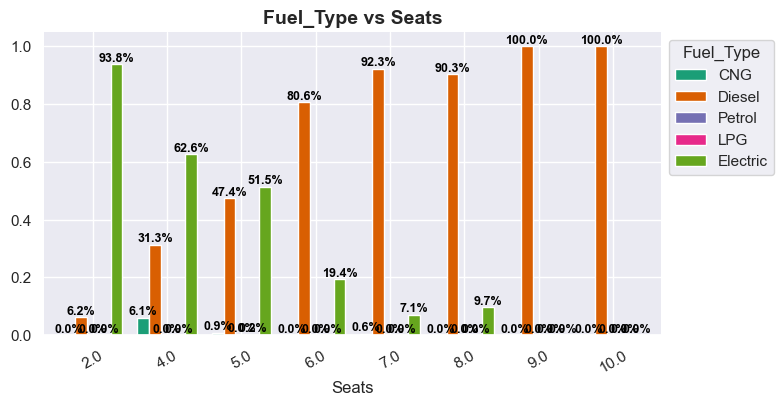


Chi-square test of independence: Seats and Fuel_Type
----------------------------------------------------

Test Hypothesis
----------------
H0: THE VARIABLES ARE INDEPENDENT(There is no association between Seats and Fuel_Type);
H1: THE VARIABLES ARE DEPENDENT(There is an association between Seats and Fuel_Type);

Actual values: 
---------------
Fuel_Type  CNG  Diesel  Electric  LPG  Petrol
Seats                                        
2.0          0       1         0    0      15
4.0          6      31         0    0      62
5.0         46    2395         2   10    2602
6.0          0      25         0    0       6
7.0          4     623         0    0      48
8.0          0     121         0    0      13
9.0          0       3         0    0       0
10.0         0       5         0    0       0

Expected values: 
----------------
[[1.48886673e-01 8.51844467e+00 5.31738119e-03 2.65869059e-02
  7.30076437e+00]
 [9.21236291e-01 5.27078764e+01 3.29012961e-02 1.64506481e-01
  4.51734796e+

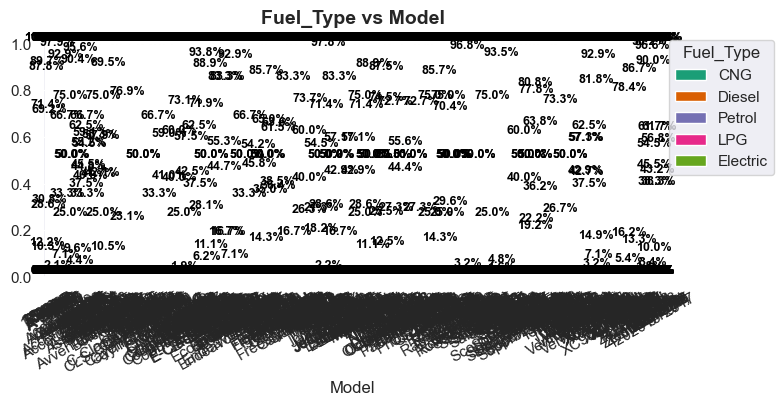


Chi-square test of independence: Model and Fuel_Type
----------------------------------------------------

Test Hypothesis
----------------
H0: THE VARIABLES ARE INDEPENDENT(There is no association between Model and Fuel_Type);
H1: THE VARIABLES ARE DEPENDENT(There is an association between Model and Fuel_Type);

Actual values: 
---------------
Fuel_Type  CNG  Diesel  Electric  LPG  Petrol
Model                                        
1000AC       0       0         0    0       1
1Series      0       3         0    0       0
3Series      0      86         0    0      12
5Series      0      61         0    0       7
6Series      0       5         0    0       2
...        ...     ...       ...  ...     ...
i20Era       0       1         0    0       0
i20Magna     0      16         0    0      21
i20Sportz    0      18         0    0      29
redi-GOS     0       0         0    0       1
redi-GOT     0       0         0    0       5

[689 rows x 5 columns]

Expected values: 
-----------

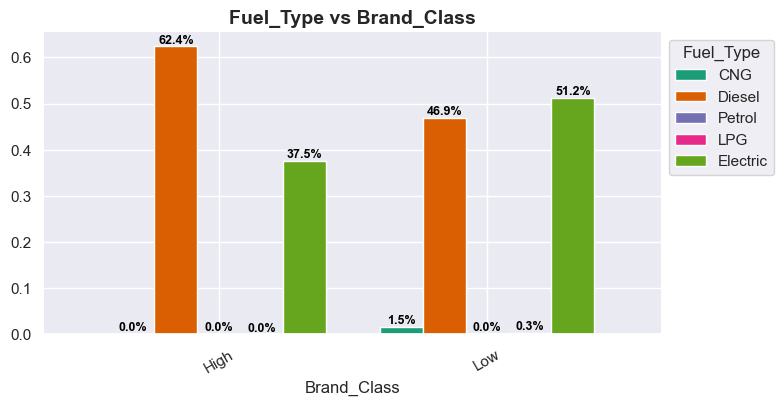


Chi-square test of independence: Brand_Class and Fuel_Type
----------------------------------------------------------

Test Hypothesis
----------------
H0: THE VARIABLES ARE INDEPENDENT(There is no association between Brand_Class and Fuel_Type);
H1: THE VARIABLES ARE DEPENDENT(There is an association between Brand_Class and Fuel_Type);

Actual values: 
---------------
Fuel_Type    CNG  Diesel  Electric  LPG  Petrol
Brand_Class                                    
High           1    1531         1    0     921
Low           55    1673         1   10    1825

Expected values: 
----------------
[[2.28354935e+01 1.30651645e+03 8.15553340e-01 4.07776670e+00
  1.11975474e+03]
 [3.31645065e+01 1.89748355e+03 1.18444666e+00 5.92223330e+00
  1.62624526e+03]]

Chi-square is        :166.9097
p_value is           :0.0000
Degree of freedom is :4

Interpritation of test result: 
-------------------------------
********************************************
********************************************

In [117]:
catFeatures_ = ['Location', 'Transmission', 'Owner_Type', 'Seats', 'Model', 'Brand_Class']
# I take above two functions and did below for loop to get all above features to gothrough chi-square test at once
c2 = 'Fuel_Type'
for variable in catFeatures_:
    stacked_plot(df[variable], variable, c2)
    chi_square_(variable,c2)

### T-Test

Assumptions
1. Are the two samples independent( here means mutually exclusivce)? (Assumed this is met)
2. Are the data from each of the 2 groups following a normal distribution? (CLT, ensures normality is not a major concern.)
3. Do the two samples have the same variances (Homogeneity of Variance)?(to be checked)\
Besides them we are not allowd to have significant outliers

**A general rule of thumb for equal variances is to compare the smallest and largest sample standard deviations. \
This is much like the rule of thumb for equal variances for the test for independent means. \
If the ratio of these two sample standard deviations falls within 0.5 to 2, then it may be that the assumption is not violated**

T-Test Hypothesis.

- H0: µyes = µno (the means of both populations are equal)
- H1: µyes ≠ µno (the means of both populations are not equal)

In [118]:
df.describe(include='category')

Name Location Fuel_Type Transmission Owner_Type  \
count                     6018     6018      6018         6018       6018   
unique                    1876       11         5            2          4   
top     Mahindra XUV500 W8 2WD   Mumbai    Diesel       Manual      First   
freq                        49      790      3204         4299       4928   

         Seats   Brand   Model Brand_Class  
count   6018.0    6018    6018        6018  
unique     8.0      30     689           2  
top        5.0  Maruti  WagonR         Low  
freq    5055.0    1211     154        3564

### Price vs Brand_Class

#### Summarization

In [119]:
df.groupby(['Brand_Class'], observed=True).agg({'Price': 'mean'})  # Or 'Credit Score': np.mean

Price
Brand_Class           
High         15.470151
Low           5.338993

In [120]:
df.groupby(['Brand_Class'], observed=True).agg({'Price':'describe'})

Price                                                      
              count       mean        std   min   25%   50%    75%    max
Brand_Class                                                              
High         2454.0  15.470151  14.958506  0.90  4.95  9.91  21.50  160.0
Low          3564.0   5.338993   3.825493  0.44  2.90  4.50   6.75   56.8

#### Visulization

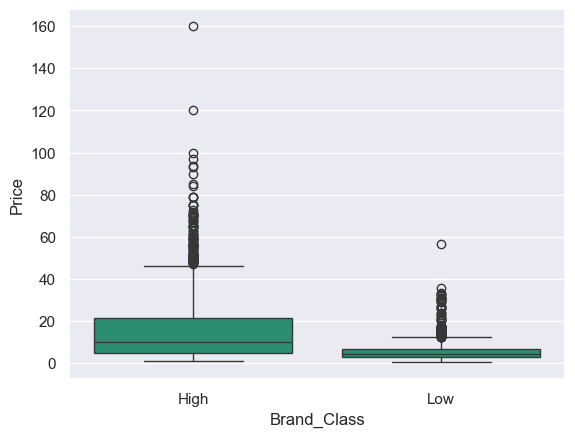

In [121]:
ax = sns.boxplot(x='Brand_Class', y='Price', data=df)
plt.show()

We can notice some major outliers. Hence, data deviates from our assumptions

#### Check Homogeneity of Variance

In [122]:
H = df[(df['Brand_Class']=='High')]
L = df[(df['Brand_Class']=='Low')]
H.shape, L.shape

((2454, 16), (3564, 16))

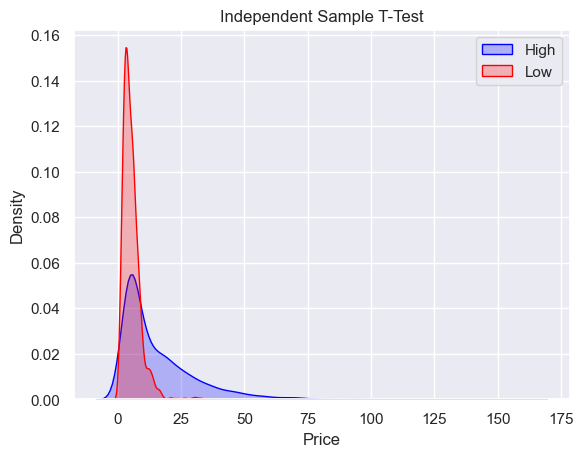

In [123]:
# import seaborn as sns
# import matplotlib.pyplot as plt

sns.kdeplot(H['Price'], fill=True, color='blue', label='High')
sns.kdeplot(L['Price'], fill=True, color='red', label='Low')

plt.title("Independent Sample T-Test")
plt.legend() 
plt.show()

In [124]:
H=H.drop(H[H['Price'].isnull()].index)
L=L.drop(L[L['Price'].isnull()].index)
p=H['Price']
q=L['Price']
p.shape, q.shape

((2454,), (3564,))

#### Levene Test to check equality of variances across groups.

In [125]:
from scipy import stats
stats.levene(p, q) # p is income of customers who bought a P/L and b is who didn't

LeveneResult(statistic=1322.3669068517013, pvalue=6.59095134297297e-262)

- Statistic = 1322.37 -> This is the test statistic, and a high value generally indicates a large difference in group variances.
- p-value = 6.59e-262 -> This is an extremely small p-value, which is way below the usual significance thresholds (e.g., 0.05 or 0.01)
- Since the p-value is nearly zero, it means there is strong evidence to reject the null hypothesis, which states that the variances of the groups are equal. \
  In other words: The groups do not have equal variance (There is significant heterogeneity in variance between the groups)
- Hence I cannot perfor T-test, the Welch’s t-test (Satterthwaite approximation) is the correct choice for comparing group means.

#### Welch’s t-test
- H0: µyes = µno (the means of both populations are equal)
- H1: µyes ≠ µno (the means of both populations are not equal)

In [126]:
tStat, pValue = stats.ttest_ind(p, q, equal_var = False) #equal_var = False runs independent sample T-Test for unequal variance(Welch’s t-test)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))#print the P-Value and the T-Statistic

P-Value:7.923177007910741e-199 T-Statistic:32.82033771362872


- T-Statistic = 32.82 -> A very large t-statistic indicates a strong difference between the means of the two groups.
- P-Value = 7.92e-199 -> This is an extremely small p-value (essentially zero), meaning the probability of observing \
  this result under the null hypothesis (which assumes no difference) is virtually nonexistent
- The null hypothesis is strongly rejected, meaning the two groups have significantly different means.
- The difference is highly unlikely to be due to chance—there is a real and statistically meaningful distinction.
- Because Welch’s t-test accounts for unequal variances, this result is robust, even if the groups had different spreads.
- This suggests a strong practical effect between the groups

### Log Transformation of dataframe

In [127]:
df_original = df.copy()

In [128]:
def Perform_log_transform(df,colLog):
    for colname in colLog:
        df[colname + '_log'] = np.log(df[colname])
    df.info()

In [129]:
Perform_log_transform(df,['Kilometers_Driven','Price'])

<class 'pandas.core.frame.DataFrame'>
Index: 6018 entries, 0 to 6018
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Name                   6018 non-null   category
 1   Location               6018 non-null   category
 2   Year                   6018 non-null   float64 
 3   Kilometers_Driven      6018 non-null   float64 
 4   Fuel_Type              6018 non-null   category
 5   Transmission           6018 non-null   category
 6   Owner_Type             6018 non-null   category
 7   Mileage                6018 non-null   float64 
 8   Engine                 6018 non-null   float64 
 9   Power                  6018 non-null   float64 
 10  Seats                  6018 non-null   category
 11  Price                  6018 non-null   float64 
 12  Ageofcar               6018 non-null   float64 
 13  Brand                  6018 non-null   category
 14  Model                  6018 non-null   catego

### Drop irrelevant features

In [130]:
df.drop(['Name','Model','Year','Brand'],axis=1,inplace=True)

## Assign Input (X) and Output (y) variable¶

In [131]:
X = df.drop(["Price", "Price_log"], axis=1)
y = df[["Price_log", "Price"]] #  Log-Transformed & Raw Price Together

In [132]:
df.describe(include='category')

Location Fuel_Type Transmission Owner_Type   Seats Brand_Class
count      6018      6018         6018       6018  6018.0        6018
unique       11         5            2          4     8.0           2
top      Mumbai    Diesel       Manual      First     5.0         Low
freq        790      3204         4299       4928  5055.0        3564

### Encoding categorical Features

In [133]:
def encode_cat_vars(X):
    X = pd.get_dummies(X, columns=X.select_dtypes(include=['category']).columns.tolist(),drop_first=True)
    return X

In [134]:
X = encode_cat_vars(X)
X.head(3)

Kilometers_Driven  Mileage  Engine   Power  Ageofcar  \
0            72000.0    26.60   998.0   58.16      15.0   
1            41000.0    19.67  1582.0  126.20      10.0   
2            46000.0    18.20  1199.0   88.70      14.0   

   Kilometers_Driven_log  Location_Bangalore  Location_Chennai  \
0              11.184421               False             False   
1              10.621327               False             False   
2              10.736397               False              True   

   Location_Coimbatore  Location_Delhi  ...  Owner_Type_Second  \
0                False           False  ...              False   
1                False           False  ...              False   
2                False           False  ...              False   

   Owner_Type_Third  Seats_4.0  Seats_5.0  Seats_6.0  Seats_7.0  Seats_8.0  \
0             False      False       True      False      False      False   
1             False      False       True      False      False      False   
2             False      False       True      False      False      False   

   Seats_9.0  Seats_10.0  Brand_Class_Low  
0      False       False             True  
1      False       False             True  
2      False       False            False  

[3 rows x 32 columns]

### Compute VIF amd drop features VIF > 10

In [135]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

def calculate_vif(df, threshold=10, priority_features=None):
    """
    Calculate and iteratively remove features with high VIF.
    Certain features in `priority_features` are preserved even if they have high VIF.
    Only numeric columns are evaluated. The original DataFrame is not modified.
    """
    df = df.copy()
    non_numeric = df.select_dtypes(exclude=['number'])  # To preserve if needed
    num_df = df.select_dtypes(include=['number'])

    if priority_features is None:
        priority_features = []

    while True:
        vif_data = pd.DataFrame()
        vif_data['Features'] = num_df.columns
        try:
            vif_data['VIF'] = [variance_inflation_factor(num_df.values, i) 
                               for i in range(num_df.shape[1])]
        except np.linalg.LinAlgError:
            print("Matrix inversion failed — check for perfectly collinear columns.")
            break

        # Identify max VIF feature
        max_vif = vif_data['VIF'].max()
        drop_feature = vif_data.loc[vif_data['VIF'].idxmax(), 'Features']

        # If the feature is in the priority list, skip dropping it
        if max_vif > threshold and drop_feature not in priority_features:
            print(f"Dropping '{drop_feature}' due to high VIF = {max_vif:.2f}")
            num_df = num_df.drop(columns=[drop_feature])
        elif max_vif > threshold and drop_feature in priority_features:
            print(f"'{drop_feature}' has high VIF but is protected. Searching for an alternative feature to drop...")
            # Find the next highest VIF that isn't protected
            alternative_drop = vif_data[~vif_data['Features'].isin(priority_features)].sort_values('VIF', ascending=False).iloc[0]['Features']
            print(f"Dropping '{alternative_drop}' instead.")
            num_df = num_df.drop(columns=[alternative_drop])
        else:
            break

    print("\nFinal VIF Results:")
    print(vif_data[vif_data['Features'].isin(num_df.columns)])

    # Optionally return numeric + non-numeric parts
    return pd.concat([num_df, non_numeric], axis=1)

In [136]:
priority_list = ["Kilometers_Driven_log", "Engine"]
X_vif = calculate_vif(X, threshold=10, priority_features=priority_list)

'Kilometers_Driven_log' has high VIF but is protected. Searching for an alternative feature to drop...
Dropping 'Mileage' instead.
'Engine' has high VIF but is protected. Searching for an alternative feature to drop...
Dropping 'Power' instead.
'Kilometers_Driven_log' has high VIF but is protected. Searching for an alternative feature to drop...
Dropping 'Ageofcar' instead.
'Kilometers_Driven_log' has high VIF but is protected. Searching for an alternative feature to drop...
Dropping 'Kilometers_Driven' instead.

Final VIF Results:
                Features     VIF
0                 Engine  8.6769
1  Kilometers_Driven_log  8.6769


In [137]:
X.shape, X_vif.shape

((6018, 32), (6018, 28))

In [138]:
X_vif.head(3)

Engine  Kilometers_Driven_log  Location_Bangalore  Location_Chennai  \
0   998.0              11.184421               False             False   
1  1582.0              10.621327               False             False   
2  1199.0              10.736397               False              True   

   Location_Coimbatore  Location_Delhi  Location_Hyderabad  Location_Jaipur  \
0                False           False               False            False   
1                False           False               False            False   
2                False           False               False            False   

   Location_Kochi  Location_Kolkata  ...  Owner_Type_Second  Owner_Type_Third  \
0           False             False  ...              False             False   
1           False             False  ...              False             False   
2           False             False  ...              False             False   

   Seats_4.0  Seats_5.0  Seats_6.0  Seats_7.0  Seats_8.0  Seats_9.0  \
0      False       True      False      False      False      False   
1      False       True      False      False      False      False   
2      False       True      False      False      False      False   

   Seats_10.0  Brand_Class_Low  
0       False             True  
1       False             True  
2       False            False  

[3 rows x 28 columns]

In [139]:
X_vif = X_vif.astype(float).copy()

In [140]:
X_vif.describe().T

count         mean         std        min  \
Engine                     6018.0  1618.242356  591.485845  72.000000   
Kilometers_Driven_log      6018.0    10.755877    0.707857   5.141664   
Location_Bangalore         6018.0     0.059488    0.236556   0.000000   
Location_Chennai           6018.0     0.081921    0.274267   0.000000   
Location_Coimbatore        6018.0     0.105683    0.307457   0.000000   
Location_Delhi             6018.0     0.092057    0.289131   0.000000   
Location_Hyderabad         6018.0     0.123297    0.328805   0.000000   
Location_Jaipur            6018.0     0.068627    0.252841   0.000000   
Location_Kochi             6018.0     0.108175    0.310628   0.000000   
Location_Kolkata           6018.0     0.088900    0.284623   0.000000   
Location_Mumbai            6018.0     0.131273    0.337727   0.000000   
Location_Pune              6018.0     0.103357    0.304449   0.000000   
Fuel_Type_Diesel           6018.0     0.532403    0.498990   0.000000   
Fuel_Type_Electric         6018.0     0.000332    0.018229   0.000000   
Fuel_Type_LPG              6018.0     0.001662    0.040733   0.000000   
Fuel_Type_Petrol           6018.0     0.456298    0.498128   0.000000   
Transmission_Manual        6018.0     0.714357    0.451758   0.000000   
Owner_Type_Fourth & Above  6018.0     0.001496    0.038646   0.000000   
Owner_Type_Second          6018.0     0.160851    0.367424   0.000000   
Owner_Type_Third           6018.0     0.018777    0.135748   0.000000   
Seats_4.0                  6018.0     0.016451    0.127211   0.000000   
Seats_5.0                  6018.0     0.839980    0.366655   0.000000   
Seats_6.0                  6018.0     0.005151    0.071593   0.000000   
Seats_7.0                  6018.0     0.112164    0.315594   0.000000   
Seats_8.0                  6018.0     0.022267    0.147561   0.000000   
Seats_9.0                  6018.0     0.000499    0.022324   0.000000   
Seats_10.0                 6018.0     0.000831    0.028815   0.000000   
Brand_Class_Low            6018.0     0.592223    0.491462   0.000000   

                                   25%          50%          75%          max  
Engine                     1198.000000  1493.000000  1984.000000  4342.000000  
Kilometers_Driven_log        10.434116    10.878047    11.198215    12.154779  
Location_Bangalore            0.000000     0.000000     0.000000     1.000000  
Location_Chennai              0.000000     0.000000     0.000000     1.000000  
Location_Coimbatore           0.000000     0.000000     0.000000     1.000000  
Location_Delhi                0.000000     0.000000     0.000000     1.000000  
Location_Hyderabad            0.000000     0.000000     0.000000     1.000000  
Location_Jaipur               0.000000     0.000000     0.000000     1.000000  
Location_Kochi                0.000000     0.000000     0.000000     1.000000  
Location_Kolkata              0.000000     0.000000     0.000000     1.000000  
Location_Mumbai               0.000000     0.000000     0.000000     1.000000  
Location_Pune                 0.000000     0.000000     0.000000     1.000000  
Fuel_Type_Diesel              0.000000     1.000000     1.000000     1.000000  
Fuel_Type_Electric            0.000000     0.000000     0.000000     1.000000  
Fuel_Type_LPG                 0.000000     0.000000     0.000000     1.000000  
Fuel_Type_Petrol              0.000000     0.000000     1.000000     1.000000  
Transmission_Manual           0.000000     1.000000     1.000000     1.000000  
Owner_Type_Fourth & Above     0.000000     0.000000     0.000000     1.000000  
Owner_Type_Second             0.000000     0.000000     0.000000     1.000000  
Owner_Type_Third              0.000000     0.000000     0.000000     1.000000  
Seats_4.0                     0.000000     0.000000     0.000000     1.000000  
Seats_5.0                     1.000000     1.000000     1.000000     1.000000  
Seats_6.0                     0.000000     0.000000     0.000000     1

### Model Building for Predicting Used Car Prices

# Modeling

### Train Test Split

In [141]:
#Splitting data in train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_vif,y, test_size=0.30, random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4212, 28) (1806, 28) (4212, 2) (1806, 2)


### Scaling Data

In [142]:
y_train_log = y_train["Price_log"]
y_train_raw = y_train['Price']
y_test_log = y_test["Price_log"]
y_test_raw = y_test["Price"]  # for final inverse-transform interpretation

# Scaling
scaler = StandardScaler()
# Fit and tranform on training data
X_train_scaled = scaler.fit_transform(X_train)
# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

In [143]:
print(f"X_train_scaled shape: {X_train_scaled.shape}\nX_test_scaled shape:{X_test_scaled.shape}")

X_train_scaled shape: (4212, 28)
X_test_scaled shape:(1806, 28)


#### Objective: Enhancing Price Prediction Accuracy
#### Key Considerations in Regression Modeling

##### A regression model can encounter two primary types of errors:
- Underestimation – Predicting a lower price than the actual value, potentially leading to sellers undervaluing their vehicles.
- Overestimation – Predicting a higher price than the actual value, which may discourage buyers due to unrealistic pricing.

##### Which Error Matters More?
The significance of errors depends on the our focus/objective:
- If the goal is maximizing seller profitability, avoiding underestimation is crucial to prevent losses.
- If the focus is on competitive pricing for buyers, minimizing overestimation ensures affordability.

A balanced approach prioritizes reducing overall error while maintaining predictive stability.

##### Optimizing Model Performance
To enhance price prediction accuarcy I need to:
- Minimize RMSE (Root Mean Squared Error) – ``RMSE quantifies how much predictions deviate from actual prices``, making it a strong indicator of model effectiveness.
- Consider R2 Score – ``Helps understand how well the model explains price variations based on features like mileage, age, and condition``.
- Feature Engineering – ``Including relevant attributes (brand reputation, demand trends, seasonality) would technically improves predictions``.
- Avoid Overfitting – ``Regularization techniques (such as Ridge or Lasso regression) help prevent models from over-relying`` on specific patterns in historical data.

By optimizing for RMSE and robust feature selection, the model ensures accurate price predictions, benefiting both sellers and buyers in the used car market.


### Instantiate LazyRegressor

In [144]:
import time 
from sklearn.svm import SVR
from lazypredict.Supervised import LazyRegressor

In [145]:
start = time.time() 
# Instantiate LazyRegressor
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
# Fit the regression models
models, predictions = reg.fit(X_train_scaled, X_test_scaled, y_train, y_test)
end = time.time()
print(f"\nExecution time: {end-start} seconds")
models

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:25<00:00,  1.66it/s]


Execution time: 25.308813095092773 seconds


Adjusted R-Squared  \
Model                                                   
XGBRegressor                                     0.81   
RandomForestRegressor                            0.80   
ExtraTreesRegressor                              0.79   
BaggingRegressor                                 0.78   
MLPRegressor                                     0.76   
KNeighborsRegressor                              0.71   
RidgeCV                                          0.68   
Ridge                                            0.68   
LinearRegression                                 0.68   
TransformedTargetRegressor                       0.68   
Lars                                             0.66   
ExtraTreeRegressor                               0.64   
DecisionTreeRegressor                            0.64   
OrthogonalMatchingPursuit                        0.53   
ElasticNet                                       0.31   
LassoLars                                        0.26   
Lasso                                            0.26   
DummyRegressor                                  -0.02   
KernelRidge                                     -1.80   
GaussianProcessRegressor                   -295507.21   
RANSACRegressor            -7952329713277635395584.00   

                                            R-Squared            RMSE  \
Model                                                                   
XGBRegressor                                     0.81            3.87   
RandomForestRegressor                            0.80            3.82   
ExtraTreesRegressor                              0.79            3.86   
BaggingRegressor                                 0.78            4.00   
MLPRegressor                                     0.76            4.07   
KNeighborsRegressor                              0.71            4.58   
RidgeCV                                          0.69            5.06   
Ridge                                            0.69            5.08   
LinearRegression                                 0.69            5.08   
TransformedTargetRegressor                       0.69            5.08   
Lars                                             0.66            5.35   
ExtraTreeRegressor                               0.65            5.01   
DecisionTreeRegressor                            0.64            5.20   
OrthogonalMatchingPursuit                        0.54            5.73   
ElasticNet                                       0.32            5.63   
LassoLars                                        0.27            5.51   
Lasso                                            0.27            5.51   
DummyRegressor                                  -0.00            8.17   
KernelRidge                                     -1.76            8.42   
GaussianProcessRegressor                   -290923.15         5258.69   
RANSACRegressor            -7828969473958092996608.00 236181381662.18   

                            Time Taken  
Model                                   
XGBRegressor                      0.85  
RandomForestRegressor             3.50  
ExtraTreesRegressor               3.09  
BaggingRegressor                  0.41  
MLPRegressor                      9.36  
KNeighborsRegressor               0.21  
RidgeCV                           0.17  
Ridge                             0.08  
LinearRegression                  0.12  
TransformedTargetRegressor        0.09  
Lars                              0.07  
ExtraTreeRegressor                0.06  
DecisionTreeRegressor             0.09  
OrthogonalMatchingPursuit         0.14  
ElasticNet                        0.07  
LassoLars                         0.05  
Lasso                             0.10  
DummyRegressor                    0.04  
KernelRidge                       1.30  
GaussianProcessRegressor          4.52  
RANSACRegressor                   0.41

In [146]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, KFold

### Train and Evaluate Models (Using Log Price)

In [147]:
models_dict = {
    "LinearRegression": LinearRegression(n_jobs=-1),
    "KNN": KNeighborsRegressor(n_jobs=-1),
    "SVR": SVR(),
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "RandomForest": RandomForestRegressor(random_state=42, n_jobs=-1),
    "AdaBoost": AdaBoostRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, objective='reg:squarederror', n_jobs=-1)
}

In [148]:
param_grids = {
    "LinearRegression": {},
    "KNN": {"n_neighbors": [3, 5, 7]},
    "SVR": {"C": [0.1, 1, 10], "epsilon": [0.1, 0.2]},
    "DecisionTree": {"max_depth": [4, 6, 8], "min_samples_split": [5, 10]},
    "RandomForest": {"n_estimators": [50, 100], "max_depth": [6, 8], "min_samples_leaf": [2, 4]},
    "AdaBoost": {"n_estimators": [50, 100], "learning_rate": [0.05, 0.1]},
    "XGBoost": {"n_estimators": [50, 100], "learning_rate": [0.05, 0.1], "max_depth": [3, 4]}
}

### Hyperparameter Tuning

In [149]:
best_models = {}
cv = KFold(n_splits=5, shuffle=True, random_state=42)

start = time.time() 

for name, model in models_dict.items():
    print(f"Tuning {name}...")
    grid = GridSearchCV(model, param_grids[name], scoring='neg_mean_squared_error', cv=cv, n_jobs=-1, verbose=1)
    grid.fit(X_train_scaled, y_train_log)
    best_models[name] = grid.best_estimator_
    print(f"Best Params for {name}: {grid.best_params_}")

end = time.time()

print(f"\nExecution time: {end-start} seconds")

Tuning LinearRegression...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Params for LinearRegression: {}
Tuning KNN...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best Params for KNN: {'n_neighbors': 7}
Tuning SVR...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Params for SVR: {'C': 1, 'epsilon': 0.2}
Tuning DecisionTree...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Params for DecisionTree: {'max_depth': 8, 'min_samples_split': 10}
Tuning RandomForest...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Params for RandomForest: {'max_depth': 8, 'min_samples_leaf': 2, 'n_estimators': 100}
Tuning AdaBoost...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Params for AdaBoost: {'learning_rate': 0.1, 'n_estimators': 100}
Tuning XGBoost...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Params for XGBoost: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}

E

### Evaluate Models

In [150]:
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# import numpy as np

results = {}

for name, model in best_models.items():
    # Predictions
    y_train_pred_log = model.predict(X_train_scaled)
    y_test_pred_log = model.predict(X_test_scaled)

    y_train_pred_raw = np.expm1(y_train_pred_log)
    y_test_pred_raw = np.expm1(y_test_pred_log)

    results[name] = {
        'Train RMSE (log)': np.sqrt(mean_squared_error(y_train_log, y_train_pred_log)),
        'Test RMSE (log)': np.sqrt(mean_squared_error(y_test_log, y_test_pred_log)),
        'Train R2 (log)': r2_score(y_train_log, y_train_pred_log),
        'Test R2 (log)': r2_score(y_test_log, y_test_pred_log),
        'Train MAE (raw)': mean_absolute_error(y_train_raw, y_train_pred_raw),
        'Test MAE (raw)': mean_absolute_error(y_test_raw, y_test_pred_raw),
        'Train RMSE (raw)': np.sqrt(mean_squared_error(y_train_raw, y_train_pred_raw)),
        'Test RMSE (raw)': np.sqrt(mean_squared_error(y_test_raw, y_test_pred_raw)),
    }

results_df = pd.DataFrame(results).T.sort_values(by='Test RMSE (raw)')
results_df


Train RMSE (log)  Test RMSE (log)  Train R2 (log)  \
XGBoost                       0.32             0.36            0.87   
RandomForest                  0.33             0.39            0.86   
SVR                           0.36             0.40            0.83   
DecisionTree                  0.35             0.43            0.84   
LinearRegression              0.41             0.43            0.77   
KNN                           0.38             0.45            0.81   
AdaBoost                      0.47             0.49            0.71   

                  Test R2 (log)  Train MAE (raw)  Test MAE (raw)  \
XGBoost                    0.83             2.59            2.94   
RandomForest               0.81             2.60            3.07   
SVR                        0.80             2.78            3.09   
DecisionTree               0.76             2.68            3.34   
LinearRegression           0.76             3.31            3.42   
KNN                        0.74             2.99            3.51   
AdaBoost                   0.69             3.82            3.98   

                  Train RMSE (raw)  Test RMSE (raw)  
XGBoost                       4.71             6.00  
RandomForest                  4.71             6.14  
SVR                           5.34             6.28  
DecisionTree                  4.83             6.66  
LinearRegression              6.13             6.78  
KNN                           6.09             7.26  
AdaBoost                      7.27             7.95

Best Model Based on Test Results
``XGBoost is the best-performing model`` overall because:
- Lowest Test RMSE (log): 0.36 -> Most accurate predictions in the log-transformed space.
- Highest Test R2 (log): 0.83 -> Explains 83% of variance in price.
- Lowest Test RMSE (raw): 6.00 -> Smallest error in real-world price predictions.
- Lowest Test MAE (raw): 2.94 -> Least deviation from actual car prices.
This suggests XGBoost is the best model for price prediction, balancing high accuracy with minimal erro

To determine the best model, we prioritize:
- Lowest RMSE (Root Mean Squared Error) -> Measures prediction accuracy (lower is better).
- Highest R2 Score -> Measures how well the model explains variance in car prices (higher is better).
- Balanced Performance Across Metrics -> Avoiding overfitting (train/test gap)



### OLS Model

### Why use OLS when we already have LinearRegression
OLS is a statistical method to estimate linear regression coefficients by minimizing \
the sum of squared residuals (errors between actual and predicted values). 

We use OLS to:
- Get p-vaules to understand feature significance
- Get R2, F-statistics, and confidence intervals
- Check for multicollinearity and model assumptions

In [151]:
X_train_ols = sm.add_constant(X_train_scaled)
ols_model = sm.OLS(y_train_log, X_train_ols).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     509.6
Date:                Tue, 03 Jun 2025   Prob (F-statistic):               0.00
Time:                        14:37:08   Log-Likelihood:                -2267.4
No. Observations:                4212   AIC:                             4593.
Df Residuals:                    4183   BIC:                             4777.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### OLS metrics

In [152]:
ols_results = {
    'RMSE (log)': np.sqrt(mean_squared_error(y_test_log, y_test_pred_log)),
    'R2 (log)': r2_score(y_test_log, y_test_pred_log),
    'MAE (raw)': mean_absolute_error(y_test_raw, y_test_pred_raw),
    'RMSE (raw)': np.sqrt(mean_squared_error(y_test_raw, y_test_pred_raw))
}

ols_results_df = pd.DataFrame([ols_results], index=["OLS"])
print("\nOLS Model Evaluation:")
print(ols_results_df)



OLS Model Evaluation:
     RMSE (log)  R2 (log)  MAE (raw)  RMSE (raw)
OLS        0.36      0.83       2.94        6.00


### Model Performance
- R-squared = 0.773 -> The model explains 77.3% of the variance in car prices.
- Adjusted R-squared = 0.772 -> Slight adjustment accounting for the number of predictors.
- F-statistic = 509.6, p-value = 0.00 -> The model is statistically significant.
- Prob (F-statistic): 0.00 _> p-value for the overall regression model
  means the model is highly significant, suggesting that at least one \
  feature contributes meaningfully to predicting used car prices
- Observations = 4212 -> This indicates a fairly large dataset.

Key Feature Interpretations
- Engine (0.3665, p-value = 0.000) -> Larger engine sizes increase price.
- Kilometers Driven Log (-0.2501, p-value = 0.000) → More distance driven lowers price.
- Location-Based Price Impact
- Bangalore (0.0462, p-value = 0.000) -> Cars from Bangalore have slightly higher prices.
- Chennai, Delhi → Not statistically significant (high p-values), meaning location doesn't strongly impact price in these cities.
- Fuel Type
- Diesel (0.1021, p-value = 0.000) -> Diesel vehicles sell for higher prices.
- Electric (0.0226, p-value = 0.001) -> Slight positive effect, though lower than diesel.

Interpretation Takeaways
- Mileage (Kilometers Driven Log) has a strong negative effect -> Cars with higher mileage sell for lower prices.
- Fuel type impacts value, with diesel fetching the highest price.
- Engine size is a major price driver, reinforcing the idea that larger engines mean premium pricing.
- Some locations influence price, but not all -> Bangalore shows a price premium.

Next, I may consider
- I may consider feature interactions (e.g., Engine + Age).
- Investigate non-significant predictors (should they be removed?).
- Try SHAP analysis for deeper feature impact.



### Residuals & Inverse Transform

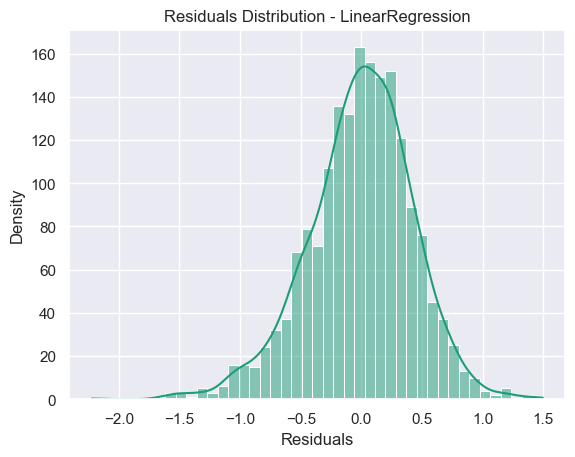

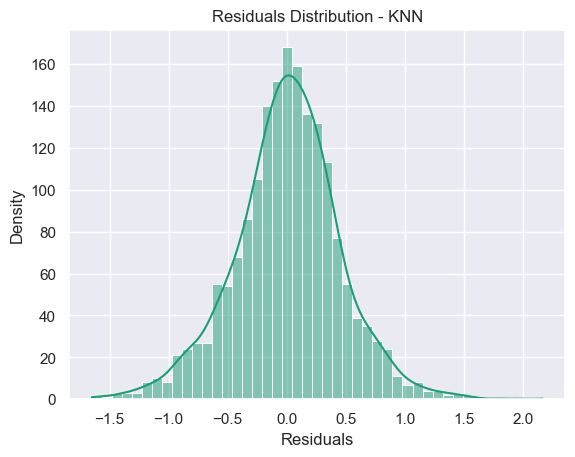

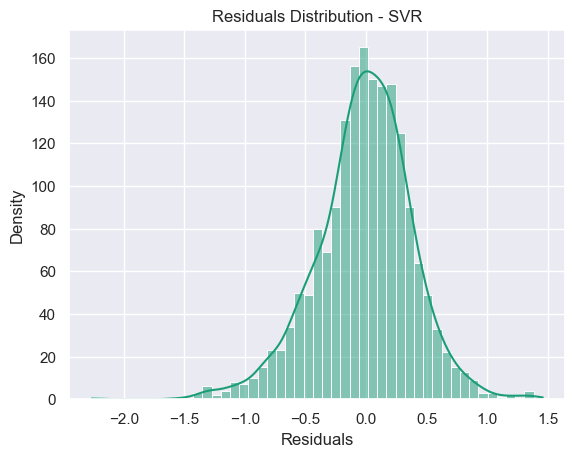

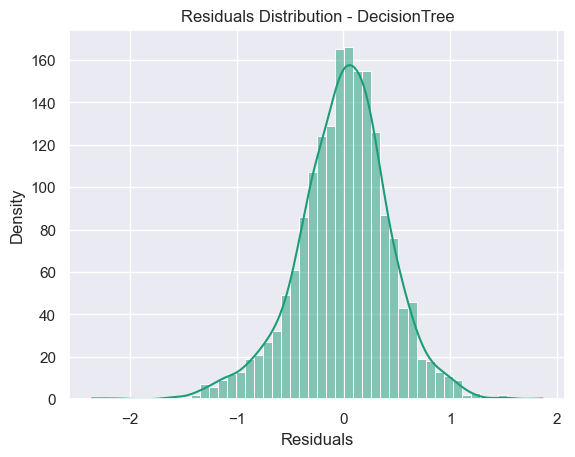

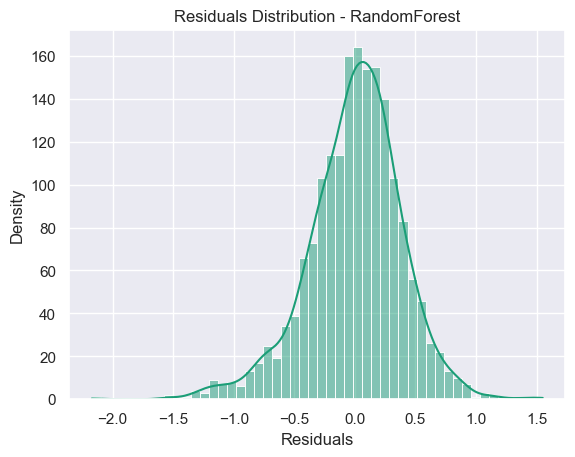

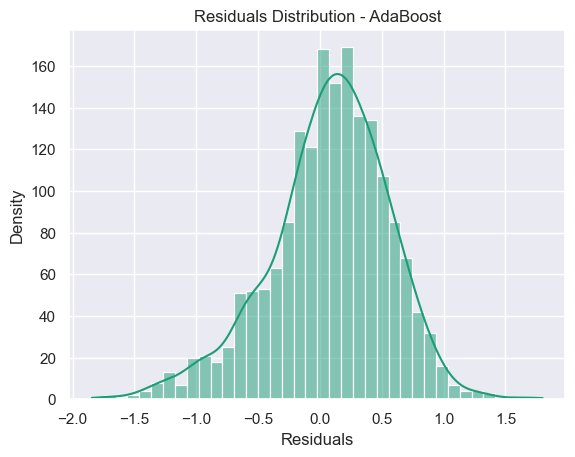

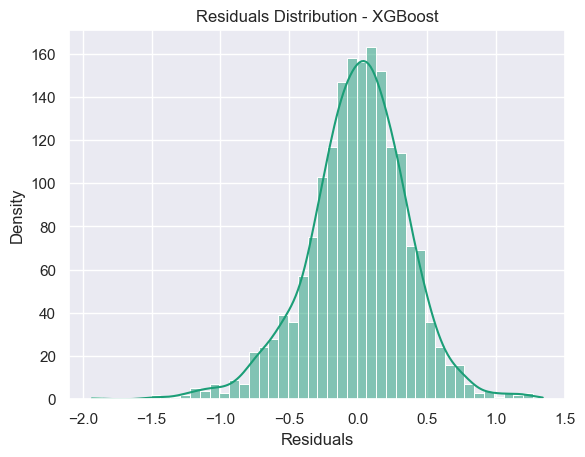

In [153]:
for name, model in best_models.items():
    y_pred_log = model.predict(X_test_scaled)
    residuals = y_test_log - y_pred_log
    sns.histplot(residuals, kde=True)
    plt.title(f"Residuals Distribution - {name}")
    plt.xlabel("Residuals")
    plt.ylabel("Density")
    plt.show()

### As per above plots we can see that the residuals are roughly normal and centered around 0, which is a good sign of a well-behaved regression model.

### SHAP (SHapley Additive exPlanations)

is a powerful method for interpreting machine learning models by explaining feature contributions to predictions. It is based on game theory, where each feature is treated like a "player" contributing to the final prediction\

Why Use SHAP?\
SHAP helps answer key questions:
- Which features most influence predictions?
- How does each feature contribute to increasing or decreasing predicted values?
- Are model decisions fair and transparent?\
SHAP values quantify how much each feature contributes to a prediction compared to the average outcome




RandomForest - SHAP Summary Plot


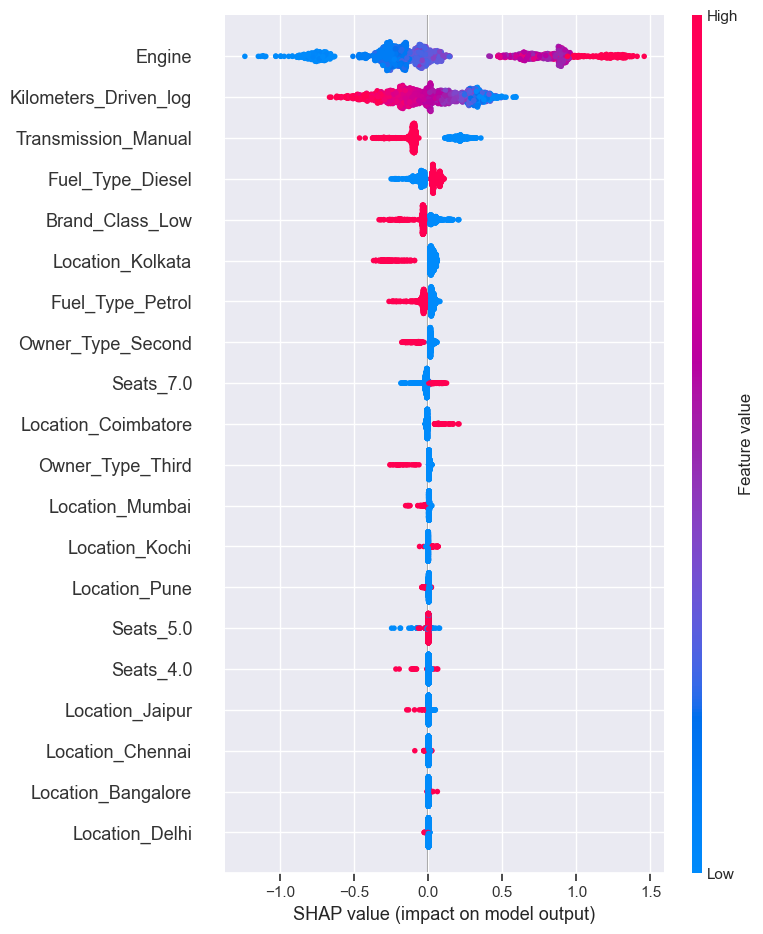


RandomForest - SHAP Bar Plot


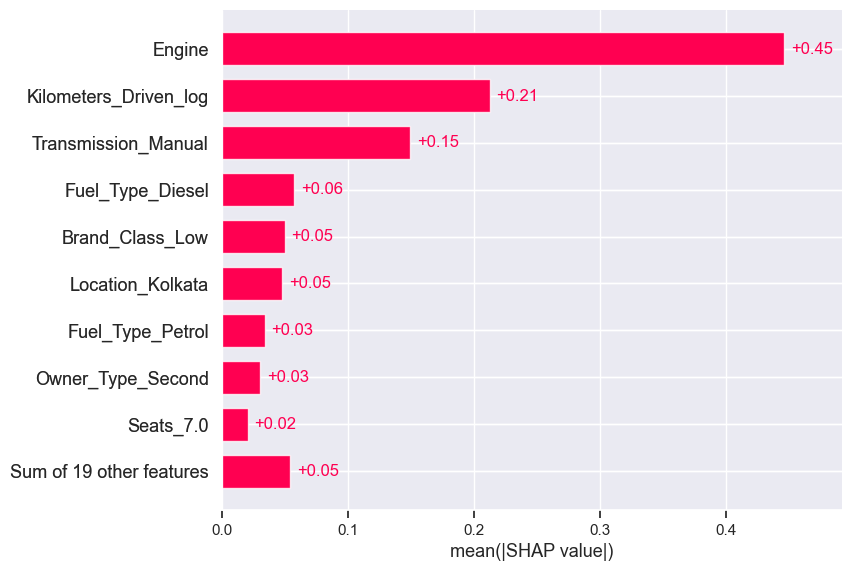


RandomForest - SHAP Dependence Plot (Top Feature)


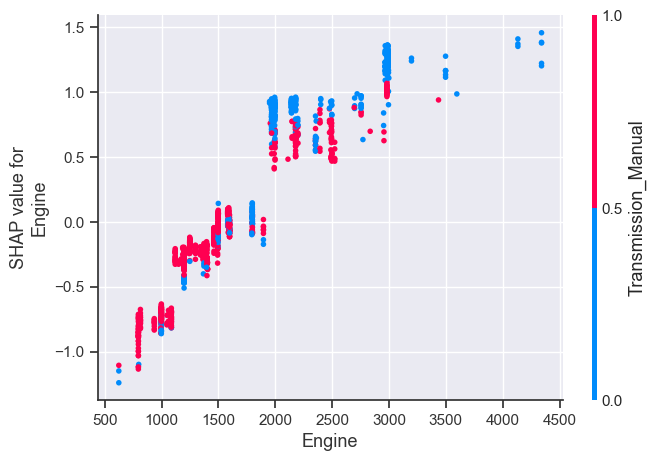


XGBoost - SHAP Summary Plot


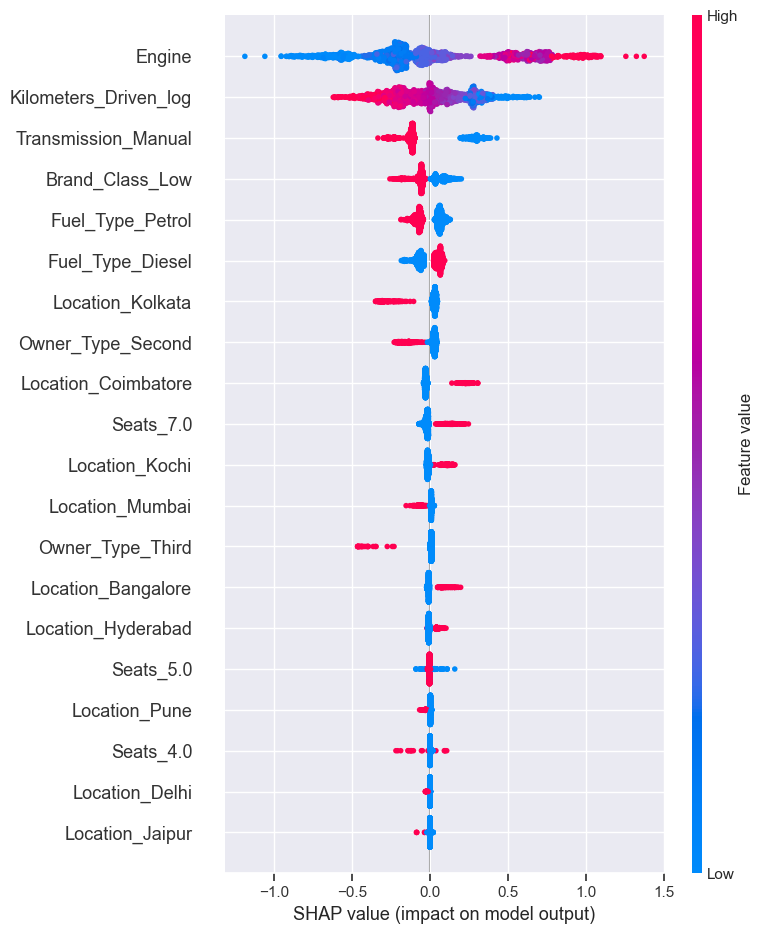


XGBoost - SHAP Bar Plot


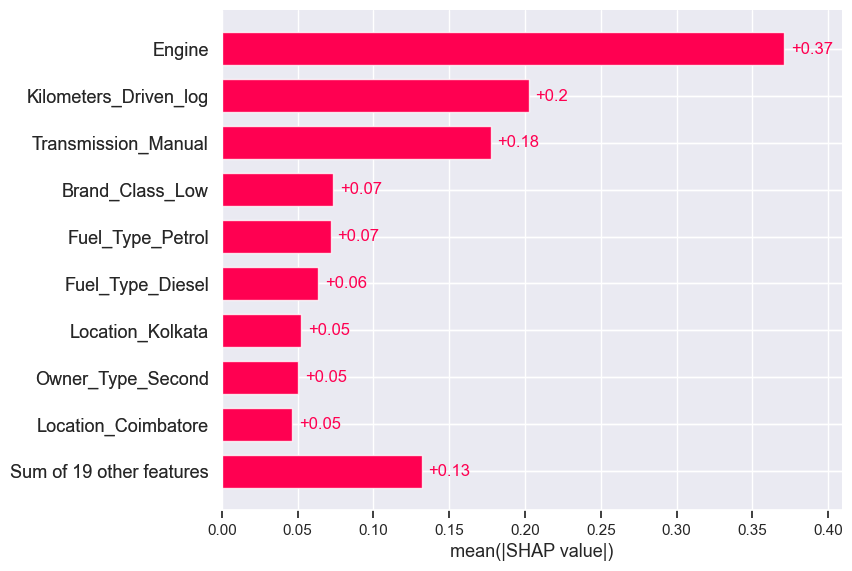


XGBoost - SHAP Dependence Plot (Top Feature)


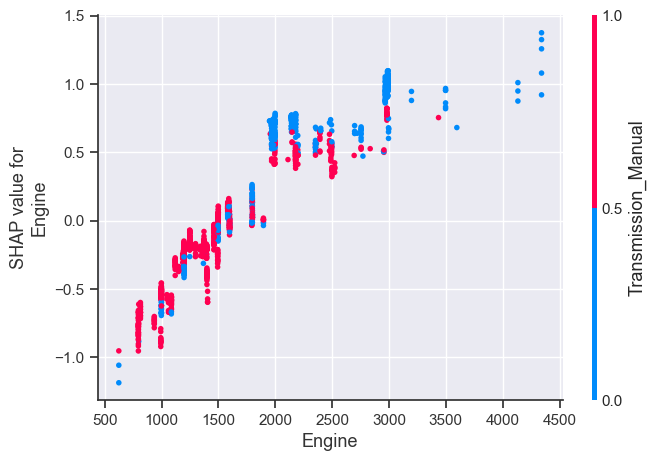


Execution time: 20.603792667388916 seconds


In [154]:
start = time.time() 

for name in ["RandomForest", "XGBoost"]:
    model = best_models[name]
    explainer = shap.Explainer(model)
    shap_values = explainer(X_test_scaled)

    print(f"\n{name} - SHAP Summary Plot")
    shap.summary_plot(shap_values, features=X_test, feature_names=X_test.columns)

    print(f"\n{name} - SHAP Bar Plot")
    shap.plots.bar(shap_values)

    top_feature_index = np.argmax(np.abs(shap_values.values).mean(axis=0))
    print(f"\n{name} - SHAP Dependence Plot (Top Feature)")
    shap.dependence_plot(top_feature_index, shap_values.values, X_test, feature_names=X_test.columns)

end = time.time()
print(f"\nExecution time: {end-start} seconds")

In [155]:
print(X_train_scaled.shape, X_test_scaled.shape)

(4212, 28) (1806, 28)


### Plot Evaluation Metrics

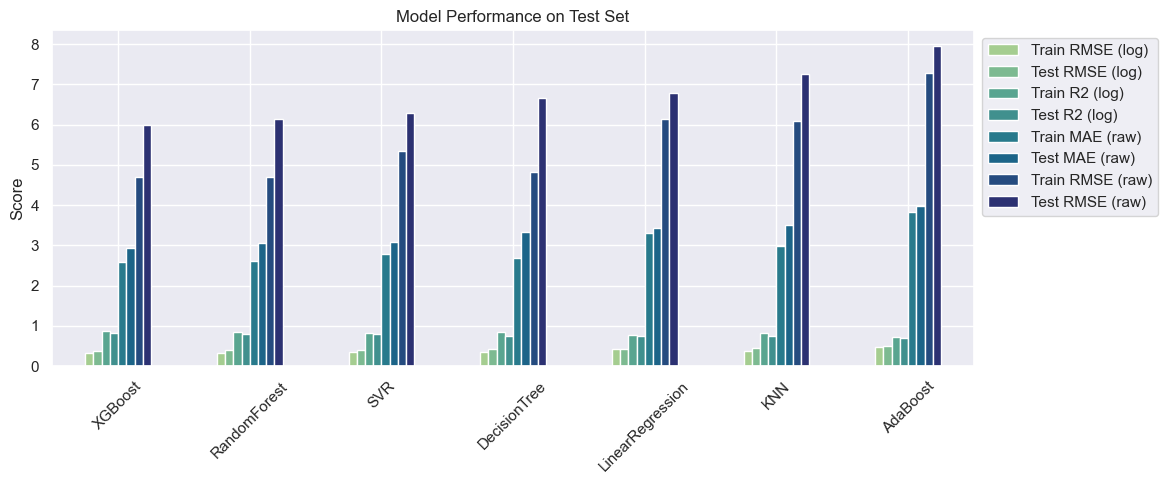

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use Seaborn color palette
sns.set_palette("crest")

ax = results_df.plot(kind='bar', figsize=(10, 5), colormap="crest")  # Apply colormap

plt.title("Model Performance on Test Set")
plt.ylabel("Score")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Adjust legend position to prevent overlap
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

### Save Best Models

In [157]:
import joblib

for name, model in best_models.items():
    joblib.dump(model, f"{name.replace(' ', '_')}_model.pkl")
    print(f"Saved: {name}_model.pkl")


Saved: LinearRegression_model.pkl
Saved: KNN_model.pkl
Saved: SVR_model.pkl
Saved: DecisionTree_model.pkl
Saved: RandomForest_model.pkl
Saved: AdaBoost_model.pkl
Saved: XGBoost_model.pkl


### Conclusion

- Based on Analysis,  I divided cars into 2 segments Low, and High budget.
- Brands like Maruti, Hyundai ,Honda are low budget and very popular brands in used car market.
- Brands  like BMW, Bentley, Jaguar, Land Rover, Mercedes Benz,Porche, Mini Cooper are high budget cars\
  and are mostly bought by car enthusiast who are ready to buy less user owned cars at higher price as well.   
- Mumbai and Hyderbad seems to be more popular in Used car market, need to verify this with more data from other demographic regions.     
- Need to acquire more Automatic cars  to earn more profits, as this car sell at higher prices.    
- May be due to increasing petrol prices, diesel cars have more demand in recent years, acquiring and selling them can high profits  
- However since this dataset contains data from 1996 - 2019, there would have been some key external factors which would have had a direct impact\
  on  car prices which are not available in the dataset. The next leg of this analysis would be incorporating socio-economic factors into the analysis.
  
- As a marketing too, we can package a car maintenance packages where  customers  pays a small upfront fees and can bring the car for\
  servicing anytime in a year to attract more customers.    
- As we aware, there are more soft parameters which also should be considered when buying a car, \
  the wear and tear the car has been through and how much the company will have to work on car to make it ready for sale.
- If the car as already been in some kind of accident that would also effect the price.
- Other good to have feature like AC, Sun roof, Airbags can also have impact on the price.    
- Car model that are too old will depreciate a lot can impact the demand.

### Thank you!

#### 2025-06-03